In [1]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets
using Distributions       
using Plots                   # package for plotting 
using CSV
using LinearAlgebra,Statistics,Random,DelimitedFiles, DataFrames

In [2]:
phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_Exp_Complete_SNP.dat", 
    types=Dict(:ID => String), delim = ' ',header=true, missingstrings=["NA"] )
first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String?
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,false,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02


In [3]:
phenotypes= dropmissing(phenotypes, :NurPenBatch)
phenotypes

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,false,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02


In [4]:
Nur2ADG_model_equations = "Nur2ADG = intercept + Batch + AX161313535 + Died + EntryAge + NurPenBatch + SowID"
Nur2ADG_R=0.115504E-01
Nur2ADG_model=build_model(Nur2ADG_model_equations,Nur2ADG_R);

In [5]:
set_covariate(Nur2ADG_model,"EntryAge")

1-element Array{Symbol,1}:
 :EntryAge

In [6]:
Nur2ADG_G1=0.107150E-02
set_random(Nur2ADG_model,"NurPenBatch",Nur2ADG_G1)

In [7]:
Nur2ADG_G2=0.927471E-03
set_random(Nur2ADG_model,"SowID",Nur2ADG_G2)

In [8]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS_MHC.bin.gen.bin")

 39.844196 seconds (19.27 k allocations: 10.333 GiB, 0.06% gc time)


3205×432662 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  5.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [9]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS_MHC.bin.ids.txt",String))

3205-element Array{String,1}:
 "0001"
 "0002"
 "0004"
 "0005"
 "0006"
 "0007"
 "0009"
 "0010"
 "0011"
 "0012"
 "0013"
 "0014"
 "0015"
 ⋮     
 "3283"
 "3284"
 "3285"
 "3286"
 "3287"
 "3288"
 "3289"
 "3290"
 "3291"
 "3292"
 "3293"
 "3294"

In [10]:
Nur2ADG_G3=0.295395E-02
@time add_genotypes(Nur2ADG_model,M,Nur2ADG_G3,header=false, rowID=rowID)

The marker IDs are set to 1,2,...,#markers
#markers: 432662; #individuals: 3205
 16.116487 seconds (7.96 M allocations: 15.891 GiB, 1.33% gc time)


4.0f0

In [11]:
@time Nur2ADG_outB=runMCMC(Nur2ADG_model,phenotypes,methods="BayesB", missing_phenotypes=true,
    Pi=0.999,estimateScale=true, chain_length=50000,burnin = 5000,output_heritability=true, 
    output_samples_frequency=100, output_samples_file  = "BayesB_SNP")

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
Phenotypes for all traits included in the model for individual 0006 in the row 5 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0049 in the row 47 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0322 in the row 295 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0374 in the row 343 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0398 in the row 364 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 1711 in the row 1638 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 1746 in the row 1673 are missing. This record is deleted.
Phenotypes for all traits included in the model for indi

running MCMC ...100%|███████████████████████████████████| Time: 6:55:15




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


24956.634485 seconds (90.23 G allocations: 2.088 TiB, 1.27% gc time)


Dict{Any,Any} with 8 entries:
  "ScaleEffectVargeno"           => 1×3 DataFrame…
  "EBV_Nur2ADG"                  => 3205×3 DataFrame…
  "heritability"                 => 1×3 DataFrame…
  "location parameters"          => 1610×5 DataFrame…
  "residual variance"            => 1×3 DataFrame…
  "marker effects geno"          => 432662×5 DataFrame…
  "genetic_variance"             => 1×3 DataFrame…
  "marker effects variance geno" => 1×3 DataFrame…

In [12]:
h2=CSV.read("BayesB_SNP_heritability.txt",delim = ' ',header=true)
insertcols!(h2, 1, :iteration => 1:450) # Add a column called iteration

,iteration,Nur2ADG
,Int64,Float64
1,1,0.202896
2,2,0.206197
3,3,0.16373
4,4,0.18749
5,5,0.163507
6,6,0.190843
7,7,0.17417
8,8,0.209114
9,9,0.174121


In [13]:
mean(h2[!,2])

0.17177488687366754

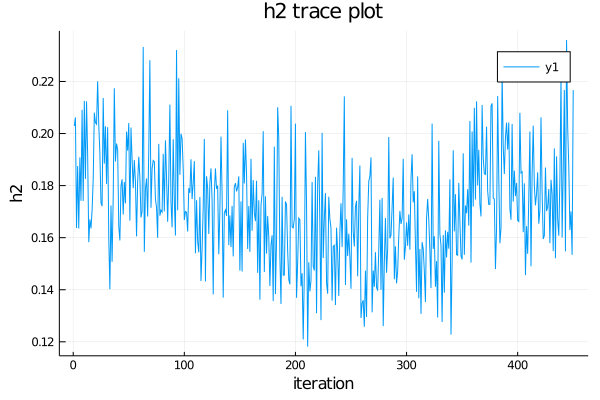

In [14]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [15]:
@time Nur2ADG_outB,Nur2ADG_winVarProps = GWAS("BayesB_SNP_marker_effects_geno_Nur2ADG.txt","/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS_MHC.txt",
    Nur2ADG_model;header=true,window_size="1 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:21:28


BoundsError: BoundsError: attempt to access (2384×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA       │ PPA_t     │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64    │ Float64   │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1    │ 1     │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 6.23573e-5     │ 7.44741e-5  │ 2.48     │ 0.611111   │ 0.611111  │
│ 2    │ 1     │ 2195   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ 3.72627e-5     │ 5.34236e-5  │ 1.47     │ 0.535556   │ 0.573333  │
│ 3    │ 1     │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ 2.22269e-5     │ 3.69944e-5  │ 0.88     │ 0.464444   │ 0.537037  │
│ 4    │ 1     │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ 1.08158e-5     │ 2.59274e-5  │ 0.43     │ 0.344444   │ 0.488889  │
│ 5    │ 1     │ 2199   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ 1.48012e-5     │ 3.16384e-5  │ 0.59     │ 0.313333   │ 0.453778  │
│ 6    │ 1     │ 2208   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ 6.18131e-6     │ 1.4659e-5   │ 0.25     │ 0.288889   │ 0.426296  │
│ 7    │ 1     │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ 1.70743e-5     │ 3.87437e-5  │ 0.67     │ 0.282222   │ 0.405714  │
│ 8    │ 1     │ 1215   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ 6.49306e-6     │ 1.53757e-5  │ 0.26     │ 0.273333   │ 0.389167  │
│ 9    │ 1     │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 8.2649e-6      │ 2.23661e-5  │ 0.32     │ 0.266667   │ 0.375556  │
│ 10   │ 1     │ 1401   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ 6.65136e-6     │ 1.74527e-5  │ 0.27     │ 0.257778   │ 0.363778  │
│ 11   │ 1     │ 1832   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ 1.04182e-5     │ 2.85629e-5  │ 0.41     │ 0.257778   │ 0.354141  │
│ 12   │ 1     │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 9.15033e-6     │ 2.36264e-5  │ 0.36     │ 0.248889   │ 0.34537   │
│ 13   │ 1     │ 1343   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ 7.90242e-6     │ 2.13568e-5  │ 0.31     │ 0.246667   │ 0.337778  │
│ 14   │ 1     │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ 7.01462e-6     │ 1.97967e-5  │ 0.29     │ 0.244444   │ 0.331111  │
│ 15   │ 1     │ 1342   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 6.62639e-6     │ 1.99449e-5  │ 0.26     │ 0.244444   │ 0.325333  │
│ 16   │ 1     │ 990    │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 5.3104e-6      │ 1.52494e-5  │ 0.21     │ 0.24       │ 0.32      │
│ 17   │ 1     │ 1884   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ 8.41103e-6     │ 2.31258e-5  │ 0.33     │ 0.24       │ 0.315294  │
│ 18   │ 1     │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ 5.08262e-6     │ 1.35774e-5  │ 0.2      │ 0.237778   │ 0.310988  │
│ 19   │ 1     │ 1212   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ 4.51647e-6     │ 1.23732e-5  │ 0.19     │ 0.228889   │ 0.306667  │
│ 20   │ 1     │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 4.45939e-6     │ 1.28098e-5  │ 0.17     │ 0.226667   │ 0.302667  │
│ 21   │ 1     │ 1824   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 6.50419e-6     │ 1.7704e-5   │ 0.26     │ 0.224444   │ 0.298942  │
│ 22   │ 1     │ 2116   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ 8.05142e-6     │ 2.95104e-5  │ 0.33     │ 0.222222   │ 0.295455  │
│ 23   │ 1     │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ 7.71664e-6     │ 2.21456e-5  │ 0.31     │ 0.22       │ 0.292174  │
│ 24   │ 1     │ 1833   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 4.46797e-6     │ 1.23193e-5  │ 0.18     │ 0.213333   │ 0.288889  │
│ 25   │ 1     │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 6.81939e-6     │ 2.12533e-5  │ 0.28     │ 0.211111   │ 0.285778  │
│ 26   │ 1     │ 2252   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ 6.27212e-6     │ 1.98446e-5  │ 0.24     │ 0.211111   │ 0.282906  │
│ 27   │ 1     │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ 3.26541e-6     │ 9.20831e-6  │ 0.13     │ 0.208889   │ 0.280165  │
│ 28   │ 1     │ 2079   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ 3.97274e-6     │ 1.2637e-5   │ 0.16     │ 0.208889   │ 0.277619  │
│ 29   │ 1     │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ 5.84304e-6     │ 1.71053e-5  │ 0.24     │ 0.206667   │ 0.275172  │
│ 30   │ 1     │ 1007   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 3.48168e-6     │ 9.33086e-6  │ 0.14     │ 0.206667   │ 0.272889  │
│ 31   │ 1     │ 1365   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ 4.54407e-6     │ 1.21928e-5  │ 0.19     │ 0.206667   │ 0.270753  │
│ 32   │ 1     │ 1825   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 6.51607e-6     │ 1.82556e-5  │ 0.26     │ 0.206667   │ 0.26875   │
│ 33   │ 1     │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ 6.75759e-6     │ 1.90802e-5  │ 0.26     │ 0.202222   │ 0.266734  │
│ 34   │ 1     │ 1826   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 4.7258e-6      │ 1.58757e-5  │ 0.19     │ 0.202222   │ 0.264837  │
│ 35   │ 1     │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 6.97007e-6     │ 2.4291e-5   │ 0.27     │ 0.2        │ 0.262984  │
│ 36   │ 1     │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ 3.6355e-6      │ 1.09722e-5  │ 0.15     │ 0.2        │ 0.261235  │
│ 37   │ 1     │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ 3.62221e-6     │ 1.0473e-5   │ 0.15     │ 0.197778   │ 0.25952   │
│ 38   │ 1     │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ 4.02461e-6     │ 1.09009e-5  │ 0.16     │ 0.197778   │ 0.257895  │
│ 39   │ 1     │ 1864   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ 3.45553e-6     │ 1.10467e-5  │ 0.14     │ 0.197778   │ 0.256353  │
│ 40   │ 1     │ 2227   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ 5.14987e-6     │ 1.53423e-5  │ 0.2      │ 0.195556   │ 0.254833  │
│ 41   │ 1     │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ 4.22809e-6     │ 1.42652e-5  │ 0.17     │ 0.193333   │ 0.253333  │
│ 42   │ 1     │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 5.21294e-6     │ 1.56191e-5  │ 0.21     │ 0.193333   │ 0.251905  │
│ 43   │ 1     │ 1582   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 5.45815e-6     │ 1.61678e-5  │ 0.22     │ 0.193333   │ 0.250543  │
│ 44   │ 1     │ 2032   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ 6.09749e-6     │ 1.77244e-5  │ 0.26     │ 0.191111   │ 0.249192  │
│ 45   │ 1     │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ 2.33617e-6     │ 7.64842e-6  │ 0.09     │ 0.188889   │ 0.247852  │
│ 46   │ 1     │ 1165   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ 4.6718e-6      │ 1.80677e-5  │ 0.19     │ 0.186667   │ 0.246522  │
│ 47   │ 1     │ 1224   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 3.68027e-6     │ 1.36678e-5  │ 0.15     │ 0.186667   │ 0.245248  │
│ 48   │ 1     │ 2138   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ 4.00049e-6     │ 1.19842e-5  │ 0.16     │ 0.186667   │ 0.244028  │
│ 49   │ 1     │ 1154   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 5.16095e-6     │ 1.82545e-5  │ 0.2      │ 0.18       │ 0.242721  │
│ 50   │ 1     │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ 4.24128e-6     │ 1.40724e-5  │ 0.17     │ 0.177778   │ 0.241422  │
│ 51   │ 1     │ 1000   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ 3.87154e-6     │ 1.21022e-5  │ 0.15     │ 0.177778   │ 0.240174  │
│ 52   │ 1     │ 1303   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ 4.45416e-6     │ 1.38728e-5  │ 0.18     │ 0.177778   │ 0.238974  │
│ 53   │ 1     │ 1835   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 3.09337e-6     │ 9.72719e-6  │ 0.12     │ 0.175556   │ 0.237778  │
│ 54   │ 1     │ 2149   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 3.31634e-6     │ 9.65955e-6  │ 0.13     │ 0.173333   │ 0.236584  │
│ 55   │ 1     │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ 2.11348e-6     │ 6.19544e-6  │ 0.09     │ 0.171111   │ 0.235394  │
│ 56   │ 1     │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ 2.97492e-6     │ 9.1859e-6   │ 0.12     │ 0.168889   │ 0.234206  │
│ 57   │ 1     │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ 3.71642e-6     │ 1.27218e-5  │ 0.14     │ 0.168889   │ 0.23306   │
│ 58   │ 1     │ 1923   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 3.24225e-6     │ 1.08598e-5  │ 0.13     │ 0.168889   │ 0.231954  │
│ 59   │ 1     │ 2028   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ 1.70058e-6     │ 5.02827e-6  │ 0.07     │ 0.168889   │ 0.230885  │
│ 60   │ 1     │ 2210   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ 4.66802e-6     │ 1.71422e-5  │ 0.19     │ 0.168889   │ 0.229852  │
│ 61   │ 1     │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ 3.28055e-6     │ 1.14365e-5  │ 0.13     │ 0.166667   │ 0.228816  │
│ 62   │ 1     │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ 3.71232e-6     │ 1.44571e-5  │ 0.15     │ 0.166667   │ 0.227814  │
│ 63   │ 1     │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ 4.02175e-6     │ 1.35131e-5  │ 0.15     │ 0.164444   │ 0.226808  │
│ 64   │ 1     │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 5.54018e-6     │ 1.84973e-5  │ 0.21     │ 0.164444   │ 0.225833  │
│ 65   │ 1     │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ 2.63492e-6     │ 8.46188e-6  │ 0.11     │ 0.162222   │ 0.224855  │
│ 66   │ 1     │ 1199   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 3.56265e-6     │ 1.33851e-5  │ 0.14     │ 0.162222   │ 0.223906  │
│ 67   │ 1     │ 1304   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 2.75665e-6     │ 9.75456e-6  │ 0.11     │ 0.162222   │ 0.222985  │
│ 68   │ 1     │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ 3.13274e-6     │ 1.09936e-5  │ 0.12     │ 0.16       │ 0.222059  │
│ 69   │ 1     │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ 3.52434e-6     │ 1.10464e-5  │ 0.14     │ 0.16       │ 0.221159  │
│ 70   │ 1     │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ 4.19467e-6     │ 1.49499e-5  │ 0.17     │ 0.16       │ 0.220286  │
│ 71   │ 1     │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 3.45447e-6     │ 1.17443e-5  │ 0.14     │ 0.157778   │ 0.219405  │
│ 72   │ 1     │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ 2.99855e-6     │ 1.01298e-5  │ 0.12     │ 0.157778   │ 0.218549  │
│ 73   │ 1     │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ 3.26637e-6     │ 1.14092e-5  │ 0.13     │ 0.157778   │ 0.217717  │
│ 74   │ 1     │ 1363   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ 2.4812e-6      │ 8.74929e-6  │ 0.1      │ 0.157778   │ 0.216907  │
│ 75   │ 1     │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 2.26533e-6     │ 7.40166e-6  │ 0.09     │ 0.155556   │ 0.216089  │
│ 76   │ 1     │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ 2.26097e-6     │ 7.84983e-6  │ 0.09     │ 0.155556   │ 0.215292  │
│ 77   │ 1     │ 992    │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ 2.66699e-6     │ 8.80467e-6  │ 0.11     │ 0.155556   │ 0.214517  │
│ 78   │ 1     │ 1024   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 2.50206e-6     │ 8.28307e-6  │ 0.1      │ 0.155556   │ 0.213761  │
│ 79   │ 1     │ 1808   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 2.70896e-6     │ 9.23213e-6  │ 0.11     │ 0.155556   │ 0.213024  │
│ 80   │ 1     │ 1831   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ 5.87858e-6     │ 2.07624e-5  │ 0.25     │ 0.155556   │ 0.212306  │
│ 81   │ 1     │ 1899   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ 5.14546e-6     │ 1.69633e-5  │ 0.21     │ 0.155556   │ 0.211605  │
│ 82   │ 1     │ 1946   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ 4.16384e-6     │ 1.49743e-5  │ 0.17     │ 0.155556   │ 0.210921  │
│ 83   │ 1     │ 2137   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 3.1563e-6      │ 1.10977e-5  │ 0.13     │ 0.155556   │ 0.210254  │
│ 84   │ 1     │ 1611   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 2.11812e-6     │ 6.71081e-6  │ 0.09     │ 0.153333   │ 0.209577  │
│ 85   │ 1     │ 1818   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 3.58441e-6     │ 1.21775e-5  │ 0.15     │ 0.153333   │ 0.208915  │
│ 86   │ 1     │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ 3.16119e-6     │ 1.11497e-5  │ 0.13     │ 0.151111   │ 0.208243  │
│ 87   │ 1     │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 2.85022e-6     │ 9.79178e-6  │ 0.12     │ 0.151111   │ 0.207586  │
│ 88   │ 1     │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 4.36579e-6     │ 1.44844e-5  │ 0.18     │ 0.151111   │ 0.206944  │
│ 89   │ 1     │ 1242   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 2.0665e-6      │ 7.26154e-6  │ 0.08     │ 0.151111   │ 0.206317  │
│ 90   │ 1     │ 1302   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 3.44008e-6     │ 1.17672e-5  │ 0.14     │ 0.151111   │ 0.205704  │
│ 91   │ 1     │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 2.78991e-6     │ 9.87857e-6  │ 0.11     │ 0.148889   │ 0.205079  │
│ 92   │ 1     │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ 2.03407e-6     │ 6.8427e-6   │ 0.08     │ 0.148889   │ 0.204469  │
│ 93   │ 1     │ 1565   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ 1.86816e-6     │ 6.94799e-6  │ 0.07     │ 0.148889   │ 0.203871  │
│ 94   │ 1     │ 1584   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ 2.47724e-6     │ 8.93751e-6  │ 0.1      │ 0.148889   │ 0.203286  │
│ 95   │ 1     │ 1838   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ 3.3129e-6      │ 1.23357e-5  │ 0.13     │ 0.148889   │ 0.202713  │
│ 96   │ 1     │ 1881   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ 2.8389e-6      │ 1.11953e-5  │ 0.11     │ 0.148889   │ 0.202153  │
│ 97   │ 1     │ 1882   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ 2.96154e-6     │ 1.11899e-5  │ 0.12     │ 0.148889   │ 0.201604  │
│ 98   │ 1     │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ 2.28799e-6     │ 8.52911e-6  │ 0.09     │ 0.146667   │ 0.201043  │
│ 99   │ 1     │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 5.38787e-6     │ 2.10979e-5  │ 0.21     │ 0.146667   │ 0.200494  │
│ 100  │ 1     │ 1823   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 3.92608e-6     │ 1.38551e-5  │ 0.16     │ 0.146667   │ 0.199956  │
│ 101  │ 1     │ 1926   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ 1.99153e-6     │ 6.58272e-6  │ 0.08     │ 0.146667   │ 0.199428  │
│ 102  │ 1     │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ 2.72516e-6     │ 1.08548e-5  │ 0.11     │ 0.144444   │ 0.198889  │
│ 103  │ 1     │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ 2.50431e-6     │ 7.92796e-6  │ 0.1      │ 0.144444   │ 0.19836   │
│ 104  │ 1     │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ 2.38115e-6     │ 9.99354e-6  │ 0.1      │ 0.144444   │ 0.197842  │
│ 105  │ 1     │ 1211   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ 1.95294e-6     │ 6.07832e-6  │ 0.08     │ 0.144444   │ 0.197333  │
│ 106  │ 1     │ 1380   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 3.1768e-6      │ 1.13543e-5  │ 0.13     │ 0.144444   │ 0.196834  │
│ 107  │ 1     │ 1542   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 2.53875e-6     │ 9.50822e-6  │ 0.1      │ 0.144444   │ 0.196345  │
│ 108  │ 1     │ 1750   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ 3.08648e-6     │ 1.26574e-5  │ 0.12     │ 0.144444   │ 0.195864  │
│ 109  │ 1     │ 1837   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 3.2416e-6      │ 1.13292e-5  │ 0.13     │ 0.144444   │ 0.195392  │
│ 110  │ 1     │ 2251   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ 1.767e-6       │ 6.14705e-6  │ 0.07     │ 0.144444   │ 0.194929  │
│ 111  │ 1     │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 2.55942e-6     │ 8.58181e-6  │ 0.11     │ 0.142222   │ 0.194454  │
│ 112  │ 1     │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ 2.10383e-6     │ 7.24138e-6  │ 0.09     │ 0.142222   │ 0.193988  │
│ 113  │ 1     │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ 2.16831e-6     │ 8.19118e-6  │ 0.09     │ 0.142222   │ 0.19353   │
│ 114  │ 1     │ 1226   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ 3.89116e-6     │ 1.47994e-5  │ 0.16     │ 0.142222   │ 0.19308   │
│ 115  │ 1     │ 1762   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 1.51176e-6     │ 4.84819e-6  │ 0.06     │ 0.142222   │ 0.192638  │
│ 116  │ 1     │ 1827   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 3.147e-6       │ 1.15649e-5  │ 0.13     │ 0.142222   │ 0.192203  │
│ 117  │ 1     │ 2035   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ 2.83572e-6     │ 1.15233e-5  │ 0.11     │ 0.142222   │ 0.191776  │
│ 118  │ 1     │ 2097   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 2.59311e-6     │ 1.10826e-5  │ 0.1      │ 0.142222   │ 0.191356  │
│ 119  │ 1     │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ 3.15481e-6     │ 1.21506e-5  │ 0.13     │ 0.14       │ 0.190924  │
│ 120  │ 1     │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ 2.5602e-6      │ 9.53646e-6  │ 0.1      │ 0.14       │ 0.1905    │
│ 121  │ 1     │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ 2.66776e-6     │ 1.10833e-5  │ 0.11     │ 0.14       │ 0.190083  │
│ 122  │ 1     │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 2.47002e-6     │ 8.41941e-6  │ 0.1      │ 0.14       │ 0.189672  │
│ 123  │ 1     │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ 2.26425e-6     │ 9.55079e-6  │ 0.09     │ 0.14       │ 0.189268  │
│ 124  │ 1     │ 1403   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ 2.02594e-6     │ 6.67214e-6  │ 0.08     │ 0.14       │ 0.188871  │
│ 125  │ 1     │ 1518   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 4.30063e-6     │ 1.75122e-5  │ 0.18     │ 0.14       │ 0.18848   │
│ 126  │ 1     │ 1834   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 2.40546e-6     │ 9.80412e-6  │ 0.1      │ 0.14       │ 0.188095  │
│ 127  │ 1     │ 1888   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 1.94701e-6     │ 6.62481e-6  │ 0.08     │ 0.14       │ 0.187717  │
│ 128  │ 1     │ 1971   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ 2.42576e-6     │ 1.01392e-5  │ 0.1      │ 0.14       │ 0.187344  │
│ 129  │ 1     │ 2150   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 2.75904e-6     │ 9.83175e-6  │ 0.11     │ 0.14       │ 0.186977  │
│ 130  │ 1     │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ 2.45036e-6     │ 9.81169e-6  │ 0.1      │ 0.137778   │ 0.186598  │
│ 131  │ 1     │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 3.07537e-6     │ 1.06476e-5  │ 0.12     │ 0.137778   │ 0.186226  │
│ 132  │ 1     │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 2.19784e-6     │ 8.92207e-6  │ 0.09     │ 0.137778   │ 0.185859  │
│ 133  │ 1     │ 1022   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ 1.48938e-6     │ 4.78089e-6  │ 0.06     │ 0.137778   │ 0.185497  │
│ 134  │ 1     │ 1558   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ 2.14285e-6     │ 7.9465e-6   │ 0.08     │ 0.137778   │ 0.185141  │
│ 135  │ 1     │ 1578   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ 2.14008e-6     │ 8.00599e-6  │ 0.09     │ 0.137778   │ 0.18479   │
│ 136  │ 1     │ 2094   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 2.34128e-6     │ 7.3813e-6   │ 0.09     │ 0.137778   │ 0.184444  │
│ 137  │ 1     │ 2105   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ 2.69355e-6     │ 9.74984e-6  │ 0.1      │ 0.137778   │ 0.184104  │
│ 138  │ 1     │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ 2.76551e-6     │ 1.07075e-5  │ 0.11     │ 0.135556   │ 0.183752  │
│ 139  │ 1     │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ 1.89134e-6     │ 7.15565e-6  │ 0.08     │ 0.135556   │ 0.183405  │
│ 140  │ 1     │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ 2.05327e-6     │ 7.31017e-6  │ 0.09     │ 0.135556   │ 0.183063  │
│ 141  │ 1     │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ 2.2839e-6      │ 7.9491e-6   │ 0.09     │ 0.135556   │ 0.182727  │
│ 142  │ 1     │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 1.58466e-6     │ 6.43005e-6  │ 0.06     │ 0.135556   │ 0.182394  │
│ 143  │ 1     │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ 1.92782e-6     │ 6.92269e-6  │ 0.08     │ 0.135556   │ 0.182067  │
│ 144  │ 1     │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 1.83825e-6     │ 6.37935e-6  │ 0.08     │ 0.135556   │ 0.181744  │
│ 145  │ 1     │ 1089   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 2.12343e-6     │ 8.04436e-6  │ 0.09     │ 0.135556   │ 0.181425  │
│ 146  │ 1     │ 1237   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ 2.55046e-6     │ 1.03643e-5  │ 0.1      │ 0.135556   │ 0.181111  │
│ 147  │ 1     │ 1361   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ 1.33979e-6     │ 4.3506e-6   │ 0.05     │ 0.135556   │ 0.180801  │
│ 148  │ 1     │ 1366   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ 2.16873e-6     │ 8.86711e-6  │ 0.09     │ 0.135556   │ 0.180495  │
│ 149  │ 1     │ 1912   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ 3.94402e-6     │ 1.56209e-5  │ 0.16     │ 0.135556   │ 0.180194  │
│ 150  │ 1     │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 2.28886e-6     │ 8.91427e-6  │ 0.09     │ 0.133333   │ 0.179881  │
│ 151  │ 1     │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ 2.05629e-6     │ 7.75673e-6  │ 0.08     │ 0.133333   │ 0.179573  │
│ 152  │ 1     │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ 1.86229e-6     │ 7.99524e-6  │ 0.07     │ 0.133333   │ 0.179269  │
│ 153  │ 1     │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ 2.22555e-6     │ 8.75349e-6  │ 0.09     │ 0.133333   │ 0.178969  │
│ 154  │ 1     │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 1.72105e-6     │ 5.43831e-6  │ 0.07     │ 0.133333   │ 0.178672  │
│ 155  │ 1     │ 1171   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ 2.25816e-6     │ 8.01464e-6  │ 0.09     │ 0.133333   │ 0.17838   │
│ 156  │ 1     │ 1485   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ 6.25139e-6     │ 2.27072e-5  │ 0.25     │ 0.133333   │ 0.178091  │
│ 157  │ 1     │ 1488   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ 1.91817e-6     │ 8.72161e-6  │ 0.07     │ 0.133333   │ 0.177806  │
│ 158  │ 1     │ 1491   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ 2.83219e-6     │ 1.01901e-5  │ 0.11     │ 0.133333   │ 0.177525  │
│ 159  │ 1     │ 1543   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ 2.5255e-6      │ 9.69719e-6  │ 0.1      │ 0.133333   │ 0.177247  │
│ 160  │ 1     │ 1583   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ 2.01273e-6     │ 7.38176e-6  │ 0.08     │ 0.133333   │ 0.176972  │
│ 161  │ 1     │ 1828   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ 2.43338e-6     │ 8.45321e-6  │ 0.1      │ 0.133333   │ 0.176701  │
│ 162  │ 1     │ 1922   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 2.05975e-6     │ 7.06739e-6  │ 0.08     │ 0.133333   │ 0.176433  │
│ 163  │ 1     │ 2039   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ 1.53735e-6     │ 5.31314e-6  │ 0.06     │ 0.133333   │ 0.176169  │
│ 164  │ 1     │ 2217   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ 3.45382e-6     │ 1.47506e-5  │ 0.14     │ 0.133333   │ 0.175908  │
│ 165  │ 1     │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 2.02594e-6     │ 6.81884e-6  │ 0.08     │ 0.131111   │ 0.175636  │
│ 166  │ 1     │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ 2.47783e-6     │ 1.26971e-5  │ 0.1      │ 0.131111   │ 0.175368  │
│ 167  │ 1     │ 1184   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 1.89474e-6     │ 6.42872e-6  │ 0.07     │ 0.131111   │ 0.175103  │
│ 168  │ 1     │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ 2.52714e-6     │ 9.18064e-6  │ 0.1      │ 0.128889   │ 0.174828  │
│ 169  │ 1     │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ 2.30223e-6     │ 9.41864e-6  │ 0.09     │ 0.128889   │ 0.174556  │
│ 170  │ 1     │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 3.7325e-6      │ 1.36902e-5  │ 0.15     │ 0.128889   │ 0.174288  │
│ 171  │ 1     │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ 2.18933e-6     │ 8.43662e-6  │ 0.08     │ 0.128889   │ 0.174022  │
│ 172  │ 1     │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ 2.7128e-6      │ 1.23912e-5  │ 0.1      │ 0.128889   │ 0.17376   │
│ 173  │ 1     │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ 2.41571e-6     │ 8.6211e-6   │ 0.1      │ 0.128889   │ 0.1735    │
│ 174  │ 1     │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ 2.15552e-6     │ 7.72748e-6  │ 0.09     │ 0.128889   │ 0.173244  │
│ 175  │ 1     │ 991    │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ 1.641e-6       │ 6.19035e-6  │ 0.07     │ 0.128889   │ 0.17299   │
│ 176  │ 1     │ 1153   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ 2.51478e-6     │ 8.40231e-6  │ 0.1      │ 0.128889   │ 0.17274   │
│ 177  │ 1     │ 1170   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ 1.91903e-6     │ 7.76197e-6  │ 0.08     │ 0.128889   │ 0.172492  │
│ 178  │ 1     │ 1205   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ 1.80178e-6     │ 7.18178e-6  │ 0.07     │ 0.128889   │ 0.172247  │
│ 179  │ 1     │ 1289   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 3.08179e-6     │ 1.52915e-5  │ 0.12     │ 0.128889   │ 0.172005  │
│ 180  │ 1     │ 1398   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ 1.8403e-6      │ 7.4176e-6   │ 0.07     │ 0.128889   │ 0.171765  │
│ 181  │ 1     │ 1532   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ 1.65254e-6     │ 5.96959e-6  │ 0.07     │ 0.128889   │ 0.171529  │
│ 182  │ 1     │ 1607   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ 1.9856e-6      │ 6.86591e-6  │ 0.08     │ 0.128889   │ 0.171294  │
│ 183  │ 1     │ 1623   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 1.5821e-6      │ 5.29812e-6  │ 0.06     │ 0.128889   │ 0.171063  │
│ 184  │ 1     │ 1624   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ 2.3051e-6      │ 9.73858e-6  │ 0.09     │ 0.128889   │ 0.170833  │
│ 185  │ 1     │ 1634   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ 1.51243e-6     │ 5.06745e-6  │ 0.06     │ 0.128889   │ 0.170607  │
│ 186  │ 1     │ 1867   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ 1.7694e-6      │ 6.49186e-6  │ 0.07     │ 0.128889   │ 0.170382  │
│ 187  │ 1     │ 2095   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ 2.44223e-6     │ 9.60539e-6  │ 0.09     │ 0.128889   │ 0.17016   │
│ 188  │ 1     │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ 1.95136e-6     │ 7.31728e-6  │ 0.08     │ 0.126667   │ 0.169929  │
│ 189  │ 1     │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 1.7917e-6      │ 6.63728e-6  │ 0.07     │ 0.126667   │ 0.1697    │
│ 190  │ 1     │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ 1.47624e-6     │ 4.72135e-6  │ 0.06     │ 0.126667   │ 0.169474  │
│ 191  │ 1     │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 1.98861e-6     │ 7.09913e-6  │ 0.08     │ 0.126667   │ 0.16925   │
│ 192  │ 1     │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ 2.05177e-6     │ 7.12319e-6  │ 0.08     │ 0.126667   │ 0.169028  │
│ 193  │ 1     │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ 2.52489e-6     │ 1.01492e-5  │ 0.1      │ 0.126667   │ 0.168808  │
│ 194  │ 1     │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 1.87835e-6     │ 5.94454e-6  │ 0.07     │ 0.126667   │ 0.168591  │
│ 195  │ 1     │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 1.49985e-6     │ 5.00263e-6  │ 0.06     │ 0.126667   │ 0.168376  │
│ 196  │ 1     │ 1041   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 2.11546e-6     │ 7.97921e-6  │ 0.08     │ 0.126667   │ 0.168163  │
│ 197  │ 1     │ 1411   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ 2.02872e-6     │ 6.64581e-6  │ 0.08     │ 0.126667   │ 0.167953  │
│ 198  │ 1     │ 1655   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ 2.19268e-6     │ 7.43789e-6  │ 0.09     │ 0.126667   │ 0.167744  │
│ 199  │ 1     │ 1727   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 2.19772e-6     │ 8.23052e-6  │ 0.09     │ 0.126667   │ 0.167538  │
│ 200  │ 1     │ 1734   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ 2.63516e-6     │ 1.17294e-5  │ 0.11     │ 0.126667   │ 0.167333  │
│ 201  │ 1     │ 1736   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ 2.63406e-6     │ 1.01473e-5  │ 0.1      │ 0.126667   │ 0.167131  │
│ 202  │ 1     │ 1904   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ 2.01538e-6     │ 6.93277e-6  │ 0.08     │ 0.126667   │ 0.166931  │
│ 203  │ 1     │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ 1.67555e-6     │ 6.77911e-6  │ 0.07     │ 0.124444   │ 0.166721  │
│ 204  │ 1     │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ 1.64908e-6     │ 5.75214e-6  │ 0.07     │ 0.124444   │ 0.166514  │
│ 205  │ 1     │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ 3.39626e-6     │ 1.27707e-5  │ 0.14     │ 0.124444   │ 0.166309  │
│ 206  │ 1     │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ 1.39681e-6     │ 5.49361e-6  │ 0.06     │ 0.124444   │ 0.166106  │
│ 207  │ 1     │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 2.12729e-6     │ 8.23012e-6  │ 0.09     │ 0.124444   │ 0.165904  │
│ 208  │ 1     │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ 1.5779e-6      │ 5.90974e-6  │ 0.07     │ 0.124444   │ 0.165705  │
│ 209  │ 1     │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 1.6377e-6      │ 6.73056e-6  │ 0.07     │ 0.124444   │ 0.165508  │
│ 210  │ 1     │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ 3.48447e-6     │ 1.38228e-5  │ 0.14     │ 0.124444   │ 0.165312  │
│ 211  │ 1     │ 1044   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ 1.81428e-6     │ 7.72525e-6  │ 0.07     │ 0.124444   │ 0.165118  │
│ 212  │ 1     │ 1405   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ 1.33693e-6     │ 5.29809e-6  │ 0.05     │ 0.124444   │ 0.164927  │
│ 213  │ 1     │ 1452   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 1.78119e-6     │ 6.86052e-6  │ 0.07     │ 0.124444   │ 0.164737  │
│ 214  │ 1     │ 1573   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ 1.44277e-6     │ 4.65872e-6  │ 0.06     │ 0.124444   │ 0.164548  │
│ 215  │ 1     │ 1621   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ 1.45617e-6     │ 5.01282e-6  │ 0.06     │ 0.124444   │ 0.164362  │
│ 216  │ 1     │ 1664   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ 1.8911e-6      │ 6.80949e-6  │ 0.07     │ 0.124444   │ 0.164177  │
│ 217  │ 1     │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 1.5152e-6      │ 5.10093e-6  │ 0.06     │ 0.122222   │ 0.163984  │
│ 218  │ 1     │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 1.99642e-6     │ 7.04346e-6  │ 0.08     │ 0.122222   │ 0.163792  │
│ 219  │ 1     │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 1.17896e-6     │ 3.99452e-6  │ 0.05     │ 0.122222   │ 0.163602  │
│ 220  │ 1     │ 1070   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ 1.56288e-6     │ 5.92272e-6  │ 0.06     │ 0.122222   │ 0.163414  │
│ 221  │ 1     │ 1087   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 1.7257e-6      │ 6.85819e-6  │ 0.07     │ 0.122222   │ 0.163228  │
│ 222  │ 1     │ 1227   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ 1.70656e-6     │ 6.51208e-6  │ 0.07     │ 0.122222   │ 0.163043  │
│ 223  │ 1     │ 1233   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 1.77992e-6     │ 7.09306e-6  │ 0.07     │ 0.122222   │ 0.16286   │
│ 224  │ 1     │ 1364   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ 1.85909e-6     │ 7.17457e-6  │ 0.07     │ 0.122222   │ 0.162679  │
│ 225  │ 1     │ 1523   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ 2.68561e-6     │ 1.05397e-5  │ 0.1      │ 0.122222   │ 0.162499  │
│ 226  │ 1     │ 1549   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 1.87548e-6     │ 7.84235e-6  │ 0.07     │ 0.122222   │ 0.162321  │
│ 227  │ 1     │ 1586   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ 2.07488e-6     │ 7.45799e-6  │ 0.08     │ 0.122222   │ 0.162144  │
│ 228  │ 1     │ 1799   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ 1.67101e-6     │ 6.8107e-6   │ 0.07     │ 0.122222   │ 0.161969  │
│ 229  │ 1     │ 1817   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 2.25992e-6     │ 1.00919e-5  │ 0.09     │ 0.122222   │ 0.161795  │
│ 230  │ 1     │ 1861   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ 1.9461e-6      │ 7.55948e-6  │ 0.08     │ 0.122222   │ 0.161623  │
│ 231  │ 1     │ 1865   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ 1.56661e-6     │ 7.22595e-6  │ 0.06     │ 0.122222   │ 0.161453  │
│ 232  │ 1     │ 1880   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ 1.63463e-6     │ 6.1135e-6   │ 0.07     │ 0.122222   │ 0.161284  │
│ 233  │ 1     │ 2174   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ 1.62915e-6     │ 6.5961e-6   │ 0.07     │ 0.122222   │ 0.161116  │
│ 234  │ 1     │ 2249   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ 1.18797e-6     │ 4.17556e-6  │ 0.05     │ 0.122222   │ 0.16095   │
│ 235  │ 1     │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ 1.71581e-6     │ 6.6662e-6   │ 0.07     │ 0.12       │ 0.160775  │
│ 236  │ 1     │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ 1.23872e-6     │ 4.72818e-6  │ 0.05     │ 0.12       │ 0.160603  │
│ 237  │ 1     │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ 2.22696e-6     │ 9.35749e-6  │ 0.09     │ 0.12       │ 0.160431  │
│ 238  │ 1     │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ 1.59305e-6     │ 5.81719e-6  │ 0.07     │ 0.12       │ 0.160261  │
│ 239  │ 1     │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ 1.7508e-6      │ 6.62736e-6  │ 0.07     │ 0.12       │ 0.160093  │
│ 240  │ 1     │ 989    │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ 1.3255e-6      │ 5.46792e-6  │ 0.05     │ 0.12       │ 0.159926  │
│ 241  │ 1     │ 1148   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ 1.72162e-6     │ 7.62601e-6  │ 0.07     │ 0.12       │ 0.15976   │
│ 242  │ 1     │ 1167   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ 2.92079e-6     │ 1.13888e-5  │ 0.12     │ 0.12       │ 0.159596  │
│ 243  │ 1     │ 1267   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ 2.11397e-6     │ 7.81751e-6  │ 0.08     │ 0.12       │ 0.159433  │
│ 244  │ 1     │ 1775   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ 1.65201e-6     │ 6.3922e-6   │ 0.07     │ 0.12       │ 0.159271  │
│ 245  │ 1     │ 1839   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ 1.62237e-6     │ 5.57024e-6  │ 0.06     │ 0.12       │ 0.159111  │
│ 246  │ 1     │ 1863   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 2.20247e-6     │ 9.06327e-6  │ 0.09     │ 0.12       │ 0.158952  │
│ 247  │ 1     │ 2050   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 1.31494e-6     │ 4.37335e-6  │ 0.06     │ 0.12       │ 0.158794  │
│ 248  │ 1     │ 2166   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ 1.43785e-6     │ 5.58827e-6  │ 0.06     │ 0.12       │ 0.158638  │
│ 249  │ 1     │ 2190   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ 1.29098e-6     │ 4.49147e-6  │ 0.05     │ 0.12       │ 0.158483  │
│ 250  │ 1     │ 2256   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ 1.66417e-6     │ 5.36171e-6  │ 0.07     │ 0.12       │ 0.158329  │
│ 251  │ 1     │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ 2.25718e-6     │ 8.06131e-6  │ 0.09     │ 0.117778   │ 0.158167  │
│ 252  │ 1     │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ 1.52051e-6     │ 5.82693e-6  │ 0.06     │ 0.117778   │ 0.158007  │
│ 253  │ 1     │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 1.29411e-6     │ 4.18536e-6  │ 0.05     │ 0.117778   │ 0.157848  │
│ 254  │ 1     │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ 1.6968e-6      │ 6.7372e-6   │ 0.07     │ 0.117778   │ 0.15769   │
│ 255  │ 1     │ 1214   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 1.59259e-6     │ 6.09607e-6  │ 0.06     │ 0.117778   │ 0.157534  │
│ 256  │ 1     │ 1240   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 1.59548e-6     │ 5.69152e-6  │ 0.06     │ 0.117778   │ 0.157378  │
│ 257  │ 1     │ 1422   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ 2.04912e-6     │ 8.84655e-6  │ 0.08     │ 0.117778   │ 0.157224  │
│ 258  │ 1     │ 1726   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ 1.84826e-6     │ 8.17728e-6  │ 0.08     │ 0.117778   │ 0.157071  │
│ 259  │ 1     │ 1788   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ 2.05174e-6     │ 7.2537e-6   │ 0.08     │ 0.117778   │ 0.15692   │
│ 260  │ 1     │ 1822   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 1.84465e-6     │ 7.48378e-6  │ 0.08     │ 0.117778   │ 0.156769  │
│ 261  │ 1     │ 1897   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ 2.08325e-6     │ 8.63232e-6  │ 0.08     │ 0.117778   │ 0.15662   │
│ 262  │ 1     │ 1931   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ 2.20295e-6     │ 9.49231e-6  │ 0.09     │ 0.117778   │ 0.156472  │
│ 263  │ 1     │ 2073   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ 1.90006e-6     │ 7.54086e-6  │ 0.08     │ 0.117778   │ 0.156324  │
│ 264  │ 1     │ 2196   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ 1.27971e-6     │ 4.89058e-6  │ 0.05     │ 0.117778   │ 0.156178  │
│ 265  │ 1     │ 2197   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 2.55401e-6     │ 1.19507e-5  │ 0.1      │ 0.117778   │ 0.156034  │
│ 266  │ 1     │ 2253   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ 1.6053e-6      │ 6.61525e-6  │ 0.07     │ 0.117778   │ 0.15589   │
│ 267  │ 1     │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ 1.8636e-6      │ 7.01608e-6  │ 0.07     │ 0.115556   │ 0.155739  │
│ 268  │ 1     │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ 3.05492e-6     │ 1.2792e-5   │ 0.12     │ 0.115556   │ 0.155589  │
│ 269  │ 1     │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ 1.58621e-6     │ 6.64103e-6  │ 0.06     │ 0.115556   │ 0.15544   │
│ 270  │ 1     │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ 1.48779e-6     │ 5.76781e-6  │ 0.06     │ 0.115556   │ 0.155292  │
│ 271  │ 1     │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ 1.44455e-6     │ 7.08721e-6  │ 0.06     │ 0.115556   │ 0.155146  │
│ 272  │ 1     │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ 1.05544e-6     │ 3.42927e-6  │ 0.04     │ 0.115556   │ 0.155     │
│ 273  │ 1     │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ 1.39104e-6     │ 6.0697e-6   │ 0.06     │ 0.115556   │ 0.154856  │
│ 274  │ 1     │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 1.38917e-6     │ 5.5847e-6   │ 0.06     │ 0.115556   │ 0.154712  │
│ 275  │ 1     │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ 2.26055e-6     │ 1.22384e-5  │ 0.09     │ 0.115556   │ 0.15457   │
│ 276  │ 1     │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 1.77819e-6     │ 7.24172e-6  │ 0.07     │ 0.115556   │ 0.154428  │
│ 277  │ 1     │ 1097   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ 1.10095e-6     │ 3.71825e-6  │ 0.05     │ 0.115556   │ 0.154288  │
│ 278  │ 1     │ 1323   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ 1.90931e-6     │ 8.14026e-6  │ 0.08     │ 0.115556   │ 0.154149  │
│ 279  │ 1     │ 1369   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ 1.6565e-6      │ 6.17037e-6  │ 0.06     │ 0.115556   │ 0.15401   │
│ 280  │ 1     │ 1495   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 1.55794e-6     │ 6.02062e-6  │ 0.06     │ 0.115556   │ 0.153873  │
│ 281  │ 1     │ 1571   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ 1.30202e-6     │ 4.87547e-6  │ 0.05     │ 0.115556   │ 0.153737  │
│ 282  │ 1     │ 1592   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ 1.58883e-6     │ 6.65042e-6  │ 0.06     │ 0.115556   │ 0.153601  │
│ 283  │ 1     │ 1910   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 1.5077e-6      │ 6.27716e-6  │ 0.06     │ 0.115556   │ 0.153467  │
│ 284  │ 1     │ 1924   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 1.22159e-6     │ 4.84483e-6  │ 0.05     │ 0.115556   │ 0.153333  │
│ 285  │ 1     │ 2117   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ 1.59282e-6     │ 6.3701e-6   │ 0.06     │ 0.115556   │ 0.153201  │
│ 286  │ 1     │ 2143   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 1.50648e-6     │ 5.11626e-6  │ 0.06     │ 0.115556   │ 0.153069  │
│ 287  │ 1     │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ 1.79787e-6     │ 6.53691e-6  │ 0.07     │ 0.113333   │ 0.152931  │
│ 288  │ 1     │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ 2.12172e-6     │ 7.81389e-6  │ 0.08     │ 0.113333   │ 0.152793  │
│ 289  │ 1     │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 2.73397e-6     │ 1.15145e-5  │ 0.12     │ 0.113333   │ 0.152657  │
│ 290  │ 1     │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ 2.22792e-6     │ 8.74488e-6  │ 0.09     │ 0.113333   │ 0.152521  │
│ 291  │ 1     │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 1.76778e-6     │ 7.99718e-6  │ 0.08     │ 0.113333   │ 0.152386  │
│ 292  │ 1     │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 2.87635e-6     │ 1.10181e-5  │ 0.12     │ 0.113333   │ 0.152253  │
│ 293  │ 1     │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 1.4437e-6      │ 6.7501e-6   │ 0.06     │ 0.113333   │ 0.15212   │
│ 294  │ 1     │ 1003   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ 1.46268e-6     │ 4.95954e-6  │ 0.06     │ 0.113333   │ 0.151988  │
│ 295  │ 1     │ 1005   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ 1.87589e-6     │ 8.09915e-6  │ 0.08     │ 0.113333   │ 0.151857  │
│ 296  │ 1     │ 1082   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ 1.62241e-6     │ 5.89545e-6  │ 0.06     │ 0.113333   │ 0.151727  │
│ 297  │ 1     │ 1402   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ 1.4973e-6      │ 5.86486e-6  │ 0.06     │ 0.113333   │ 0.151597  │
│ 298  │ 1     │ 1614   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ 1.9365e-6      │ 8.32896e-6  │ 0.08     │ 0.113333   │ 0.151469  │
│ 299  │ 1     │ 1819   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ 1.9167e-6      │ 7.16907e-6  │ 0.08     │ 0.113333   │ 0.151342  │
│ 300  │ 1     │ 1902   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ 1.4951e-6      │ 5.73155e-6  │ 0.06     │ 0.113333   │ 0.151215  │
│ 301  │ 1     │ 1908   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ 1.09041e-6     │ 3.81202e-6  │ 0.04     │ 0.113333   │ 0.151089  │
│ 302  │ 1     │ 1938   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ 1.93442e-6     │ 8.46714e-6  │ 0.08     │ 0.113333   │ 0.150964  │
│ 303  │ 1     │ 2052   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ 1.35922e-6     │ 4.64039e-6  │ 0.05     │ 0.113333   │ 0.15084   │
│ 304  │ 1     │ 2222   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ 1.51666e-6     │ 6.14916e-6  │ 0.06     │ 0.113333   │ 0.150716  │
│ 305  │ 1     │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ 9.93759e-7     │ 3.33002e-6  │ 0.04     │ 0.111111   │ 0.150587  │
│ 306  │ 1     │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ 1.34112e-6     │ 5.10195e-6  │ 0.05     │ 0.111111   │ 0.150458  │
│ 307  │ 1     │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 1.45018e-6     │ 5.38762e-6  │ 0.06     │ 0.111111   │ 0.150329  │
│ 308  │ 1     │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 1.46126e-6     │ 5.98441e-6  │ 0.06     │ 0.111111   │ 0.150202  │
│ 309  │ 1     │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ 1.24892e-6     │ 4.6892e-6   │ 0.05     │ 0.111111   │ 0.150076  │
│ 310  │ 1     │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ 1.24717e-6     │ 4.82578e-6  │ 0.05     │ 0.111111   │ 0.14995   │
│ 311  │ 1     │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 1.2425e-6      │ 4.82368e-6  │ 0.05     │ 0.111111   │ 0.149825  │
│ 312  │ 1     │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ 1.15425e-6     │ 4.3124e-6   │ 0.05     │ 0.111111   │ 0.149701  │
│ 313  │ 1     │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ 1.81474e-6     │ 7.89203e-6  │ 0.08     │ 0.111111   │ 0.149578  │
│ 314  │ 1     │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 1.46444e-6     │ 5.75942e-6  │ 0.06     │ 0.111111   │ 0.149455  │
│ 315  │ 1     │ 1216   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 1.35466e-6     │ 5.28371e-6  │ 0.05     │ 0.111111   │ 0.149333  │
│ 316  │ 1     │ 1231   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ 1.39367e-6     │ 5.19226e-6  │ 0.06     │ 0.111111   │ 0.149212  │
│ 317  │ 1     │ 1308   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 1.87288e-6     │ 7.74729e-6  │ 0.08     │ 0.111111   │ 0.149092  │
│ 318  │ 1     │ 1353   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ 1.65579e-6     │ 6.3777e-6   │ 0.07     │ 0.111111   │ 0.148973  │
│ 319  │ 1     │ 1500   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 1.56299e-6     │ 6.04933e-6  │ 0.06     │ 0.111111   │ 0.148854  │
│ 320  │ 1     │ 1516   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 2.37499e-6     │ 9.73585e-6  │ 0.09     │ 0.111111   │ 0.148736  │
│ 321  │ 1     │ 1636   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ 1.70242e-6     │ 7.05451e-6  │ 0.07     │ 0.111111   │ 0.148619  │
│ 322  │ 1     │ 1658   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ 1.59631e-6     │ 6.14483e-6  │ 0.06     │ 0.111111   │ 0.148502  │
│ 323  │ 1     │ 1711   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ 1.45638e-6     │ 5.05955e-6  │ 0.06     │ 0.111111   │ 0.148387  │
│ 324  │ 1     │ 1735   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 1.24748e-6     │ 4.48225e-6  │ 0.05     │ 0.111111   │ 0.148272  │
│ 325  │ 1     │ 1800   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 1.51045e-6     │ 5.48558e-6  │ 0.06     │ 0.111111   │ 0.148157  │
│ 326  │ 1     │ 2027   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ 2.01405e-6     │ 8.53907e-6  │ 0.08     │ 0.111111   │ 0.148044  │
│ 327  │ 1     │ 2045   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ 1.19182e-6     │ 4.3688e-6   │ 0.05     │ 0.111111   │ 0.147931  │
│ 328  │ 1     │ 2049   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ 1.49706e-6     │ 6.30162e-6  │ 0.06     │ 0.111111   │ 0.147818  │
│ 329  │ 1     │ 2080   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 1.58594e-6     │ 6.51392e-6  │ 0.06     │ 0.111111   │ 0.147707  │
│ 330  │ 1     │ 2200   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 1.02641e-6     │ 3.59797e-6  │ 0.04     │ 0.111111   │ 0.147596  │
│ 331  │ 1     │ 2231   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ 1.35738e-6     │ 5.45408e-6  │ 0.06     │ 0.111111   │ 0.147486  │
│ 332  │ 1     │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ 1.34481e-6     │ 5.83924e-6  │ 0.05     │ 0.108889   │ 0.147369  │
│ 333  │ 1     │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ 1.41726e-6     │ 5.32847e-6  │ 0.06     │ 0.108889   │ 0.147254  │
│ 334  │ 1     │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ 1.2924e-6      │ 4.76669e-6  │ 0.05     │ 0.108889   │ 0.147139  │
│ 335  │ 1     │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ 1.17262e-6     │ 4.40621e-6  │ 0.05     │ 0.108889   │ 0.147025  │
│ 336  │ 1     │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ 1.21085e-6     │ 4.50704e-6  │ 0.05     │ 0.108889   │ 0.146911  │
│ 337  │ 1     │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 2.24065e-6     │ 1.14156e-5  │ 0.09     │ 0.108889   │ 0.146799  │
│ 338  │ 1     │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ 1.43115e-6     │ 4.9311e-6   │ 0.06     │ 0.108889   │ 0.146686  │
│ 339  │ 1     │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ 2.39955e-6     │ 1.21144e-5  │ 0.1      │ 0.108889   │ 0.146575  │
│ 340  │ 1     │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ 1.11284e-6     │ 3.85363e-6  │ 0.04     │ 0.108889   │ 0.146464  │
│ 341  │ 1     │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ 1.19251e-6     │ 4.51384e-6  │ 0.05     │ 0.108889   │ 0.146354  │
│ 342  │ 1     │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 2.75742e-6     │ 1.00281e-5  │ 0.11     │ 0.108889   │ 0.146244  │
│ 343  │ 1     │ 1065   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ 1.19562e-6     │ 4.46447e-6  │ 0.05     │ 0.108889   │ 0.146135  │
│ 344  │ 1     │ 1071   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ 1.52281e-6     │ 5.71016e-6  │ 0.06     │ 0.108889   │ 0.146027  │
│ 345  │ 1     │ 1094   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ 8.5899e-7      │ 2.57735e-6  │ 0.03     │ 0.108889   │ 0.145919  │
│ 346  │ 1     │ 1307   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 1.6526e-6      │ 7.80005e-6  │ 0.07     │ 0.108889   │ 0.145812  │
│ 347  │ 1     │ 1486   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 1.86986e-6     │ 8.8252e-6   │ 0.08     │ 0.108889   │ 0.145706  │
│ 348  │ 1     │ 1612   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 1.81542e-6     │ 7.83603e-6  │ 0.07     │ 0.108889   │ 0.1456    │
│ 349  │ 1     │ 1803   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ 1.13383e-6     │ 4.49162e-6  │ 0.05     │ 0.108889   │ 0.145495  │
│ 350  │ 1     │ 1815   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ 1.29231e-6     │ 4.65829e-6  │ 0.05     │ 0.108889   │ 0.14539   │
│ 351  │ 1     │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ 1.13225e-6     │ 3.92998e-6  │ 0.04     │ 0.106667   │ 0.14528   │
│ 352  │ 1     │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ 7.57986e-7     │ 2.29869e-6  │ 0.03     │ 0.106667   │ 0.14517   │
│ 353  │ 1     │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ 1.43174e-6     │ 5.91737e-6  │ 0.06     │ 0.106667   │ 0.145061  │
│ 354  │ 1     │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ 1.0456e-6      │ 4.05063e-6  │ 0.04     │ 0.106667   │ 0.144953  │
│ 355  │ 1     │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ 1.51262e-6     │ 5.93111e-6  │ 0.06     │ 0.106667   │ 0.144845  │
│ 356  │ 1     │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 1.56606e-6     │ 5.9113e-6   │ 0.07     │ 0.106667   │ 0.144738  │
│ 357  │ 1     │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 1.45151e-6     │ 5.51969e-6  │ 0.06     │ 0.106667   │ 0.144631  │
│ 358  │ 1     │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ 1.68635e-6     │ 8.72338e-6  │ 0.07     │ 0.106667   │ 0.144525  │
│ 359  │ 1     │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ 1.57593e-6     │ 6.26727e-6  │ 0.06     │ 0.106667   │ 0.14442   │
│ 360  │ 1     │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ 1.28533e-6     │ 5.18452e-6  │ 0.05     │ 0.106667   │ 0.144315  │
│ 361  │ 1     │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ 1.56302e-6     │ 7.60638e-6  │ 0.06     │ 0.106667   │ 0.144211  │
│ 362  │ 1     │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ 1.37722e-6     │ 5.78719e-6  │ 0.06     │ 0.106667   │ 0.144107  │
│ 363  │ 1     │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ 1.23975e-6     │ 4.44923e-6  │ 0.05     │ 0.106667   │ 0.144004  │
│ 364  │ 1     │ 998    │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ 1.53357e-6     │ 5.74276e-6  │ 0.06     │ 0.106667   │ 0.143901  │
│ 365  │ 1     │ 1072   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ 1.53597e-6     │ 7.77462e-6  │ 0.06     │ 0.106667   │ 0.143799  │
│ 366  │ 1     │ 1108   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ 1.27609e-6     │ 5.22638e-6  │ 0.05     │ 0.106667   │ 0.143698  │
│ 367  │ 1     │ 1210   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 1.01203e-6     │ 3.32532e-6  │ 0.04     │ 0.106667   │ 0.143597  │
│ 368  │ 1     │ 1421   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ 1.34478e-6     │ 5.24025e-6  │ 0.05     │ 0.106667   │ 0.143496  │
│ 369  │ 1     │ 1489   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 1.43217e-6     │ 6.87758e-6  │ 0.06     │ 0.106667   │ 0.143397  │
│ 370  │ 1     │ 1541   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ 1.14792e-6     │ 3.80494e-6  │ 0.05     │ 0.106667   │ 0.143297  │
│ 371  │ 1     │ 1605   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 1.41276e-6     │ 5.47968e-6  │ 0.06     │ 0.106667   │ 0.143199  │
│ 372  │ 1     │ 1625   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ 1.44447e-6     │ 6.11947e-6  │ 0.06     │ 0.106667   │ 0.1431    │
│ 373  │ 1     │ 1729   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ 1.81231e-6     │ 8.37499e-6  │ 0.08     │ 0.106667   │ 0.143003  │
│ 374  │ 1     │ 1751   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ 1.31858e-6     │ 5.11201e-6  │ 0.05     │ 0.106667   │ 0.142906  │
│ 375  │ 1     │ 1851   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ 1.20067e-6     │ 4.72883e-6  │ 0.05     │ 0.106667   │ 0.142809  │
│ 376  │ 1     │ 1995   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ 2.40402e-6     │ 1.03455e-5  │ 0.1      │ 0.106667   │ 0.142713  │
│ 377  │ 1     │ 2167   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ 1.41106e-6     │ 5.87638e-6  │ 0.06     │ 0.106667   │ 0.142617  │
│ 378  │ 1     │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ 1.33433e-6     │ 6.02973e-6  │ 0.05     │ 0.104444   │ 0.142516  │
│ 379  │ 1     │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ 1.01595e-6     │ 3.85869e-6  │ 0.04     │ 0.104444   │ 0.142416  │
│ 380  │ 1     │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 2.13442e-6     │ 9.2046e-6   │ 0.09     │ 0.104444   │ 0.142316  │
│ 381  │ 1     │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ 1.90747e-6     │ 8.85678e-6  │ 0.08     │ 0.104444   │ 0.142216  │
│ 382  │ 1     │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ 1.31134e-6     │ 5.47714e-6  │ 0.05     │ 0.104444   │ 0.142118  │
│ 383  │ 1     │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ 1.09922e-6     │ 4.20846e-6  │ 0.04     │ 0.104444   │ 0.142019  │
│ 384  │ 1     │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ 1.67692e-6     │ 8.33962e-6  │ 0.06     │ 0.104444   │ 0.141921  │
│ 385  │ 1     │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ 9.68411e-7     │ 3.12366e-6  │ 0.04     │ 0.104444   │ 0.141824  │
│ 386  │ 1     │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ 1.13415e-6     │ 4.16978e-6  │ 0.05     │ 0.104444   │ 0.141727  │
│ 387  │ 1     │ 996    │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ 1.67962e-6     │ 7.10128e-6  │ 0.07     │ 0.104444   │ 0.141631  │
│ 388  │ 1     │ 1042   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ 1.48705e-6     │ 6.91437e-6  │ 0.06     │ 0.104444   │ 0.141535  │
│ 389  │ 1     │ 1043   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ 1.68452e-6     │ 8.04508e-6  │ 0.07     │ 0.104444   │ 0.14144   │
│ 390  │ 1     │ 1092   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ 1.47418e-6     │ 5.80806e-6  │ 0.06     │ 0.104444   │ 0.141345  │
│ 391  │ 1     │ 1100   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 1.27824e-6     │ 5.10092e-6  │ 0.05     │ 0.104444   │ 0.14125   │
│ 392  │ 1     │ 1117   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ 1.63705e-6     │ 6.84511e-6  │ 0.07     │ 0.104444   │ 0.141156  │
│ 393  │ 1     │ 1157   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ 9.46538e-7     │ 3.19133e-6  │ 0.04     │ 0.104444   │ 0.141063  │
│ 394  │ 1     │ 1220   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ 1.26802e-6     │ 4.40311e-6  │ 0.05     │ 0.104444   │ 0.14097   │
│ 395  │ 1     │ 1293   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ 1.34513e-6     │ 5.0388e-6   │ 0.06     │ 0.104444   │ 0.140878  │
│ 396  │ 1     │ 1344   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ 1.06854e-6     │ 3.5475e-6   │ 0.04     │ 0.104444   │ 0.140786  │
│ 397  │ 1     │ 1378   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ 1.98982e-6     │ 8.66791e-6  │ 0.08     │ 0.104444   │ 0.140694  │
│ 398  │ 1     │ 1396   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ 1.56568e-6     │ 6.41481e-6  │ 0.06     │ 0.104444   │ 0.140603  │
│ 399  │ 1     │ 1397   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ 1.70408e-6     │ 6.97779e-6  │ 0.07     │ 0.104444   │ 0.140512  │
│ 400  │ 1     │ 1487   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 1.79157e-6     │ 7.4161e-6   │ 0.07     │ 0.104444   │ 0.140422  │
│ 401  │ 1     │ 1512   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ 1.28398e-6     │ 4.83559e-6  │ 0.05     │ 0.104444   │ 0.140333  │
│ 402  │ 1     │ 1657   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 2.10175e-6     │ 8.27143e-6  │ 0.08     │ 0.104444   │ 0.140243  │
│ 403  │ 1     │ 1728   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ 1.9235e-6      │ 1.05294e-5  │ 0.08     │ 0.104444   │ 0.140154  │
│ 404  │ 1     │ 1791   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ 1.21615e-6     │ 4.81722e-6  │ 0.05     │ 0.104444   │ 0.140066  │
│ 405  │ 1     │ 2038   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 1.53444e-6     │ 5.79907e-6  │ 0.06     │ 0.104444   │ 0.139978  │
│ 406  │ 1     │ 2051   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ 1.21401e-6     │ 4.62968e-6  │ 0.05     │ 0.104444   │ 0.139891  │
│ 407  │ 1     │ 2065   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 1.32056e-6     │ 5.23396e-6  │ 0.05     │ 0.104444   │ 0.139803  │
│ 408  │ 1     │ 2092   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ 1.19533e-6     │ 4.05519e-6  │ 0.05     │ 0.104444   │ 0.139717  │
│ 409  │ 1     │ 2152   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ 1.0349e-6      │ 3.57849e-6  │ 0.04     │ 0.104444   │ 0.139631  │
│ 410  │ 1     │ 2169   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ 1.94473e-6     │ 9.89996e-6  │ 0.08     │ 0.104444   │ 0.139545  │
│ 411  │ 1     │ 2175   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ 1.50299e-6     │ 5.90013e-6  │ 0.06     │ 0.104444   │ 0.139459  │
│ 412  │ 1     │ 2218   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ 1.41521e-6     │ 5.66154e-6  │ 0.06     │ 0.104444   │ 0.139374  │
│ 413  │ 1     │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ 8.03031e-7     │ 2.74745e-6  │ 0.03     │ 0.102222   │ 0.139284  │
│ 414  │ 1     │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ 1.23836e-6     │ 5.79811e-6  │ 0.05     │ 0.102222   │ 0.139195  │
│ 415  │ 1     │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ 1.25416e-6     │ 4.39144e-6  │ 0.05     │ 0.102222   │ 0.139106  │
│ 416  │ 1     │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ 1.06448e-6     │ 4.06595e-6  │ 0.04     │ 0.102222   │ 0.139017  │
│ 417  │ 1     │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 1.20196e-6     │ 5.11817e-6  │ 0.05     │ 0.102222   │ 0.138929  │
│ 418  │ 1     │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ 1.45281e-6     │ 6.31375e-6  │ 0.06     │ 0.102222   │ 0.138841  │
│ 419  │ 1     │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ 1.16652e-6     │ 4.00487e-6  │ 0.05     │ 0.102222   │ 0.138754  │
│ 420  │ 1     │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ 1.37152e-6     │ 7.04145e-6  │ 0.06     │ 0.102222   │ 0.138667  │
│ 421  │ 1     │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ 1.31924e-6     │ 5.45873e-6  │ 0.06     │ 0.102222   │ 0.13858   │
│ 422  │ 1     │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ 1.58222e-6     │ 8.05815e-6  │ 0.06     │ 0.102222   │ 0.138494  │
│ 423  │ 1     │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ 1.52574e-6     │ 6.27413e-6  │ 0.06     │ 0.102222   │ 0.138408  │
│ 424  │ 1     │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 1.12089e-6     │ 4.57867e-6  │ 0.05     │ 0.102222   │ 0.138323  │
│ 425  │ 1     │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ 9.07688e-7     │ 3.30131e-6  │ 0.04     │ 0.102222   │ 0.138238  │
│ 426  │ 1     │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ 1.07512e-6     │ 3.7702e-6   │ 0.04     │ 0.102222   │ 0.138153  │
│ 427  │ 1     │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ 1.63684e-6     │ 6.78995e-6  │ 0.07     │ 0.102222   │ 0.138069  │
│ 428  │ 1     │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ 1.20015e-6     │ 5.83717e-6  │ 0.05     │ 0.102222   │ 0.137985  │
│ 429  │ 1     │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ 1.9137e-6      │ 7.50351e-6  │ 0.08     │ 0.102222   │ 0.137902  │
│ 430  │ 1     │ 1002   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ 1.26571e-6     │ 4.91102e-6  │ 0.05     │ 0.102222   │ 0.137819  │
│ 431  │ 1     │ 1498   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ 1.30991e-6     │ 5.92182e-6  │ 0.05     │ 0.102222   │ 0.137737  │
│ 432  │ 1     │ 1529   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ 1.97282e-6     │ 9.37568e-6  │ 0.08     │ 0.102222   │ 0.137654  │
│ 433  │ 1     │ 1554   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ 9.73131e-7     │ 3.83591e-6  │ 0.04     │ 0.102222   │ 0.137572  │
│ 434  │ 1     │ 1627   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ 1.2214e-6      │ 4.82398e-6  │ 0.05     │ 0.102222   │ 0.137491  │
│ 435  │ 1     │ 1725   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 2.35347e-6     │ 1.15878e-5  │ 0.09     │ 0.102222   │ 0.13741   │
│ 436  │ 1     │ 1802   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ 1.26143e-6     │ 5.09502e-6  │ 0.05     │ 0.102222   │ 0.137329  │
│ 437  │ 1     │ 1862   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 1.7755e-6      │ 7.57651e-6  │ 0.07     │ 0.102222   │ 0.137249  │
│ 438  │ 1     │ 1914   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ 1.39604e-6     │ 5.77869e-6  │ 0.06     │ 0.102222   │ 0.137169  │
│ 439  │ 1     │ 2043   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 1.00852e-6     │ 3.76e-6     │ 0.04     │ 0.102222   │ 0.137089  │
│ 440  │ 1     │ 2057   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 1.74235e-6     │ 7.27028e-6  │ 0.07     │ 0.102222   │ 0.13701   │
│ 441  │ 1     │ 2059   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ 1.62477e-6     │ 6.26957e-6  │ 0.07     │ 0.102222   │ 0.136931  │
│ 442  │ 1     │ 2085   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ 9.11876e-7     │ 2.8603e-6   │ 0.04     │ 0.102222   │ 0.136853  │
│ 443  │ 1     │ 2242   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ 1.21319e-6     │ 4.60939e-6  │ 0.04     │ 0.102222   │ 0.136775  │
│ 444  │ 1     │ 2254   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ 1.82563e-6     │ 8.09369e-6  │ 0.07     │ 0.102222   │ 0.136697  │
│ 445  │ 1     │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ 1.27467e-6     │ 5.18371e-6  │ 0.05     │ 0.1        │ 0.136614  │
│ 446  │ 1     │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 9.69174e-7     │ 3.64398e-6  │ 0.04     │ 0.1        │ 0.136532  │
│ 447  │ 1     │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ 1.21991e-6     │ 4.70447e-6  │ 0.05     │ 0.1        │ 0.13645   │
│ 448  │ 1     │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ 1.43343e-6     │ 5.66293e-6  │ 0.06     │ 0.1        │ 0.136369  │
│ 449  │ 1     │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 4.18952e-6     │ 1.70816e-5  │ 0.17     │ 0.1        │ 0.136288  │
│ 450  │ 1     │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 1.16977e-6     │ 5.18912e-6  │ 0.05     │ 0.1        │ 0.136207  │
│ 451  │ 1     │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ 7.56033e-7     │ 2.58033e-6  │ 0.03     │ 0.1        │ 0.136127  │
│ 452  │ 1     │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ 2.62447e-6     │ 1.45471e-5  │ 0.1      │ 0.1        │ 0.136047  │
│ 453  │ 1     │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 1.05259e-6     │ 3.98533e-6  │ 0.04     │ 0.1        │ 0.135968  │
│ 454  │ 1     │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ 1.98812e-6     │ 8.12634e-6  │ 0.08     │ 0.1        │ 0.135888  │
│ 455  │ 1     │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 1.29967e-6     │ 5.69314e-6  │ 0.05     │ 0.1        │ 0.13581   │
│ 456  │ 1     │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 1.27535e-6     │ 5.09339e-6  │ 0.05     │ 0.1        │ 0.135731  │
│ 457  │ 1     │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ 1.38211e-6     │ 5.53503e-6  │ 0.06     │ 0.1        │ 0.135653  │
│ 458  │ 1     │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ 1.50095e-6     │ 6.87549e-6  │ 0.06     │ 0.1        │ 0.135575  │
│ 459  │ 1     │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ 1.10639e-6     │ 4.4428e-6   │ 0.04     │ 0.1        │ 0.135497  │
│ 460  │ 1     │ 1008   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 1.02319e-6     │ 3.20626e-6  │ 0.04     │ 0.1        │ 0.13542   │
│ 461  │ 1     │ 1040   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 1.28484e-6     │ 5.23406e-6  │ 0.05     │ 0.1        │ 0.135343  │
│ 462  │ 1     │ 1069   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ 9.62131e-7     │ 3.67934e-6  │ 0.04     │ 0.1        │ 0.135267  │
│ 463  │ 1     │ 1080   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ 1.09353e-6     │ 3.84333e-6  │ 0.04     │ 0.1        │ 0.135191  │
│ 464  │ 1     │ 1241   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ 1.16406e-6     │ 4.48758e-6  │ 0.05     │ 0.1        │ 0.135115  │
│ 465  │ 1     │ 1260   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 1.30001e-6     │ 5.19396e-6  │ 0.05     │ 0.1        │ 0.135039  │
│ 466  │ 1     │ 1276   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ 1.34052e-6     │ 4.97888e-6  │ 0.06     │ 0.1        │ 0.134964  │
│ 467  │ 1     │ 1347   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ 1.09463e-6     │ 4.3511e-6   │ 0.04     │ 0.1        │ 0.134889  │
│ 468  │ 1     │ 1367   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ 1.02491e-6     │ 3.76923e-6  │ 0.04     │ 0.1        │ 0.134815  │
│ 469  │ 1     │ 1371   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ 9.60607e-7     │ 3.66174e-6  │ 0.04     │ 0.1        │ 0.134741  │
│ 470  │ 1     │ 1447   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ 1.78476e-6     │ 7.89086e-6  │ 0.07     │ 0.1        │ 0.134667  │
│ 471  │ 1     │ 1581   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ 1.40499e-6     │ 5.35038e-6  │ 0.06     │ 0.1        │ 0.134593  │
│ 472  │ 1     │ 1638   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ 1.58239e-6     │ 5.92297e-6  │ 0.06     │ 0.1        │ 0.13452   │
│ 473  │ 1     │ 1796   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 1.50136e-6     │ 5.66114e-6  │ 0.06     │ 0.1        │ 0.134447  │
│ 474  │ 1     │ 1805   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ 1.09086e-6     │ 4.09438e-6  │ 0.04     │ 0.1        │ 0.134374  │
│ 475  │ 1     │ 1814   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ 1.22128e-6     │ 5.8006e-6   │ 0.05     │ 0.1        │ 0.134302  │
│ 476  │ 1     │ 1866   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ 1.13038e-6     │ 4.12735e-6  │ 0.05     │ 0.1        │ 0.13423   │
│ 477  │ 1     │ 2198   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ 1.15967e-6     │ 4.78525e-6  │ 0.05     │ 0.1        │ 0.134158  │
│ 478  │ 1     │ 2201   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ 1.1325e-6      │ 4.65607e-6  │ 0.04     │ 0.1        │ 0.134086  │
│ 479  │ 1     │ 2258   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ 1.52229e-6     │ 8.68482e-6  │ 0.06     │ 0.1        │ 0.134015  │
│ 480  │ 1     │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ 1.44771e-6     │ 6.29095e-6  │ 0.06     │ 0.0977778  │ 0.13394   │
│ 481  │ 1     │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 1.01562e-6     │ 4.18301e-6  │ 0.04     │ 0.0977778  │ 0.133865  │
│ 482  │ 1     │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ 1.01726e-6     │ 3.86908e-6  │ 0.04     │ 0.0977778  │ 0.13379   │
│ 483  │ 1     │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 1.25928e-6     │ 6.05156e-6  │ 0.05     │ 0.0977778  │ 0.133715  │
│ 484  │ 1     │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 1.48946e-6     │ 5.64418e-6  │ 0.06     │ 0.0977778  │ 0.133641  │
│ 485  │ 1     │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 8.21445e-7     │ 2.70009e-6  │ 0.03     │ 0.0977778  │ 0.133567  │
│ 486  │ 1     │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ 1.07848e-6     │ 4.12131e-6  │ 0.05     │ 0.0977778  │ 0.133493  │
│ 487  │ 1     │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 1.18576e-6     │ 4.23535e-6  │ 0.05     │ 0.0977778  │ 0.13342   │
│ 488  │ 1     │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ 8.80943e-7     │ 3.32972e-6  │ 0.03     │ 0.0977778  │ 0.133347  │
│ 489  │ 1     │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 1.08018e-6     │ 4.45827e-6  │ 0.04     │ 0.0977778  │ 0.133274  │
│ 490  │ 1     │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 1.87745e-6     │ 8.56582e-6  │ 0.07     │ 0.0977778  │ 0.133202  │
│ 491  │ 1     │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ 1.21631e-6     │ 4.72715e-6  │ 0.05     │ 0.0977778  │ 0.13313   │
│ 492  │ 1     │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ 1.43112e-6     │ 6.46969e-6  │ 0.06     │ 0.0977778  │ 0.133058  │
│ 493  │ 1     │ 1073   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 1.26249e-6     │ 5.84756e-6  │ 0.05     │ 0.0977778  │ 0.132986  │
│ 494  │ 1     │ 1200   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ 1.53406e-6     │ 5.9661e-6   │ 0.06     │ 0.0977778  │ 0.132915  │
│ 495  │ 1     │ 1213   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 1.25783e-6     │ 4.515e-6    │ 0.05     │ 0.0977778  │ 0.132844  │
│ 496  │ 1     │ 1275   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ 1.18718e-6     │ 4.32006e-6  │ 0.05     │ 0.0977778  │ 0.132773  │
│ 497  │ 1     │ 1330   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ 1.35744e-6     │ 6.06633e-6  │ 0.05     │ 0.0977778  │ 0.132703  │
│ 498  │ 1     │ 1410   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ 1.61865e-6     │ 7.14129e-6  │ 0.06     │ 0.0977778  │ 0.132633  │
│ 499  │ 1     │ 1414   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ 1.24471e-6     │ 5.38342e-6  │ 0.05     │ 0.0977778  │ 0.132563  │
│ 500  │ 1     │ 1493   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 7.86485e-7     │ 2.57918e-6  │ 0.03     │ 0.0977778  │ 0.132493  │
│ 501  │ 1     │ 1501   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ 1.01885e-6     │ 4.18302e-6  │ 0.04     │ 0.0977778  │ 0.132424  │
│ 502  │ 1     │ 1515   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 1.15416e-6     │ 4.26223e-6  │ 0.05     │ 0.0977778  │ 0.132355  │
│ 503  │ 1     │ 1533   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 1.62315e-6     │ 6.81589e-6  │ 0.06     │ 0.0977778  │ 0.132286  │
│ 504  │ 1     │ 1595   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ 9.63153e-7     │ 3.34365e-6  │ 0.04     │ 0.0977778  │ 0.132218  │
│ 505  │ 1     │ 1618   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ 9.1058e-7      │ 3.36266e-6  │ 0.04     │ 0.0977778  │ 0.13215   │
│ 506  │ 1     │ 1653   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ 1.67155e-6     │ 8.15421e-6  │ 0.07     │ 0.0977778  │ 0.132082  │
│ 507  │ 1     │ 1665   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ 1.24537e-6     │ 4.81782e-6  │ 0.05     │ 0.0977778  │ 0.132014  │
│ 508  │ 1     │ 1761   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 1.39828e-6     │ 7.61207e-6  │ 0.06     │ 0.0977778  │ 0.131947  │
│ 509  │ 1     │ 1787   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ 1.65271e-6     │ 7.68565e-6  │ 0.07     │ 0.0977778  │ 0.13188   │
│ 510  │ 1     │ 1830   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 2.3973e-6      │ 1.02525e-5  │ 0.1      │ 0.0977778  │ 0.131813  │
│ 511  │ 1     │ 1947   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ 1.19689e-6     │ 5.36045e-6  │ 0.05     │ 0.0977778  │ 0.131746  │
│ 512  │ 1     │ 2064   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ 1.04534e-6     │ 4.12094e-6  │ 0.04     │ 0.0977778  │ 0.13168   │
│ 513  │ 1     │ 2093   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ 2.61328e-6     │ 1.14057e-5  │ 0.1      │ 0.0977778  │ 0.131614  │
│ 514  │ 1     │ 2178   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ 1.05749e-6     │ 4.53992e-6  │ 0.04     │ 0.0977778  │ 0.131548  │
│ 515  │ 1     │ 2248   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ 9.26504e-7     │ 3.264e-6    │ 0.04     │ 0.0977778  │ 0.131482  │
│ 516  │ 1     │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ 9.96743e-7     │ 4.21049e-6  │ 0.04     │ 0.0955556  │ 0.131413  │
│ 517  │ 1     │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ 1.11911e-6     │ 4.09405e-6  │ 0.05     │ 0.0955556  │ 0.131343  │
│ 518  │ 1     │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ 8.05659e-7     │ 2.56844e-6  │ 0.03     │ 0.0955556  │ 0.131274  │
│ 519  │ 1     │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 8.6865e-7      │ 3.32363e-6  │ 0.04     │ 0.0955556  │ 0.131205  │
│ 520  │ 1     │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ 9.15735e-7     │ 3.5535e-6   │ 0.04     │ 0.0955556  │ 0.131137  │
│ 521  │ 1     │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ 1.03474e-6     │ 5.39414e-6  │ 0.04     │ 0.0955556  │ 0.131068  │
│ 522  │ 1     │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ 1.43891e-6     │ 6.52813e-6  │ 0.06     │ 0.0955556  │ 0.131     │
│ 523  │ 1     │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 9.78066e-7     │ 4.23582e-6  │ 0.04     │ 0.0955556  │ 0.130933  │
│ 524  │ 1     │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ 1.41664e-6     │ 7.61875e-6  │ 0.06     │ 0.0955556  │ 0.130865  │
│ 525  │ 1     │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 1.46496e-6     │ 5.93356e-6  │ 0.06     │ 0.0955556  │ 0.130798  │
│ 526  │ 1     │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ 1.21184e-6     │ 4.94373e-6  │ 0.05     │ 0.0955556  │ 0.130731  │
│ 527  │ 1     │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ 9.9455e-7      │ 3.7205e-6   │ 0.04     │ 0.0955556  │ 0.130664  │
│ 528  │ 1     │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ 1.079e-6       │ 5.355e-6    │ 0.04     │ 0.0955556  │ 0.130598  │
│ 529  │ 1     │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ 1.30304e-6     │ 4.90309e-6  │ 0.05     │ 0.0955556  │ 0.130531  │
│ 530  │ 1     │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 1.17186e-6     │ 4.7692e-6   │ 0.05     │ 0.0955556  │ 0.130465  │
│ 531  │ 1     │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ 9.39752e-7     │ 3.42156e-6  │ 0.04     │ 0.0955556  │ 0.1304    │
│ 532  │ 1     │ 1050   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 1.33851e-6     │ 5.69437e-6  │ 0.06     │ 0.0955556  │ 0.130334  │
│ 533  │ 1     │ 1088   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ 1.22697e-6     │ 5.67359e-6  │ 0.05     │ 0.0955556  │ 0.130269  │
│ 534  │ 1     │ 1090   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ 1.14429e-6     │ 4.76463e-6  │ 0.05     │ 0.0955556  │ 0.130204  │
│ 535  │ 1     │ 1177   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ 1.84301e-6     │ 7.80993e-6  │ 0.08     │ 0.0955556  │ 0.130139  │
│ 536  │ 1     │ 1643   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ 1.04754e-6     │ 4.19805e-6  │ 0.05     │ 0.0955556  │ 0.130075  │
│ 537  │ 1     │ 1795   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 1.18989e-6     │ 4.96455e-6  │ 0.05     │ 0.0955556  │ 0.13001   │
│ 538  │ 1     │ 1820   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 1.06912e-6     │ 4.41194e-6  │ 0.04     │ 0.0955556  │ 0.129946  │
│ 539  │ 1     │ 1842   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ 9.87342e-7     │ 4.47923e-6  │ 0.04     │ 0.0955556  │ 0.129882  │
│ 540  │ 1     │ 1879   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ 7.69962e-7     │ 2.62631e-6  │ 0.03     │ 0.0955556  │ 0.129819  │
│ 541  │ 1     │ 2040   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ 1.24633e-6     │ 5.29047e-6  │ 0.05     │ 0.0955556  │ 0.129756  │
│ 542  │ 1     │ 2096   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ 1.48138e-6     │ 7.07345e-6  │ 0.06     │ 0.0955556  │ 0.129692  │
│ 543  │ 1     │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ 1.32623e-6     │ 5.88349e-6  │ 0.05     │ 0.0933333  │ 0.129626  │
│ 544  │ 1     │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ 1.07923e-6     │ 4.21353e-6  │ 0.04     │ 0.0933333  │ 0.129559  │
│ 545  │ 1     │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ 8.98574e-7     │ 3.46868e-6  │ 0.04     │ 0.0933333  │ 0.129492  │
│ 546  │ 1     │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 1.10292e-6     │ 5.62561e-6  │ 0.05     │ 0.0933333  │ 0.129426  │
│ 547  │ 1     │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ 9.46408e-7     │ 3.83136e-6  │ 0.04     │ 0.0933333  │ 0.12936   │
│ 548  │ 1     │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ 1.50026e-6     │ 6.60929e-6  │ 0.06     │ 0.0933333  │ 0.129294  │
│ 549  │ 1     │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ 1.3453e-6      │ 6.10114e-6  │ 0.05     │ 0.0933333  │ 0.129229  │
│ 550  │ 1     │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ 1.18519e-6     │ 5.42167e-6  │ 0.05     │ 0.0933333  │ 0.129164  │
│ 551  │ 1     │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 1.17108e-6     │ 5.75703e-6  │ 0.04     │ 0.0933333  │ 0.129099  │
│ 552  │ 1     │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ 1.23703e-6     │ 4.75055e-6  │ 0.05     │ 0.0933333  │ 0.129034  │
│ 553  │ 1     │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ 1.69447e-6     │ 7.17134e-6  │ 0.07     │ 0.0933333  │ 0.128969  │
│ 554  │ 1     │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ 1.03845e-6     │ 3.74753e-6  │ 0.04     │ 0.0933333  │ 0.128905  │
│ 555  │ 1     │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ 2.07134e-6     │ 9.32474e-6  │ 0.08     │ 0.0933333  │ 0.128841  │
│ 556  │ 1     │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ 8.41686e-7     │ 3.28154e-6  │ 0.03     │ 0.0933333  │ 0.128777  │
│ 557  │ 1     │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ 1.1271e-6      │ 4.18105e-6  │ 0.05     │ 0.0933333  │ 0.128713  │
│ 558  │ 1     │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 1.79615e-6     │ 7.96144e-6  │ 0.07     │ 0.0933333  │ 0.12865   │
│ 559  │ 1     │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ 8.41948e-7     │ 3.17403e-6  │ 0.04     │ 0.0933333  │ 0.128587  │
│ 560  │ 1     │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 8.89085e-7     │ 3.08923e-6  │ 0.04     │ 0.0933333  │ 0.128524  │
│ 561  │ 1     │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 1.18755e-6     │ 5.71752e-6  │ 0.05     │ 0.0933333  │ 0.128461  │
│ 562  │ 1     │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ 1.0367e-6      │ 4.3286e-6   │ 0.04     │ 0.0933333  │ 0.128399  │
│ 563  │ 1     │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ 1.19194e-6     │ 5.01058e-6  │ 0.05     │ 0.0933333  │ 0.128336  │
│ 564  │ 1     │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ 1.25973e-6     │ 5.48363e-6  │ 0.05     │ 0.0933333  │ 0.128274  │
│ 565  │ 1     │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ 1.15592e-6     │ 5.31393e-6  │ 0.05     │ 0.0933333  │ 0.128212  │
│ 566  │ 1     │ 1025   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 1.47765e-6     │ 7.47133e-6  │ 0.06     │ 0.0933333  │ 0.128151  │
│ 567  │ 1     │ 1046   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ 9.86405e-7     │ 3.9329e-6   │ 0.04     │ 0.0933333  │ 0.128089  │
│ 568  │ 1     │ 1223   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ 9.82687e-7     │ 3.69183e-6  │ 0.04     │ 0.0933333  │ 0.128028  │
│ 569  │ 1     │ 1234   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ 8.1982e-7      │ 2.80797e-6  │ 0.04     │ 0.0933333  │ 0.127967  │
│ 570  │ 1     │ 1262   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ 9.98863e-7     │ 4.04702e-6  │ 0.04     │ 0.0933333  │ 0.127906  │
│ 571  │ 1     │ 1273   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ 8.8745e-7      │ 3.25542e-6  │ 0.04     │ 0.0933333  │ 0.127846  │
│ 572  │ 1     │ 1282   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 1.07822e-6     │ 4.08838e-6  │ 0.04     │ 0.0933333  │ 0.127786  │
│ 573  │ 1     │ 1288   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 1.07643e-6     │ 4.41512e-6  │ 0.04     │ 0.0933333  │ 0.127725  │
│ 574  │ 1     │ 1290   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ 1.49563e-6     │ 6.49351e-6  │ 0.06     │ 0.0933333  │ 0.127666  │
│ 575  │ 1     │ 1309   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ 8.78575e-7     │ 3.29117e-6  │ 0.04     │ 0.0933333  │ 0.127606  │
│ 576  │ 1     │ 1346   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ 8.60978e-7     │ 3.34495e-6  │ 0.03     │ 0.0933333  │ 0.127546  │
│ 577  │ 1     │ 1348   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ 8.77584e-7     │ 2.92607e-6  │ 0.04     │ 0.0933333  │ 0.127487  │
│ 578  │ 1     │ 1416   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ 8.45389e-7     │ 3.43896e-6  │ 0.03     │ 0.0933333  │ 0.127428  │
│ 579  │ 1     │ 1435   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 8.34057e-7     │ 2.85947e-6  │ 0.03     │ 0.0933333  │ 0.127369  │
│ 580  │ 1     │ 1490   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ 8.22022e-7     │ 3.4093e-6   │ 0.03     │ 0.0933333  │ 0.12731   │
│ 581  │ 1     │ 1524   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 1.18567e-6     │ 4.78084e-6  │ 0.05     │ 0.0933333  │ 0.127252  │
│ 582  │ 1     │ 1546   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ 8.13019e-7     │ 2.77736e-6  │ 0.03     │ 0.0933333  │ 0.127194  │
│ 583  │ 1     │ 1585   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ 1.16618e-6     │ 4.36294e-6  │ 0.05     │ 0.0933333  │ 0.127136  │
│ 584  │ 1     │ 1601   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ 9.75119e-7     │ 3.82668e-6  │ 0.04     │ 0.0933333  │ 0.127078  │
│ 585  │ 1     │ 1669   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 1.51068e-6     │ 6.4441e-6   │ 0.06     │ 0.0933333  │ 0.12702   │
│ 586  │ 1     │ 1771   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 1.14444e-6     │ 4.25717e-6  │ 0.04     │ 0.0933333  │ 0.126962  │
│ 587  │ 1     │ 1797   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ 1.4165e-6      │ 5.96784e-6  │ 0.06     │ 0.0933333  │ 0.126905  │
│ 588  │ 1     │ 1903   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ 1.31993e-6     │ 4.90715e-6  │ 0.05     │ 0.0933333  │ 0.126848  │
│ 589  │ 1     │ 1918   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ 1.20875e-6     │ 5.70948e-6  │ 0.05     │ 0.0933333  │ 0.126791  │
│ 590  │ 1     │ 2060   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ 1.27659e-6     │ 6.19782e-6  │ 0.05     │ 0.0933333  │ 0.126734  │
│ 591  │ 1     │ 2072   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ 1.45349e-6     │ 6.42025e-6  │ 0.06     │ 0.0933333  │ 0.126678  │
│ 592  │ 1     │ 2172   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ 8.77369e-7     │ 3.20573e-6  │ 0.04     │ 0.0933333  │ 0.126622  │
│ 593  │ 1     │ 2212   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 1.08948e-6     │ 4.26923e-6  │ 0.04     │ 0.0933333  │ 0.126565  │
│ 594  │ 1     │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 7.48966e-7     │ 2.39123e-6  │ 0.03     │ 0.0911111  │ 0.126506  │
│ 595  │ 1     │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ 9.76572e-7     │ 4.21442e-6  │ 0.04     │ 0.0911111  │ 0.126446  │
│ 596  │ 1     │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ 1.37142e-6     │ 6.22017e-6  │ 0.06     │ 0.0911111  │ 0.126387  │
│ 597  │ 1     │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 1.22497e-6     │ 5.25291e-6  │ 0.05     │ 0.0911111  │ 0.126328  │
│ 598  │ 1     │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 1.5696e-6      │ 6.87913e-6  │ 0.06     │ 0.0911111  │ 0.126269  │
│ 599  │ 1     │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ 8.14735e-7     │ 3.01835e-6  │ 0.03     │ 0.0911111  │ 0.12621   │
│ 600  │ 1     │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ 1.00993e-6     │ 4.77413e-6  │ 0.04     │ 0.0911111  │ 0.126152  │
│ 601  │ 1     │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 1.60419e-6     │ 7.727e-6    │ 0.06     │ 0.0911111  │ 0.126094  │
│ 602  │ 1     │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ 1.39024e-6     │ 7.0873e-6   │ 0.05     │ 0.0911111  │ 0.126035  │
│ 603  │ 1     │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ 1.31211e-6     │ 5.787e-6    │ 0.05     │ 0.0911111  │ 0.125978  │
│ 604  │ 1     │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ 1.20855e-6     │ 4.52714e-6  │ 0.05     │ 0.0911111  │ 0.12592   │
│ 605  │ 1     │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 1.26287e-6     │ 5.04653e-6  │ 0.05     │ 0.0911111  │ 0.125862  │
│ 606  │ 1     │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ 1.51902e-6     │ 6.70256e-6  │ 0.06     │ 0.0911111  │ 0.125805  │
│ 607  │ 1     │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ 1.45519e-6     │ 7.1017e-6   │ 0.06     │ 0.0911111  │ 0.125748  │
│ 608  │ 1     │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 1.23364e-6     │ 5.13831e-6  │ 0.05     │ 0.0911111  │ 0.125691  │
│ 609  │ 1     │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 1.11993e-6     │ 5.10177e-6  │ 0.05     │ 0.0911111  │ 0.125634  │
│ 610  │ 1     │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ 1.12948e-6     │ 5.43431e-6  │ 0.05     │ 0.0911111  │ 0.125577  │
│ 611  │ 1     │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 1.48748e-6     │ 7.04881e-6  │ 0.06     │ 0.0911111  │ 0.125521  │
│ 612  │ 1     │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ 1.07512e-6     │ 4.76134e-6  │ 0.04     │ 0.0911111  │ 0.125465  │
│ 613  │ 1     │ 1101   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ 1.12482e-6     │ 5.01418e-6  │ 0.04     │ 0.0911111  │ 0.125409  │
│ 614  │ 1     │ 1118   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ 1.18251e-6     │ 5.65247e-6  │ 0.04     │ 0.0911111  │ 0.125353  │
│ 615  │ 1     │ 1179   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ 8.85455e-7     │ 3.85315e-6  │ 0.04     │ 0.0911111  │ 0.125297  │
│ 616  │ 1     │ 1197   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ 1.24484e-6     │ 5.72345e-6  │ 0.05     │ 0.0911111  │ 0.125242  │
│ 617  │ 1     │ 1243   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ 1.07185e-6     │ 3.81045e-6  │ 0.04     │ 0.0911111  │ 0.125186  │
│ 618  │ 1     │ 1341   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ 1.02043e-6     │ 4.69617e-6  │ 0.04     │ 0.0911111  │ 0.125131  │
│ 619  │ 1     │ 1345   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ 9.44822e-7     │ 3.9957e-6   │ 0.04     │ 0.0911111  │ 0.125076  │
│ 620  │ 1     │ 1356   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 9.42614e-7     │ 3.56482e-6  │ 0.04     │ 0.0911111  │ 0.125022  │
│ 621  │ 1     │ 1517   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ 1.39085e-6     │ 6.77368e-6  │ 0.05     │ 0.0911111  │ 0.124967  │
│ 622  │ 1     │ 1580   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ 1.18983e-6     │ 5.73238e-6  │ 0.05     │ 0.0911111  │ 0.124912  │
│ 623  │ 1     │ 1659   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 1.00825e-6     │ 4.10811e-6  │ 0.04     │ 0.0911111  │ 0.124858  │
│ 624  │ 1     │ 1759   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ 1.15648e-6     │ 5.42694e-6  │ 0.05     │ 0.0911111  │ 0.124804  │
│ 625  │ 1     │ 1763   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ 7.86655e-7     │ 3.14706e-6  │ 0.03     │ 0.0911111  │ 0.12475   │
│ 626  │ 1     │ 1785   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 1.2003e-6      │ 5.6606e-6   │ 0.05     │ 0.0911111  │ 0.124696  │
│ 627  │ 1     │ 1886   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ 8.69633e-7     │ 3.3474e-6   │ 0.04     │ 0.0911111  │ 0.124643  │
│ 628  │ 1     │ 1909   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ 9.88553e-7     │ 4.15105e-6  │ 0.04     │ 0.0911111  │ 0.12459   │
│ 629  │ 1     │ 1948   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ 7.31048e-7     │ 2.83521e-6  │ 0.03     │ 0.0911111  │ 0.124536  │
│ 630  │ 1     │ 2082   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 9.84259e-7     │ 3.93446e-6  │ 0.04     │ 0.0911111  │ 0.124483  │
│ 631  │ 1     │ 2101   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ 1.27919e-6     │ 5.11697e-6  │ 0.05     │ 0.0911111  │ 0.12443   │
│ 632  │ 1     │ 2131   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ 1.15553e-6     │ 5.05078e-6  │ 0.05     │ 0.0911111  │ 0.124378  │
│ 633  │ 1     │ 2135   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ 6.62119e-7     │ 2.54635e-6  │ 0.03     │ 0.0911111  │ 0.124325  │
│ 634  │ 1     │ 2139   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 1.21492e-6     │ 4.85041e-6  │ 0.05     │ 0.0911111  │ 0.124273  │
│ 635  │ 1     │ 2183   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ 7.30254e-7     │ 2.47543e-6  │ 0.03     │ 0.0911111  │ 0.12422   │
│ 636  │ 1     │ 2230   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ 1.23957e-6     │ 4.85531e-6  │ 0.05     │ 0.0911111  │ 0.124168  │
│ 637  │ 1     │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 1.17824e-6     │ 4.29328e-6  │ 0.05     │ 0.0888889  │ 0.124113  │
│ 638  │ 1     │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ 7.83669e-7     │ 3.12388e-6  │ 0.03     │ 0.0888889  │ 0.124058  │
│ 639  │ 1     │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ 1.07828e-6     │ 4.98763e-6  │ 0.04     │ 0.0888889  │ 0.124003  │
│ 640  │ 1     │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 9.44286e-7     │ 3.78274e-6  │ 0.04     │ 0.0888889  │ 0.123948  │
│ 641  │ 1     │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ 1.07617e-6     │ 4.54758e-6  │ 0.04     │ 0.0888889  │ 0.123893  │
│ 642  │ 1     │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ 1.21684e-6     │ 5.306e-6    │ 0.05     │ 0.0888889  │ 0.123839  │
│ 643  │ 1     │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ 1.00685e-6     │ 4.23967e-6  │ 0.04     │ 0.0888889  │ 0.123784  │
│ 644  │ 1     │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ 9.88251e-7     │ 4.13445e-6  │ 0.04     │ 0.0888889  │ 0.12373   │
│ 645  │ 1     │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ 6.76734e-7     │ 2.47835e-6  │ 0.03     │ 0.0888889  │ 0.123676  │
│ 646  │ 1     │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ 1.05065e-6     │ 4.23147e-6  │ 0.04     │ 0.0888889  │ 0.123622  │
│ 647  │ 1     │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ 1.02677e-6     │ 3.7927e-6   │ 0.04     │ 0.0888889  │ 0.123569  │
│ 648  │ 1     │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ 1.00737e-6     │ 3.85104e-6  │ 0.04     │ 0.0888889  │ 0.123515  │
│ 649  │ 1     │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 1.16527e-6     │ 4.13764e-6  │ 0.05     │ 0.0888889  │ 0.123462  │
│ 650  │ 1     │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ 9.42578e-7     │ 3.6275e-6   │ 0.04     │ 0.0888889  │ 0.123409  │
│ 651  │ 1     │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ 1.07457e-6     │ 4.89554e-6  │ 0.04     │ 0.0888889  │ 0.123356  │
│ 652  │ 1     │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ 1.00835e-6     │ 3.71398e-6  │ 0.04     │ 0.0888889  │ 0.123303  │
│ 653  │ 1     │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ 9.57884e-7     │ 4.05559e-6  │ 0.04     │ 0.0888889  │ 0.12325   │
│ 654  │ 1     │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ 9.84378e-7     │ 3.77779e-6  │ 0.04     │ 0.0888889  │ 0.123197  │
│ 655  │ 1     │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ 9.5342e-7      │ 3.59329e-6  │ 0.04     │ 0.0888889  │ 0.123145  │
│ 656  │ 1     │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ 1.372e-6       │ 6.63887e-6  │ 0.05     │ 0.0888889  │ 0.123093  │
│ 657  │ 1     │ 1053   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ 8.30463e-7     │ 3.28375e-6  │ 0.03     │ 0.0888889  │ 0.123041  │
│ 658  │ 1     │ 1066   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ 1.16564e-6     │ 6.13519e-6  │ 0.05     │ 0.0888889  │ 0.122989  │
│ 659  │ 1     │ 1067   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ 1.68563e-6     │ 7.65949e-6  │ 0.07     │ 0.0888889  │ 0.122937  │
│ 660  │ 1     │ 1095   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ 9.94052e-7     │ 4.3572e-6   │ 0.04     │ 0.0888889  │ 0.122886  │
│ 661  │ 1     │ 1151   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ 8.71758e-7     │ 3.2657e-6   │ 0.03     │ 0.0888889  │ 0.122834  │
│ 662  │ 1     │ 1172   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ 1.42104e-6     │ 6.82587e-6  │ 0.06     │ 0.0888889  │ 0.122783  │
│ 663  │ 1     │ 1176   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ 1.19192e-6     │ 4.79878e-6  │ 0.05     │ 0.0888889  │ 0.122732  │
│ 664  │ 1     │ 1198   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ 1.24365e-6     │ 6.35246e-6  │ 0.05     │ 0.0888889  │ 0.122681  │
│ 665  │ 1     │ 1232   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ 9.68767e-7     │ 3.649e-6    │ 0.04     │ 0.0888889  │ 0.12263   │
│ 666  │ 1     │ 1235   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ 1.41379e-6     │ 7.97253e-6  │ 0.05     │ 0.0888889  │ 0.122579  │
│ 667  │ 1     │ 1306   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ 1.03413e-6     │ 4.1037e-6   │ 0.04     │ 0.0888889  │ 0.122529  │
│ 668  │ 1     │ 1350   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ 9.8074e-7      │ 4.11807e-6  │ 0.04     │ 0.0888889  │ 0.122478  │
│ 669  │ 1     │ 1370   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ 1.25593e-6     │ 6.42755e-6  │ 0.05     │ 0.0888889  │ 0.122428  │
│ 670  │ 1     │ 1391   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ 9.45087e-7     │ 4.98762e-6  │ 0.04     │ 0.0888889  │ 0.122378  │
│ 671  │ 1     │ 1399   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ 8.54015e-7     │ 3.31477e-6  │ 0.03     │ 0.0888889  │ 0.122328  │
│ 672  │ 1     │ 1404   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ 1.26355e-6     │ 5.39909e-6  │ 0.05     │ 0.0888889  │ 0.122278  │
│ 673  │ 1     │ 1415   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ 1.30945e-6     │ 5.95587e-6  │ 0.05     │ 0.0888889  │ 0.122229  │
│ 674  │ 1     │ 1433   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ 9.23094e-7     │ 3.64589e-6  │ 0.04     │ 0.0888889  │ 0.122179  │
│ 675  │ 1     │ 1434   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ 1.22618e-6     │ 4.92954e-6  │ 0.05     │ 0.0888889  │ 0.12213   │
│ 676  │ 1     │ 1494   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 1.19926e-6     │ 4.62829e-6  │ 0.05     │ 0.0888889  │ 0.122081  │
│ 677  │ 1     │ 1548   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 1.02847e-6     │ 4.17579e-6  │ 0.04     │ 0.0888889  │ 0.122032  │
│ 678  │ 1     │ 1550   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ 9.0114e-7      │ 3.58135e-6  │ 0.04     │ 0.0888889  │ 0.121983  │
│ 679  │ 1     │ 1695   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 1.21522e-6     │ 5.00781e-6  │ 0.05     │ 0.0888889  │ 0.121934  │
│ 680  │ 1     │ 1705   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ 1.14026e-6     │ 4.7499e-6   │ 0.05     │ 0.0888889  │ 0.121886  │
│ 681  │ 1     │ 1724   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ 1.47249e-6     │ 7.77999e-6  │ 0.06     │ 0.0888889  │ 0.121837  │
│ 682  │ 1     │ 1779   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ 9.62445e-7     │ 3.65859e-6  │ 0.04     │ 0.0888889  │ 0.121789  │
│ 683  │ 1     │ 1798   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ 1.08045e-6     │ 4.78746e-6  │ 0.04     │ 0.0888889  │ 0.121741  │
│ 684  │ 1     │ 1836   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ 1.00328e-6     │ 4.02492e-6  │ 0.04     │ 0.0888889  │ 0.121693  │
│ 685  │ 1     │ 1906   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ 1.03216e-6     │ 4.66087e-6  │ 0.04     │ 0.0888889  │ 0.121645  │
│ 686  │ 1     │ 1974   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ 1.25776e-6     │ 5.47168e-6  │ 0.05     │ 0.0888889  │ 0.121597  │
│ 687  │ 1     │ 2056   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ 1.42136e-6     │ 6.70844e-6  │ 0.06     │ 0.0888889  │ 0.121549  │
│ 688  │ 1     │ 2106   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 1.29769e-6     │ 5.40639e-6  │ 0.05     │ 0.0888889  │ 0.121502  │
│ 689  │ 1     │ 2133   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 9.31282e-7     │ 3.89593e-6  │ 0.04     │ 0.0888889  │ 0.121455  │
│ 690  │ 1     │ 2223   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ 1.24631e-6     │ 5.06746e-6  │ 0.05     │ 0.0888889  │ 0.121407  │
│ 691  │ 1     │ 2243   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 1.43616e-6     │ 7.1062e-6   │ 0.06     │ 0.0888889  │ 0.12136   │
│ 692  │ 1     │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 7.3047e-7      │ 2.78494e-6  │ 0.03     │ 0.0866667  │ 0.12131   │
│ 693  │ 1     │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 1.12269e-6     │ 4.57675e-6  │ 0.05     │ 0.0866667  │ 0.12126   │
│ 694  │ 1     │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ 1.18697e-6     │ 5.02735e-6  │ 0.05     │ 0.0866667  │ 0.12121   │
│ 695  │ 1     │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ 1.30757e-6     │ 5.80566e-6  │ 0.05     │ 0.0866667  │ 0.121161  │
│ 696  │ 1     │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ 1.08591e-6     │ 4.89639e-6  │ 0.04     │ 0.0866667  │ 0.121111  │
│ 697  │ 1     │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 9.84765e-7     │ 4.62279e-6  │ 0.04     │ 0.0866667  │ 0.121062  │
│ 698  │ 1     │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 1.06227e-6     │ 5.57278e-6  │ 0.04     │ 0.0866667  │ 0.121012  │
│ 699  │ 1     │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ 9.28522e-7     │ 3.68101e-6  │ 0.04     │ 0.0866667  │ 0.120963  │
│ 700  │ 1     │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ 1.21782e-6     │ 5.53543e-6  │ 0.05     │ 0.0866667  │ 0.120914  │
│ 701  │ 1     │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ 1.01387e-6     │ 3.6068e-6   │ 0.04     │ 0.0866667  │ 0.120865  │
│ 702  │ 1     │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ 1.1688e-6      │ 4.90583e-6  │ 0.05     │ 0.0866667  │ 0.120817  │
│ 703  │ 1     │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ 1.17691e-6     │ 5.65106e-6  │ 0.05     │ 0.0866667  │ 0.120768  │
│ 704  │ 1     │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ 1.55666e-6     │ 7.07843e-6  │ 0.06     │ 0.0866667  │ 0.12072   │
│ 705  │ 1     │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ 1.40366e-6     │ 6.14874e-6  │ 0.05     │ 0.0866667  │ 0.120671  │
│ 706  │ 1     │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ 9.31656e-7     │ 4.50531e-6  │ 0.04     │ 0.0866667  │ 0.120623  │
│ 707  │ 1     │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ 8.65533e-7     │ 3.39524e-6  │ 0.03     │ 0.0866667  │ 0.120575  │
│ 708  │ 1     │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 1.10822e-6     │ 4.40327e-6  │ 0.04     │ 0.0866667  │ 0.120527  │
│ 709  │ 1     │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ 8.33149e-7     │ 3.21613e-6  │ 0.03     │ 0.0866667  │ 0.12048   │
│ 710  │ 1     │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ 1.27155e-6     │ 6.51158e-6  │ 0.05     │ 0.0866667  │ 0.120432  │
│ 711  │ 1     │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ 9.54242e-7     │ 4.16199e-6  │ 0.04     │ 0.0866667  │ 0.120384  │
│ 712  │ 1     │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 1.252e-6       │ 5.54612e-6  │ 0.05     │ 0.0866667  │ 0.120337  │
│ 713  │ 1     │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ 1.04829e-6     │ 4.21099e-6  │ 0.04     │ 0.0866667  │ 0.12029   │
│ 714  │ 1     │ 988    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ 1.06267e-6     │ 4.63102e-6  │ 0.04     │ 0.0866667  │ 0.120243  │
│ 715  │ 1     │ 1045   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ 1.31728e-6     │ 5.05465e-6  │ 0.05     │ 0.0866667  │ 0.120196  │
│ 716  │ 1     │ 1052   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ 1.45583e-6     │ 7.06585e-6  │ 0.06     │ 0.0866667  │ 0.120149  │
│ 717  │ 1     │ 1079   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ 1.29199e-6     │ 6.0202e-6   │ 0.05     │ 0.0866667  │ 0.120102  │
│ 718  │ 1     │ 1156   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ 1.2374e-6      │ 5.81971e-6  │ 0.05     │ 0.0866667  │ 0.120056  │
│ 719  │ 1     │ 1166   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 9.5848e-7      │ 4.02216e-6  │ 0.04     │ 0.0866667  │ 0.120009  │
│ 720  │ 1     │ 1178   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ 8.16208e-7     │ 3.11031e-6  │ 0.03     │ 0.0866667  │ 0.119963  │
│ 721  │ 1     │ 1182   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 1.00997e-6     │ 4.53329e-6  │ 0.04     │ 0.0866667  │ 0.119917  │
│ 722  │ 1     │ 1203   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 9.13237e-7     │ 3.31801e-6  │ 0.04     │ 0.0866667  │ 0.119871  │
│ 723  │ 1     │ 1218   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 5.99906e-7     │ 1.95517e-6  │ 0.02     │ 0.0866667  │ 0.119825  │
│ 724  │ 1     │ 1225   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ 1.38621e-6     │ 6.02682e-6  │ 0.06     │ 0.0866667  │ 0.119779  │
│ 725  │ 1     │ 1244   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ 9.73022e-7     │ 4.25486e-6  │ 0.04     │ 0.0866667  │ 0.119733  │
│ 726  │ 1     │ 1278   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 8.78295e-7     │ 3.48073e-6  │ 0.03     │ 0.0866667  │ 0.119688  │
│ 727  │ 1     │ 1359   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ 8.65828e-7     │ 3.13488e-6  │ 0.03     │ 0.0866667  │ 0.119642  │
│ 728  │ 1     │ 1409   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ 1.21382e-6     │ 5.98248e-6  │ 0.05     │ 0.0866667  │ 0.119597  │
│ 729  │ 1     │ 1448   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ 9.00619e-7     │ 3.36022e-6  │ 0.03     │ 0.0866667  │ 0.119552  │
│ 730  │ 1     │ 1451   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ 8.72707e-7     │ 3.19866e-6  │ 0.03     │ 0.0866667  │ 0.119507  │
│ 731  │ 1     │ 1474   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 1.00861e-6     │ 3.92551e-6  │ 0.04     │ 0.0866667  │ 0.119462  │
│ 732  │ 1     │ 1502   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ 8.45827e-7     │ 3.17815e-6  │ 0.03     │ 0.0866667  │ 0.119417  │
│ 733  │ 1     │ 1535   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ 8.37909e-7     │ 3.30066e-6  │ 0.03     │ 0.0866667  │ 0.119372  │
│ 734  │ 1     │ 1587   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ 6.6493e-7      │ 2.25729e-6  │ 0.03     │ 0.0866667  │ 0.119328  │
│ 735  │ 1     │ 1590   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 9.66459e-7     │ 3.71951e-6  │ 0.04     │ 0.0866667  │ 0.119283  │
│ 736  │ 1     │ 1602   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ 1.11182e-6     │ 4.36175e-6  │ 0.04     │ 0.0866667  │ 0.119239  │
│ 737  │ 1     │ 1617   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 7.98976e-7     │ 3.42462e-6  │ 0.03     │ 0.0866667  │ 0.119195  │
│ 738  │ 1     │ 1637   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ 9.24979e-7     │ 3.49586e-6  │ 0.04     │ 0.0866667  │ 0.119151  │
│ 739  │ 1     │ 1646   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ 1.0123e-6      │ 4.28064e-6  │ 0.04     │ 0.0866667  │ 0.119107  │
│ 740  │ 1     │ 1651   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 6.92006e-7     │ 2.6742e-6   │ 0.03     │ 0.0866667  │ 0.119063  │
│ 741  │ 1     │ 1654   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ 8.87339e-7     │ 3.95426e-6  │ 0.04     │ 0.0866667  │ 0.119019  │
│ 742  │ 1     │ 1691   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ 1.4131e-6      │ 5.85367e-6  │ 0.06     │ 0.0866667  │ 0.118976  │
│ 743  │ 1     │ 1936   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 1.10582e-6     │ 4.11747e-6  │ 0.04     │ 0.0866667  │ 0.118932  │
│ 744  │ 1     │ 2026   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ 1.0954e-6      │ 4.97055e-6  │ 0.04     │ 0.0866667  │ 0.118889  │
│ 745  │ 1     │ 2067   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ 7.43557e-7     │ 2.53755e-6  │ 0.03     │ 0.0866667  │ 0.118846  │
│ 746  │ 1     │ 2148   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ 1.10291e-6     │ 4.55734e-6  │ 0.05     │ 0.0866667  │ 0.118803  │
│ 747  │ 1     │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ 7.97455e-7     │ 3.16011e-6  │ 0.03     │ 0.0844444  │ 0.118757  │
│ 748  │ 1     │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ 1.08086e-6     │ 4.18412e-6  │ 0.04     │ 0.0844444  │ 0.118711  │
│ 749  │ 1     │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ 8.08794e-7     │ 2.96239e-6  │ 0.03     │ 0.0844444  │ 0.118665  │
│ 750  │ 1     │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ 1.42453e-6     │ 6.675e-6    │ 0.06     │ 0.0844444  │ 0.118619  │
│ 751  │ 1     │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ 9.482e-7       │ 3.91206e-6  │ 0.04     │ 0.0844444  │ 0.118574  │
│ 752  │ 1     │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 1.07767e-6     │ 4.61477e-6  │ 0.04     │ 0.0844444  │ 0.118528  │
│ 753  │ 1     │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ 8.31914e-7     │ 3.04209e-6  │ 0.03     │ 0.0844444  │ 0.118483  │
│ 754  │ 1     │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 7.45717e-7     │ 2.47096e-6  │ 0.03     │ 0.0844444  │ 0.118438  │
│ 755  │ 1     │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 6.49903e-7     │ 2.14144e-6  │ 0.03     │ 0.0844444  │ 0.118393  │
│ 756  │ 1     │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ 7.80305e-7     │ 2.62481e-6  │ 0.03     │ 0.0844444  │ 0.118348  │
│ 757  │ 1     │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 8.13409e-7     │ 2.92599e-6  │ 0.03     │ 0.0844444  │ 0.118303  │
│ 758  │ 1     │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ 8.32216e-7     │ 3.42949e-6  │ 0.03     │ 0.0844444  │ 0.118259  │
│ 759  │ 1     │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ 8.44295e-7     │ 3.16006e-6  │ 0.03     │ 0.0844444  │ 0.118214  │
│ 760  │ 1     │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 8.20111e-7     │ 3.77708e-6  │ 0.03     │ 0.0844444  │ 0.11817   │
│ 761  │ 1     │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ 1.13957e-6     │ 4.58053e-6  │ 0.05     │ 0.0844444  │ 0.118125  │
│ 762  │ 1     │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ 7.76305e-7     │ 3.02807e-6  │ 0.03     │ 0.0844444  │ 0.118081  │
│ 763  │ 1     │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ 1.31978e-6     │ 5.61467e-6  │ 0.05     │ 0.0844444  │ 0.118037  │
│ 764  │ 1     │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ 8.63428e-7     │ 3.38589e-6  │ 0.03     │ 0.0844444  │ 0.117993  │
│ 765  │ 1     │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ 1.38576e-6     │ 6.12695e-6  │ 0.05     │ 0.0844444  │ 0.117949  │
│ 766  │ 1     │ 997    │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ 1.4493e-6      │ 6.55421e-6  │ 0.06     │ 0.0844444  │ 0.117905  │
│ 767  │ 1     │ 1074   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ 1.19775e-6     │ 5.10274e-6  │ 0.05     │ 0.0844444  │ 0.117862  │
│ 768  │ 1     │ 1098   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ 6.38047e-7     │ 2.19857e-6  │ 0.03     │ 0.0844444  │ 0.117818  │
│ 769  │ 1     │ 1107   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ 7.31356e-7     │ 2.41049e-6  │ 0.03     │ 0.0844444  │ 0.117775  │
│ 770  │ 1     │ 1159   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ 8.75551e-7     │ 3.53439e-6  │ 0.03     │ 0.0844444  │ 0.117732  │
│ 771  │ 1     │ 1164   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ 1.1224e-6      │ 5.75957e-6  │ 0.05     │ 0.0844444  │ 0.117688  │
│ 772  │ 1     │ 1175   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ 1.03207e-6     │ 4.10124e-6  │ 0.04     │ 0.0844444  │ 0.117645  │
│ 773  │ 1     │ 1196   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ 7.124e-7       │ 2.83483e-6  │ 0.03     │ 0.0844444  │ 0.117602  │
│ 774  │ 1     │ 1249   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 8.63082e-7     │ 3.34449e-6  │ 0.04     │ 0.0844444  │ 0.11756   │
│ 775  │ 1     │ 1263   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ 1.02939e-6     │ 4.81891e-6  │ 0.04     │ 0.0844444  │ 0.117517  │
│ 776  │ 1     │ 1287   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ 7.87931e-7     │ 3.19937e-6  │ 0.03     │ 0.0844444  │ 0.117474  │
│ 777  │ 1     │ 1297   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ 1.05666e-6     │ 4.58395e-6  │ 0.04     │ 0.0844444  │ 0.117432  │
│ 778  │ 1     │ 1362   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 1.1754e-6      │ 5.82047e-6  │ 0.05     │ 0.0844444  │ 0.117389  │
│ 779  │ 1     │ 1373   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ 1.21228e-6     │ 5.35303e-6  │ 0.05     │ 0.0844444  │ 0.117347  │
│ 780  │ 1     │ 1407   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ 1.06566e-6     │ 4.59166e-6  │ 0.04     │ 0.0844444  │ 0.117305  │
│ 781  │ 1     │ 1417   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ 7.9895e-7      │ 3.22751e-6  │ 0.03     │ 0.0844444  │ 0.117263  │
│ 782  │ 1     │ 1438   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ 9.72118e-7     │ 3.85037e-6  │ 0.04     │ 0.0844444  │ 0.117221  │
│ 783  │ 1     │ 1449   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ 8.58986e-7     │ 3.20972e-6  │ 0.04     │ 0.0844444  │ 0.117179  │
│ 784  │ 1     │ 1450   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ 1.09359e-6     │ 4.23113e-6  │ 0.04     │ 0.0844444  │ 0.117137  │
│ 785  │ 1     │ 1552   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ 8.26825e-7     │ 3.59097e-6  │ 0.03     │ 0.0844444  │ 0.117096  │
│ 786  │ 1     │ 1572   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ 1.05941e-6     │ 4.32907e-6  │ 0.04     │ 0.0844444  │ 0.117054  │
│ 787  │ 1     │ 1712   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ 1.34127e-6     │ 5.70312e-6  │ 0.05     │ 0.0844444  │ 0.117013  │
│ 788  │ 1     │ 1745   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ 8.91205e-7     │ 4.118e-6    │ 0.04     │ 0.0844444  │ 0.116971  │
│ 789  │ 1     │ 1792   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ 6.72376e-7     │ 2.74562e-6  │ 0.03     │ 0.0844444  │ 0.11693   │
│ 790  │ 1     │ 1905   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ 1.02554e-6     │ 5.18393e-6  │ 0.04     │ 0.0844444  │ 0.116889  │
│ 791  │ 1     │ 1911   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ 8.89914e-7     │ 3.31249e-6  │ 0.04     │ 0.0844444  │ 0.116848  │
│ 792  │ 1     │ 1925   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ 7.74079e-7     │ 2.92183e-6  │ 0.03     │ 0.0844444  │ 0.116807  │
│ 793  │ 1     │ 1932   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ 9.35684e-7     │ 4.14073e-6  │ 0.04     │ 0.0844444  │ 0.116766  │
│ 794  │ 1     │ 1933   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ 1.1946e-6      │ 4.99776e-6  │ 0.05     │ 0.0844444  │ 0.116725  │
│ 795  │ 1     │ 1973   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ 1.2972e-6      │ 6.33636e-6  │ 0.05     │ 0.0844444  │ 0.116685  │
│ 796  │ 1     │ 2024   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ 1.07945e-6     │ 4.45772e-6  │ 0.04     │ 0.0844444  │ 0.116644  │
│ 797  │ 1     │ 2130   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ 8.99248e-7     │ 3.30904e-6  │ 0.04     │ 0.0844444  │ 0.116604  │
│ 798  │ 1     │ 2159   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ 1.37923e-6     │ 6.509e-6    │ 0.05     │ 0.0844444  │ 0.116564  │
│ 799  │ 1     │ 2192   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ 9.43677e-7     │ 4.52937e-6  │ 0.04     │ 0.0844444  │ 0.116523  │
│ 800  │ 1     │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ 8.22244e-7     │ 3.8566e-6   │ 0.03     │ 0.0822222  │ 0.116481  │
│ 801  │ 1     │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ 1.02197e-6     │ 5.62214e-6  │ 0.04     │ 0.0822222  │ 0.116438  │
│ 802  │ 1     │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 1.07608e-6     │ 4.54465e-6  │ 0.04     │ 0.0822222  │ 0.116395  │
│ 803  │ 1     │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 1.24095e-6     │ 5.29192e-6  │ 0.05     │ 0.0822222  │ 0.116353  │
│ 804  │ 1     │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ 1.45172e-6     │ 6.73678e-6  │ 0.06     │ 0.0822222  │ 0.11631   │
│ 805  │ 1     │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ 8.28786e-7     │ 2.9997e-6   │ 0.03     │ 0.0822222  │ 0.116268  │
│ 806  │ 1     │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ 9.92249e-7     │ 4.58691e-6  │ 0.04     │ 0.0822222  │ 0.116226  │
│ 807  │ 1     │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ 1.10571e-6     │ 4.79616e-6  │ 0.04     │ 0.0822222  │ 0.116183  │
│ 808  │ 1     │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ 1.11891e-6     │ 4.99238e-6  │ 0.05     │ 0.0822222  │ 0.116141  │
│ 809  │ 1     │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ 2.04653e-6     │ 1.14277e-5  │ 0.08     │ 0.0822222  │ 0.116099  │
│ 810  │ 1     │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 1.05812e-6     │ 4.26958e-6  │ 0.04     │ 0.0822222  │ 0.116058  │
│ 811  │ 1     │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ 1.07726e-6     │ 4.58895e-6  │ 0.04     │ 0.0822222  │ 0.116016  │
│ 812  │ 1     │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ 1.37617e-6     │ 6.71618e-6  │ 0.06     │ 0.0822222  │ 0.115974  │
│ 813  │ 1     │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 9.03618e-7     │ 3.97836e-6  │ 0.04     │ 0.0822222  │ 0.115933  │
│ 814  │ 1     │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ 6.46632e-7     │ 2.43904e-6  │ 0.03     │ 0.0822222  │ 0.115891  │
│ 815  │ 1     │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ 1.01188e-6     │ 5.26814e-6  │ 0.04     │ 0.0822222  │ 0.11585   │
│ 816  │ 1     │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ 6.94064e-7     │ 2.57458e-6  │ 0.03     │ 0.0822222  │ 0.115809  │
│ 817  │ 1     │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ 7.99453e-7     │ 2.91134e-6  │ 0.03     │ 0.0822222  │ 0.115768  │
│ 818  │ 1     │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ 1.09653e-6     │ 4.02001e-6  │ 0.04     │ 0.0822222  │ 0.115727  │
│ 819  │ 1     │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ 8.41465e-7     │ 3.41147e-6  │ 0.03     │ 0.0822222  │ 0.115686  │
│ 820  │ 1     │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ 7.42883e-7     │ 3.15502e-6  │ 0.03     │ 0.0822222  │ 0.115645  │
│ 821  │ 1     │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ 7.69052e-7     │ 3.03373e-6  │ 0.03     │ 0.0822222  │ 0.115604  │
│ 822  │ 1     │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ 8.56867e-7     │ 4.40724e-6  │ 0.04     │ 0.0822222  │ 0.115564  │
│ 823  │ 1     │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ 9.07499e-7     │ 3.58301e-6  │ 0.04     │ 0.0822222  │ 0.115523  │
│ 824  │ 1     │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 7.813e-7       │ 3.1261e-6   │ 0.03     │ 0.0822222  │ 0.115483  │
│ 825  │ 1     │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 1.19942e-6     │ 5.29009e-6  │ 0.05     │ 0.0822222  │ 0.115442  │
│ 826  │ 1     │ 1038   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ 1.2851e-6      │ 7.60704e-6  │ 0.05     │ 0.0822222  │ 0.115402  │
│ 827  │ 1     │ 1058   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ 9.27416e-7     │ 3.96653e-6  │ 0.04     │ 0.0822222  │ 0.115362  │
│ 828  │ 1     │ 1086   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ 7.01101e-7     │ 2.63678e-6  │ 0.03     │ 0.0822222  │ 0.115322  │
│ 829  │ 1     │ 1093   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ 1.24315e-6     │ 5.93783e-6  │ 0.05     │ 0.0822222  │ 0.115282  │
│ 830  │ 1     │ 1109   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ 9.66478e-7     │ 4.36293e-6  │ 0.04     │ 0.0822222  │ 0.115242  │
│ 831  │ 1     │ 1258   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ 9.50659e-7     │ 4.29573e-6  │ 0.04     │ 0.0822222  │ 0.115203  │
│ 832  │ 1     │ 1277   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ 7.30433e-7     │ 2.64487e-6  │ 0.03     │ 0.0822222  │ 0.115163  │
│ 833  │ 1     │ 1284   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ 1.26961e-6     │ 5.52288e-6  │ 0.05     │ 0.0822222  │ 0.115123  │
│ 834  │ 1     │ 1285   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 8.82442e-7     │ 3.30904e-6  │ 0.04     │ 0.0822222  │ 0.115084  │
│ 835  │ 1     │ 1286   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ 1.07586e-6     │ 4.78246e-6  │ 0.04     │ 0.0822222  │ 0.115045  │
│ 836  │ 1     │ 1301   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 1.32618e-6     │ 5.70524e-6  │ 0.05     │ 0.0822222  │ 0.115005  │
│ 837  │ 1     │ 1329   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ 1.1688e-6      │ 4.81407e-6  │ 0.05     │ 0.0822222  │ 0.114966  │
│ 838  │ 1     │ 1381   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 6.80761e-7     │ 2.7072e-6   │ 0.03     │ 0.0822222  │ 0.114927  │
│ 839  │ 1     │ 1412   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ 8.89221e-7     │ 3.50292e-6  │ 0.04     │ 0.0822222  │ 0.114888  │
│ 840  │ 1     │ 1472   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ 9.33061e-7     │ 3.43637e-6  │ 0.04     │ 0.0822222  │ 0.114849  │
│ 841  │ 1     │ 1480   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ 8.11826e-7     │ 3.0373e-6   │ 0.03     │ 0.0822222  │ 0.11481   │
│ 842  │ 1     │ 1519   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 9.77342e-7     │ 3.89384e-6  │ 0.04     │ 0.0822222  │ 0.114772  │
│ 843  │ 1     │ 1525   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ 1.39998e-6     │ 6.2196e-6   │ 0.06     │ 0.0822222  │ 0.114733  │
│ 844  │ 1     │ 1538   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ 1.06286e-6     │ 4.94437e-6  │ 0.04     │ 0.0822222  │ 0.114695  │
│ 845  │ 1     │ 1567   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ 1.00515e-6     │ 4.85114e-6  │ 0.04     │ 0.0822222  │ 0.114656  │
│ 846  │ 1     │ 1622   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ 9.92383e-7     │ 4.62827e-6  │ 0.04     │ 0.0822222  │ 0.114618  │
│ 847  │ 1     │ 1645   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ 1.10659e-6     │ 4.98238e-6  │ 0.04     │ 0.0822222  │ 0.11458   │
│ 848  │ 1     │ 1692   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ 1.69027e-6     │ 8.47273e-6  │ 0.07     │ 0.0822222  │ 0.114541  │
│ 849  │ 1     │ 1722   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ 9.6682e-7      │ 3.9293e-6   │ 0.04     │ 0.0822222  │ 0.114503  │
│ 850  │ 1     │ 1760   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ 8.69501e-7     │ 3.77145e-6  │ 0.03     │ 0.0822222  │ 0.114465  │
│ 851  │ 1     │ 1789   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ 1.23895e-6     │ 5.40908e-6  │ 0.05     │ 0.0822222  │ 0.114427  │
│ 852  │ 1     │ 1883   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ 1.35275e-6     │ 6.54653e-6  │ 0.05     │ 0.0822222  │ 0.11439   │
│ 853  │ 1     │ 1942   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ 6.83977e-7     │ 2.78834e-6  │ 0.03     │ 0.0822222  │ 0.114352  │
│ 854  │ 1     │ 1965   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ 1.21834e-6     │ 5.87482e-6  │ 0.05     │ 0.0822222  │ 0.114314  │
│ 855  │ 1     │ 2083   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ 1.11794e-6     │ 5.80869e-6  │ 0.05     │ 0.0822222  │ 0.114277  │
│ 856  │ 1     │ 2086   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ 9.79957e-7     │ 4.56187e-6  │ 0.04     │ 0.0822222  │ 0.114239  │
│ 857  │ 1     │ 2136   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ 8.7363e-7      │ 3.8465e-6   │ 0.04     │ 0.0822222  │ 0.114202  │
│ 858  │ 1     │ 2154   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 1.47246e-6     │ 8.03531e-6  │ 0.06     │ 0.0822222  │ 0.114165  │
│ 859  │ 1     │ 2168   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ 6.72242e-7     │ 2.15784e-6  │ 0.03     │ 0.0822222  │ 0.114128  │
│ 860  │ 1     │ 2211   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ 9.58693e-7     │ 4.12983e-6  │ 0.04     │ 0.0822222  │ 0.11409   │
│ 861  │ 1     │ 2213   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ 9.5816e-7      │ 4.21217e-6  │ 0.04     │ 0.0822222  │ 0.114053  │
│ 862  │ 1     │ 2246   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ 2.56658e-6     │ 1.15274e-5  │ 0.1      │ 0.0822222  │ 0.114016  │
│ 863  │ 1     │ 2255   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ 1.38916e-6     │ 6.68247e-6  │ 0.05     │ 0.0822222  │ 0.11398   │
│ 864  │ 1     │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 9.29216e-7     │ 3.73755e-6  │ 0.04     │ 0.08       │ 0.11394   │
│ 865  │ 1     │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ 1.28924e-6     │ 6.19804e-6  │ 0.05     │ 0.08       │ 0.113901  │
│ 866  │ 1     │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ 8.783e-7       │ 4.87172e-6  │ 0.03     │ 0.08       │ 0.113862  │
│ 867  │ 1     │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ 8.37342e-7     │ 3.48639e-6  │ 0.03     │ 0.08       │ 0.113823  │
│ 868  │ 1     │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ 7.56227e-7     │ 2.93135e-6  │ 0.03     │ 0.08       │ 0.113784  │
│ 869  │ 1     │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ 9.50747e-7     │ 4.10771e-6  │ 0.04     │ 0.08       │ 0.113745  │
│ 870  │ 1     │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ 9.25581e-7     │ 4.17027e-6  │ 0.04     │ 0.08       │ 0.113706  │
│ 871  │ 1     │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 8.81897e-7     │ 3.7035e-6   │ 0.04     │ 0.08       │ 0.113668  │
│ 872  │ 1     │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 1.01394e-6     │ 4.30249e-6  │ 0.04     │ 0.08       │ 0.113629  │
│ 873  │ 1     │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ 7.34507e-7     │ 2.95971e-6  │ 0.03     │ 0.08       │ 0.11359   │
│ 874  │ 1     │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ 8.17709e-7     │ 3.519e-6    │ 0.03     │ 0.08       │ 0.113552  │
│ 875  │ 1     │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ 7.6118e-7      │ 2.91295e-6  │ 0.03     │ 0.08       │ 0.113514  │
│ 876  │ 1     │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ 1.27199e-6     │ 5.98626e-6  │ 0.05     │ 0.08       │ 0.113475  │
│ 877  │ 1     │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ 5.29112e-7     │ 1.97151e-6  │ 0.02     │ 0.08       │ 0.113437  │
│ 878  │ 1     │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ 7.78977e-7     │ 3.56814e-6  │ 0.03     │ 0.08       │ 0.113399  │
│ 879  │ 1     │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ 8.32862e-7     │ 3.24826e-6  │ 0.03     │ 0.08       │ 0.113361  │
│ 880  │ 1     │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ 7.92078e-7     │ 3.03825e-6  │ 0.03     │ 0.08       │ 0.113323  │
│ 881  │ 1     │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ 7.5305e-7      │ 3.30928e-6  │ 0.03     │ 0.08       │ 0.113285  │
│ 882  │ 1     │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ 6.61382e-7     │ 2.59251e-6  │ 0.03     │ 0.08       │ 0.113248  │
│ 883  │ 1     │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ 6.95372e-7     │ 2.65299e-6  │ 0.03     │ 0.08       │ 0.11321   │
│ 884  │ 1     │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ 1.09929e-6     │ 4.86967e-6  │ 0.04     │ 0.08       │ 0.113172  │
│ 885  │ 1     │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ 1.0005e-6      │ 4.451e-6    │ 0.04     │ 0.08       │ 0.113135  │
│ 886  │ 1     │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ 7.33573e-7     │ 2.98365e-6  │ 0.03     │ 0.08       │ 0.113098  │
│ 887  │ 1     │ 1102   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ 7.17269e-7     │ 2.6171e-6   │ 0.03     │ 0.08       │ 0.11306   │
│ 888  │ 1     │ 1190   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ 9.89965e-7     │ 4.20639e-6  │ 0.04     │ 0.08       │ 0.113023  │
│ 889  │ 1     │ 1229   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ 1.22605e-6     │ 6.37881e-6  │ 0.05     │ 0.08       │ 0.112986  │
│ 890  │ 1     │ 1245   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ 7.84282e-7     │ 2.99666e-6  │ 0.03     │ 0.08       │ 0.112949  │
│ 891  │ 1     │ 1352   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ 9.35619e-7     │ 4.11398e-6  │ 0.04     │ 0.08       │ 0.112912  │
│ 892  │ 1     │ 1384   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ 8.06767e-7     │ 3.36159e-6  │ 0.03     │ 0.08       │ 0.112875  │
│ 893  │ 1     │ 1408   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 8.77309e-7     │ 3.46865e-6  │ 0.04     │ 0.08       │ 0.112838  │
│ 894  │ 1     │ 1413   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ 8.43551e-7     │ 3.46587e-6  │ 0.03     │ 0.08       │ 0.112801  │
│ 895  │ 1     │ 1439   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ 8.35796e-7     │ 3.64144e-6  │ 0.03     │ 0.08       │ 0.112765  │
│ 896  │ 1     │ 1443   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ 8.95062e-7     │ 4.09648e-6  │ 0.04     │ 0.08       │ 0.112728  │
│ 897  │ 1     │ 1531   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 1.17855e-6     │ 5.70926e-6  │ 0.05     │ 0.08       │ 0.112692  │
│ 898  │ 1     │ 1534   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ 7.33591e-7     │ 2.93537e-6  │ 0.03     │ 0.08       │ 0.112655  │
│ 899  │ 1     │ 1544   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ 9.93847e-7     │ 4.57362e-6  │ 0.04     │ 0.08       │ 0.112619  │
│ 900  │ 1     │ 1547   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ 9.91425e-7     │ 5.23861e-6  │ 0.04     │ 0.08       │ 0.112583  │
│ 901  │ 1     │ 1570   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ 1.39856e-6     │ 7.22434e-6  │ 0.06     │ 0.08       │ 0.112547  │
│ 902  │ 1     │ 1599   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ 7.5735e-7      │ 3.00711e-6  │ 0.03     │ 0.08       │ 0.11251   │
│ 903  │ 1     │ 1676   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 1.18822e-6     │ 5.74688e-6  │ 0.05     │ 0.08       │ 0.112474  │
│ 904  │ 1     │ 1706   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 1.00068e-6     │ 4.49674e-6  │ 0.04     │ 0.08       │ 0.112439  │
│ 905  │ 1     │ 1767   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 9.18216e-7     │ 3.90733e-6  │ 0.04     │ 0.08       │ 0.112403  │
│ 906  │ 1     │ 1781   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 1.19412e-6     │ 5.36903e-6  │ 0.05     │ 0.08       │ 0.112367  │
│ 907  │ 1     │ 1840   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ 1.10084e-6     │ 4.94614e-6  │ 0.04     │ 0.08       │ 0.112331  │
│ 908  │ 1     │ 1844   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ 1.19593e-6     │ 5.55906e-6  │ 0.05     │ 0.08       │ 0.112296  │
│ 909  │ 1     │ 1853   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ 7.35233e-7     │ 2.91832e-6  │ 0.03     │ 0.08       │ 0.11226   │
│ 910  │ 1     │ 1896   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ 1.01766e-6     │ 4.56231e-6  │ 0.04     │ 0.08       │ 0.112225  │
│ 911  │ 1     │ 1900   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ 9.80645e-7     │ 3.85515e-6  │ 0.04     │ 0.08       │ 0.112189  │
│ 912  │ 1     │ 1917   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ 9.51753e-7     │ 4.24362e-6  │ 0.04     │ 0.08       │ 0.112154  │
│ 913  │ 1     │ 1928   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 8.09235e-7     │ 3.25543e-6  │ 0.03     │ 0.08       │ 0.112119  │
│ 914  │ 1     │ 1951   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 9.54466e-7     │ 3.9195e-6   │ 0.04     │ 0.08       │ 0.112084  │
│ 915  │ 1     │ 2034   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ 8.5104e-7      │ 3.20068e-6  │ 0.03     │ 0.08       │ 0.112049  │
│ 916  │ 1     │ 2053   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ 1.15047e-6     │ 5.62077e-6  │ 0.05     │ 0.08       │ 0.112014  │
│ 917  │ 1     │ 2058   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ 1.16963e-6     │ 5.13248e-6  │ 0.05     │ 0.08       │ 0.111979  │
│ 918  │ 1     │ 2098   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ 1.23077e-6     │ 5.51034e-6  │ 0.05     │ 0.08       │ 0.111944  │
│ 919  │ 1     │ 2144   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 9.22179e-7     │ 4.32258e-6  │ 0.04     │ 0.08       │ 0.111909  │
│ 920  │ 1     │ 2151   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ 9.865e-7       │ 4.09306e-6  │ 0.04     │ 0.08       │ 0.111874  │
│ 921  │ 1     │ 2160   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ 8.62858e-7     │ 3.37616e-6  │ 0.04     │ 0.08       │ 0.11184   │
│ 922  │ 1     │ 2177   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ 6.59475e-7     │ 2.5998e-6   │ 0.03     │ 0.08       │ 0.111805  │
│ 923  │ 1     │ 2187   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ 7.81455e-7     │ 3.16163e-6  │ 0.03     │ 0.08       │ 0.111771  │
│ 924  │ 1     │ 2188   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ 9.26906e-7     │ 4.31336e-6  │ 0.04     │ 0.08       │ 0.111736  │
│ 925  │ 1     │ 2194   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ 8.36643e-7     │ 3.40752e-6  │ 0.03     │ 0.08       │ 0.111702  │
│ 926  │ 1     │ 2207   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ 9.34054e-7     │ 5.16916e-6  │ 0.04     │ 0.08       │ 0.111668  │
│ 927  │ 1     │ 2245   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ 8.68432e-7     │ 3.37572e-6  │ 0.04     │ 0.08       │ 0.111634  │
│ 928  │ 1     │ 2247   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ 8.37256e-7     │ 3.46495e-6  │ 0.03     │ 0.08       │ 0.1116    │
│ 929  │ 1     │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ 8.53687e-7     │ 3.37478e-6  │ 0.03     │ 0.0777778  │ 0.111563  │
│ 930  │ 1     │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 9.59944e-7     │ 5.0613e-6   │ 0.04     │ 0.0777778  │ 0.111527  │
│ 931  │ 1     │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ 8.78933e-7     │ 4.27482e-6  │ 0.03     │ 0.0777778  │ 0.111491  │
│ 932  │ 1     │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ 9.69118e-7     │ 3.91514e-6  │ 0.04     │ 0.0777778  │ 0.111454  │
│ 933  │ 1     │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 1.42076e-6     │ 7.26496e-6  │ 0.06     │ 0.0777778  │ 0.111418  │
│ 934  │ 1     │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ 8.05836e-7     │ 3.47345e-6  │ 0.03     │ 0.0777778  │ 0.111382  │
│ 935  │ 1     │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ 1.06406e-6     │ 5.03756e-6  │ 0.04     │ 0.0777778  │ 0.111346  │
│ 936  │ 1     │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 8.58683e-7     │ 3.6312e-6   │ 0.03     │ 0.0777778  │ 0.111311  │
│ 937  │ 1     │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ 1.05048e-6     │ 5.02519e-6  │ 0.04     │ 0.0777778  │ 0.111275  │
│ 938  │ 1     │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ 6.19826e-7     │ 2.56298e-6  │ 0.02     │ 0.0777778  │ 0.111239  │
│ 939  │ 1     │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ 5.95441e-7     │ 2.01743e-6  │ 0.02     │ 0.0777778  │ 0.111203  │
│ 940  │ 1     │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 8.96494e-7     │ 4.19991e-6  │ 0.04     │ 0.0777778  │ 0.111168  │
│ 941  │ 1     │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ 7.85396e-7     │ 2.83561e-6  │ 0.03     │ 0.0777778  │ 0.111132  │
│ 942  │ 1     │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ 7.51971e-7     │ 3.25423e-6  │ 0.03     │ 0.0777778  │ 0.111097  │
│ 943  │ 1     │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 1.11174e-6     │ 5.12261e-6  │ 0.04     │ 0.0777778  │ 0.111062  │
│ 944  │ 1     │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 1.16631e-6     │ 5.67165e-6  │ 0.05     │ 0.0777778  │ 0.111026  │
│ 945  │ 1     │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ 6.37362e-7     │ 3.70983e-6  │ 0.02     │ 0.0777778  │ 0.110991  │
│ 946  │ 1     │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 8.53297e-7     │ 3.40521e-6  │ 0.03     │ 0.0777778  │ 0.110956  │
│ 947  │ 1     │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 7.80839e-7     │ 3.44969e-6  │ 0.03     │ 0.0777778  │ 0.110921  │
│ 948  │ 1     │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ 6.11315e-7     │ 2.35747e-6  │ 0.02     │ 0.0777778  │ 0.110886  │
│ 949  │ 1     │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ 1.29453e-6     │ 6.07831e-6  │ 0.05     │ 0.0777778  │ 0.110851  │
│ 950  │ 1     │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ 1.4339e-6      │ 9.22148e-6  │ 0.06     │ 0.0777778  │ 0.110816  │
│ 951  │ 1     │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 9.33732e-7     │ 5.21265e-6  │ 0.04     │ 0.0777778  │ 0.110782  │
│ 952  │ 1     │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 9.80623e-7     │ 4.66577e-6  │ 0.04     │ 0.0777778  │ 0.110747  │
│ 953  │ 1     │ 1006   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ 8.83706e-7     │ 3.69217e-6  │ 0.03     │ 0.0777778  │ 0.110712  │
│ 954  │ 1     │ 1111   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ 7.82388e-7     │ 3.76198e-6  │ 0.03     │ 0.0777778  │ 0.110678  │
│ 955  │ 1     │ 1147   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ 8.04588e-7     │ 3.71554e-6  │ 0.03     │ 0.0777778  │ 0.110643  │
│ 956  │ 1     │ 1207   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ 8.70115e-7     │ 4.51632e-6  │ 0.04     │ 0.0777778  │ 0.110609  │
│ 957  │ 1     │ 1320   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ 1.11413e-6     │ 4.90889e-6  │ 0.04     │ 0.0777778  │ 0.110575  │
│ 958  │ 1     │ 1379   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ 1.21201e-6     │ 6.96952e-6  │ 0.05     │ 0.0777778  │ 0.11054   │
│ 959  │ 1     │ 1385   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ 6.88532e-7     │ 2.50966e-6  │ 0.03     │ 0.0777778  │ 0.110506  │
│ 960  │ 1     │ 1395   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ 1.04577e-6     │ 4.44118e-6  │ 0.04     │ 0.0777778  │ 0.110472  │
│ 961  │ 1     │ 1418   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ 9.06759e-7     │ 4.01362e-6  │ 0.03     │ 0.0777778  │ 0.110438  │
│ 962  │ 1     │ 1521   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ 8.83156e-7     │ 3.53917e-6  │ 0.03     │ 0.0777778  │ 0.110404  │
│ 963  │ 1     │ 1540   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ 7.63548e-7     │ 2.89893e-6  │ 0.03     │ 0.0777778  │ 0.11037   │
│ 964  │ 1     │ 1555   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 8.3418e-7      │ 3.73207e-6  │ 0.03     │ 0.0777778  │ 0.110337  │
│ 965  │ 1     │ 1589   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ 8.15953e-7     │ 4.03838e-6  │ 0.03     │ 0.0777778  │ 0.110303  │
│ 966  │ 1     │ 1591   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 7.5859e-7      │ 3.38005e-6  │ 0.03     │ 0.0777778  │ 0.110269  │
│ 967  │ 1     │ 1629   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ 7.76526e-7     │ 3.38067e-6  │ 0.03     │ 0.0777778  │ 0.110236  │
│ 968  │ 1     │ 1631   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ 8.116e-7       │ 3.34423e-6  │ 0.03     │ 0.0777778  │ 0.110202  │
│ 969  │ 1     │ 1632   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ 8.01702e-7     │ 3.41332e-6  │ 0.03     │ 0.0777778  │ 0.110169  │
│ 970  │ 1     │ 1644   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ 1.04385e-6     │ 5.81724e-6  │ 0.04     │ 0.0777778  │ 0.110135  │
│ 971  │ 1     │ 1730   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ 9.98561e-7     │ 5.02228e-6  │ 0.04     │ 0.0777778  │ 0.110102  │
│ 972  │ 1     │ 1841   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ 1.13119e-6     │ 4.88075e-6  │ 0.04     │ 0.0777778  │ 0.110069  │
│ 973  │ 1     │ 1870   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ 1.25198e-6     │ 6.56305e-6  │ 0.05     │ 0.0777778  │ 0.110035  │
│ 974  │ 1     │ 1913   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ 8.51283e-7     │ 3.23155e-6  │ 0.03     │ 0.0777778  │ 0.110002  │
│ 975  │ 1     │ 2037   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ 1.01696e-6     │ 5.3378e-6   │ 0.04     │ 0.0777778  │ 0.109969  │
│ 976  │ 1     │ 2091   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 1.35879e-6     │ 7.59164e-6  │ 0.06     │ 0.0777778  │ 0.109936  │
│ 977  │ 1     │ 2100   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 1.00201e-6     │ 5.90895e-6  │ 0.04     │ 0.0777778  │ 0.109903  │
│ 978  │ 1     │ 2132   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 9.55321e-7     │ 4.62499e-6  │ 0.04     │ 0.0777778  │ 0.10987   │
│ 979  │ 1     │ 2157   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 8.14429e-7     │ 3.32231e-6  │ 0.03     │ 0.0777778  │ 0.109838  │
│ 980  │ 1     │ 2185   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 7.73653e-7     │ 3.13211e-6  │ 0.03     │ 0.0777778  │ 0.109805  │
│ 981  │ 1     │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ 6.30314e-7     │ 2.32756e-6  │ 0.03     │ 0.0755556  │ 0.10977   │
│ 982  │ 1     │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ 8.75957e-7     │ 4.06062e-6  │ 0.04     │ 0.0755556  │ 0.109735  │
│ 983  │ 1     │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 8.28529e-7     │ 3.66456e-6  │ 0.03     │ 0.0755556  │ 0.1097    │
│ 984  │ 1     │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ 6.83845e-7     │ 3.30696e-6  │ 0.03     │ 0.0755556  │ 0.109666  │
│ 985  │ 1     │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ 8.48072e-7     │ 3.21636e-6  │ 0.03     │ 0.0755556  │ 0.109631  │
│ 986  │ 1     │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ 7.41112e-7     │ 3.72914e-6  │ 0.03     │ 0.0755556  │ 0.109597  │
│ 987  │ 1     │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ 9.3046e-7      │ 4.60798e-6  │ 0.04     │ 0.0755556  │ 0.109562  │
│ 988  │ 1     │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ 7.83955e-7     │ 3.39291e-6  │ 0.03     │ 0.0755556  │ 0.109528  │
│ 989  │ 1     │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ 1.08627e-6     │ 5.67491e-6  │ 0.05     │ 0.0755556  │ 0.109493  │
│ 990  │ 1     │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ 1.00675e-6     │ 5.46433e-6  │ 0.04     │ 0.0755556  │ 0.109459  │
│ 991  │ 1     │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ 1.01152e-6     │ 5.027e-6    │ 0.04     │ 0.0755556  │ 0.109425  │
│ 992  │ 1     │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ 1.56049e-6     │ 6.7851e-6   │ 0.06     │ 0.0755556  │ 0.109391  │
│ 993  │ 1     │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ 1.10761e-6     │ 7.1019e-6   │ 0.05     │ 0.0755556  │ 0.109357  │
│ 994  │ 1     │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ 7.467e-7       │ 3.12517e-6  │ 0.03     │ 0.0755556  │ 0.109323  │
│ 995  │ 1     │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ 1.51347e-6     │ 7.95619e-6  │ 0.07     │ 0.0755556  │ 0.109289  │
│ 996  │ 1     │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 7.75007e-7     │ 3.54579e-6  │ 0.03     │ 0.0755556  │ 0.109255  │
│ 997  │ 1     │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ 7.94398e-7     │ 4.03722e-6  │ 0.03     │ 0.0755556  │ 0.109221  │
│ 998  │ 1     │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ 7.55308e-7     │ 3.15793e-6  │ 0.03     │ 0.0755556  │ 0.109187  │
│ 999  │ 1     │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ 8.42427e-7     │ 3.62036e-6  │ 0.03     │ 0.0755556  │ 0.109154  │
│ 1000 │ 1     │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ 9.27161e-7     │ 4.50588e-6  │ 0.04     │ 0.0755556  │ 0.10912   │
│ 1001 │ 1     │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ 6.54865e-7     │ 2.56004e-6  │ 0.03     │ 0.0755556  │ 0.109086  │
│ 1002 │ 1     │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ 8.40485e-7     │ 3.43783e-6  │ 0.03     │ 0.0755556  │ 0.109053  │
│ 1003 │ 1     │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 9.09571e-7     │ 3.85286e-6  │ 0.04     │ 0.0755556  │ 0.10902   │
│ 1004 │ 1     │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ 7.71611e-7     │ 3.25706e-6  │ 0.03     │ 0.0755556  │ 0.108986  │
│ 1005 │ 1     │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ 7.04794e-7     │ 2.71895e-6  │ 0.03     │ 0.0755556  │ 0.108953  │
│ 1006 │ 1     │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ 7.49021e-7     │ 3.10217e-6  │ 0.03     │ 0.0755556  │ 0.10892   │
│ 1007 │ 1     │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ 7.12655e-7     │ 3.13919e-6  │ 0.03     │ 0.0755556  │ 0.108887  │
│ 1008 │ 1     │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 7.3747e-7      │ 3.62316e-6  │ 0.03     │ 0.0755556  │ 0.108854  │
│ 1009 │ 1     │ 1004   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 1.17803e-6     │ 5.25033e-6  │ 0.05     │ 0.0755556  │ 0.108821  │
│ 1010 │ 1     │ 1084   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 6.69471e-7     │ 2.83475e-6  │ 0.03     │ 0.0755556  │ 0.108788  │
│ 1011 │ 1     │ 1155   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 8.79784e-7     │ 3.74777e-6  │ 0.03     │ 0.0755556  │ 0.108755  │
│ 1012 │ 1     │ 1168   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ 1.21584e-6     │ 5.18666e-6  │ 0.05     │ 0.0755556  │ 0.108722  │
│ 1013 │ 1     │ 1174   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 1.07453e-6     │ 4.79912e-6  │ 0.04     │ 0.0755556  │ 0.108689  │
│ 1014 │ 1     │ 1217   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ 8.8501e-7      │ 3.6442e-6   │ 0.04     │ 0.0755556  │ 0.108657  │
│ 1015 │ 1     │ 1236   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 7.78645e-7     │ 3.20105e-6  │ 0.03     │ 0.0755556  │ 0.108624  │
│ 1016 │ 1     │ 1238   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ 8.30426e-7     │ 3.92372e-6  │ 0.03     │ 0.0755556  │ 0.108591  │
│ 1017 │ 1     │ 1300   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ 7.44866e-7     │ 3.37467e-6  │ 0.03     │ 0.0755556  │ 0.108559  │
│ 1018 │ 1     │ 1334   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 1.09708e-6     │ 5.35396e-6  │ 0.04     │ 0.0755556  │ 0.108527  │
│ 1019 │ 1     │ 1351   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 7.65454e-7     │ 2.99053e-6  │ 0.03     │ 0.0755556  │ 0.108494  │
│ 1020 │ 1     │ 1372   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 7.59878e-7     │ 3.0298e-6   │ 0.03     │ 0.0755556  │ 0.108462  │
│ 1021 │ 1     │ 1387   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ 8.33469e-7     │ 4.2309e-6   │ 0.03     │ 0.0755556  │ 0.10843   │
│ 1022 │ 1     │ 1454   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ 7.94959e-7     │ 3.03255e-6  │ 0.03     │ 0.0755556  │ 0.108397  │
│ 1023 │ 1     │ 1475   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 9.86998e-7     │ 4.96093e-6  │ 0.04     │ 0.0755556  │ 0.108365  │
│ 1024 │ 1     │ 1520   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ 1.00115e-6     │ 5.72749e-6  │ 0.04     │ 0.0755556  │ 0.108333  │
│ 1025 │ 1     │ 1574   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ 6.54262e-7     │ 2.83842e-6  │ 0.03     │ 0.0755556  │ 0.108301  │
│ 1026 │ 1     │ 1598   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 7.66572e-7     │ 2.94976e-6  │ 0.03     │ 0.0755556  │ 0.108269  │
│ 1027 │ 1     │ 1604   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ 6.85217e-7     │ 2.98571e-6  │ 0.03     │ 0.0755556  │ 0.108238  │
│ 1028 │ 1     │ 1739   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ 8.68774e-7     │ 4.06681e-6  │ 0.03     │ 0.0755556  │ 0.108206  │
│ 1029 │ 1     │ 1783   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ 6.27468e-7     │ 2.54617e-6  │ 0.02     │ 0.0755556  │ 0.108174  │
│ 1030 │ 1     │ 1786   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 8.15206e-7     │ 3.37803e-6  │ 0.03     │ 0.0755556  │ 0.108142  │
│ 1031 │ 1     │ 1816   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ 1.4833e-6      │ 8.77188e-6  │ 0.06     │ 0.0755556  │ 0.108111  │
│ 1032 │ 1     │ 1887   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ 7.87674e-7     │ 3.51432e-6  │ 0.03     │ 0.0755556  │ 0.108079  │
│ 1033 │ 1     │ 1895   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ 7.50745e-7     │ 2.91636e-6  │ 0.03     │ 0.0755556  │ 0.108048  │
│ 1034 │ 1     │ 1935   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ 8.78368e-7     │ 4.56284e-6  │ 0.03     │ 0.0755556  │ 0.108016  │
│ 1035 │ 1     │ 1940   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ 7.11422e-7     │ 2.76194e-6  │ 0.03     │ 0.0755556  │ 0.107985  │
│ 1036 │ 1     │ 2000   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 7.37265e-7     │ 2.79503e-6  │ 0.03     │ 0.0755556  │ 0.107954  │
│ 1037 │ 1     │ 2031   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ 7.07711e-7     │ 3.13223e-6  │ 0.03     │ 0.0755556  │ 0.107922  │
│ 1038 │ 1     │ 2077   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ 1.27419e-6     │ 6.38003e-6  │ 0.05     │ 0.0755556  │ 0.107891  │
│ 1039 │ 1     │ 2087   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ 8.3837e-7      │ 3.46175e-6  │ 0.03     │ 0.0755556  │ 0.10786   │
│ 1040 │ 1     │ 2088   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ 8.68504e-7     │ 4.02544e-6  │ 0.03     │ 0.0755556  │ 0.107829  │
│ 1041 │ 1     │ 2090   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 7.95077e-7     │ 3.24053e-6  │ 0.03     │ 0.0755556  │ 0.107798  │
│ 1042 │ 1     │ 2109   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ 9.86975e-7     │ 4.59806e-6  │ 0.04     │ 0.0755556  │ 0.107767  │
│ 1043 │ 1     │ 2146   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ 7.08432e-7     │ 3.07503e-6  │ 0.03     │ 0.0755556  │ 0.107736  │
│ 1044 │ 1     │ 2203   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 7.24225e-7     │ 3.09998e-6  │ 0.03     │ 0.0755556  │ 0.107705  │
│ 1045 │ 1     │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ 5.50501e-7     │ 2.18225e-6  │ 0.02     │ 0.0733333  │ 0.107673  │
│ 1046 │ 1     │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 9.50319e-7     │ 4.42998e-6  │ 0.04     │ 0.0733333  │ 0.10764   │
│ 1047 │ 1     │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ 8.03337e-7     │ 3.1407e-6   │ 0.03     │ 0.0733333  │ 0.107607  │
│ 1048 │ 1     │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 8.23038e-7     │ 3.60662e-6  │ 0.03     │ 0.0733333  │ 0.107574  │
│ 1049 │ 1     │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ 8.42153e-7     │ 3.35644e-6  │ 0.03     │ 0.0733333  │ 0.107542  │
│ 1050 │ 1     │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ 7.49828e-7     │ 4.06128e-6  │ 0.03     │ 0.0733333  │ 0.107509  │
│ 1051 │ 1     │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 9.20958e-7     │ 5.08811e-6  │ 0.04     │ 0.0733333  │ 0.107476  │
│ 1052 │ 1     │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ 8.065e-7       │ 3.35986e-6  │ 0.03     │ 0.0733333  │ 0.107444  │
│ 1053 │ 1     │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ 1.18895e-6     │ 5.09646e-6  │ 0.05     │ 0.0733333  │ 0.107412  │
│ 1054 │ 1     │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ 1.01158e-6     │ 4.45187e-6  │ 0.04     │ 0.0733333  │ 0.107379  │
│ 1055 │ 1     │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 6.41317e-7     │ 2.43144e-6  │ 0.03     │ 0.0733333  │ 0.107347  │
│ 1056 │ 1     │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 1.13685e-6     │ 6.67229e-6  │ 0.05     │ 0.0733333  │ 0.107315  │
│ 1057 │ 1     │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 6.82634e-7     │ 2.5741e-6   │ 0.03     │ 0.0733333  │ 0.107283  │
│ 1058 │ 1     │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ 7.71189e-7     │ 2.93834e-6  │ 0.03     │ 0.0733333  │ 0.107251  │
│ 1059 │ 1     │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 2.0168e-6      │ 1.0855e-5   │ 0.08     │ 0.0733333  │ 0.107219  │
│ 1060 │ 1     │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ 9.44742e-7     │ 4.39782e-6  │ 0.04     │ 0.0733333  │ 0.107187  │
│ 1061 │ 1     │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ 1.02524e-6     │ 4.75149e-6  │ 0.04     │ 0.0733333  │ 0.107155  │
│ 1062 │ 1     │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ 7.72252e-7     │ 3.2494e-6   │ 0.03     │ 0.0733333  │ 0.107123  │
│ 1063 │ 1     │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ 1.0844e-6      │ 4.90238e-6  │ 0.04     │ 0.0733333  │ 0.107091  │
│ 1064 │ 1     │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ 1.26321e-6     │ 7.14927e-6  │ 0.05     │ 0.0733333  │ 0.107059  │
│ 1065 │ 1     │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ 9.80314e-7     │ 3.96334e-6  │ 0.04     │ 0.0733333  │ 0.107028  │
│ 1066 │ 1     │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 9.49503e-7     │ 4.25605e-6  │ 0.04     │ 0.0733333  │ 0.106996  │
│ 1067 │ 1     │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 7.46255e-7     │ 3.25955e-6  │ 0.03     │ 0.0733333  │ 0.106964  │
│ 1068 │ 1     │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ 7.93488e-7     │ 3.17385e-6  │ 0.03     │ 0.0733333  │ 0.106933  │
│ 1069 │ 1     │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ 9.24872e-7     │ 4.40502e-6  │ 0.04     │ 0.0733333  │ 0.106902  │
│ 1070 │ 1     │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ 1.00168e-6     │ 5.52086e-6  │ 0.04     │ 0.0733333  │ 0.10687   │
│ 1071 │ 1     │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 6.21212e-7     │ 2.49678e-6  │ 0.03     │ 0.0733333  │ 0.106839  │
│ 1072 │ 1     │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ 6.9765e-7      │ 2.70895e-6  │ 0.03     │ 0.0733333  │ 0.106808  │
│ 1073 │ 1     │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ 6.1642e-7      │ 2.43183e-6  │ 0.03     │ 0.0733333  │ 0.106776  │
│ 1074 │ 1     │ 993    │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ 8.59111e-7     │ 4.53139e-6  │ 0.03     │ 0.0733333  │ 0.106745  │
│ 1075 │ 1     │ 1039   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ 8.20966e-7     │ 3.6772e-6   │ 0.03     │ 0.0733333  │ 0.106714  │
│ 1076 │ 1     │ 1049   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ 1.07356e-6     │ 6.16637e-6  │ 0.04     │ 0.0733333  │ 0.106683  │
│ 1077 │ 1     │ 1091   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ 9.66985e-7     │ 4.64598e-6  │ 0.04     │ 0.0733333  │ 0.106652  │
│ 1078 │ 1     │ 1099   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ 6.77855e-7     │ 2.57128e-6  │ 0.03     │ 0.0733333  │ 0.106621  │
│ 1079 │ 1     │ 1250   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ 7.38636e-7     │ 3.36821e-6  │ 0.03     │ 0.0733333  │ 0.10659   │
│ 1080 │ 1     │ 1510   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ 6.50158e-7     │ 2.52618e-6  │ 0.03     │ 0.0733333  │ 0.10656   │
│ 1081 │ 1     │ 1562   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ 6.95391e-7     │ 2.81111e-6  │ 0.03     │ 0.0733333  │ 0.106529  │
│ 1082 │ 1     │ 1576   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ 9.94767e-7     │ 6.03458e-6  │ 0.04     │ 0.0733333  │ 0.106498  │
│ 1083 │ 1     │ 1577   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 8.17697e-7     │ 3.12976e-6  │ 0.03     │ 0.0733333  │ 0.106468  │
│ 1084 │ 1     │ 1593   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ 8.16259e-7     │ 3.94824e-6  │ 0.03     │ 0.0733333  │ 0.106437  │
│ 1085 │ 1     │ 1594   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ 7.81664e-7     │ 3.28973e-6  │ 0.03     │ 0.0733333  │ 0.106407  │
│ 1086 │ 1     │ 1596   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ 5.91063e-7     │ 2.42887e-6  │ 0.02     │ 0.0733333  │ 0.106376  │
│ 1087 │ 1     │ 1650   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ 7.23105e-7     │ 2.9384e-6   │ 0.03     │ 0.0733333  │ 0.106346  │
│ 1088 │ 1     │ 1708   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 1.3997e-6      │ 7.19992e-6  │ 0.06     │ 0.0733333  │ 0.106315  │
│ 1089 │ 1     │ 1723   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ 9.05033e-7     │ 3.77343e-6  │ 0.04     │ 0.0733333  │ 0.106285  │
│ 1090 │ 1     │ 1754   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 7.88946e-7     │ 3.04824e-6  │ 0.03     │ 0.0733333  │ 0.106255  │
│ 1091 │ 1     │ 1774   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 8.38143e-7     │ 3.53615e-6  │ 0.03     │ 0.0733333  │ 0.106225  │
│ 1092 │ 1     │ 1846   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ 8.15914e-7     │ 3.25803e-6  │ 0.03     │ 0.0733333  │ 0.106195  │
│ 1093 │ 1     │ 1848   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ 7.27145e-7     │ 3.19769e-6  │ 0.03     │ 0.0733333  │ 0.106164  │
│ 1094 │ 1     │ 1916   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ 5.75808e-7     │ 2.17112e-6  │ 0.02     │ 0.0733333  │ 0.106134  │
│ 1095 │ 1     │ 1934   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ 1.30264e-6     │ 7.16886e-6  │ 0.05     │ 0.0733333  │ 0.106105  │
│ 1096 │ 1     │ 1980   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ 7.95729e-7     │ 3.92817e-6  │ 0.03     │ 0.0733333  │ 0.106075  │
│ 1097 │ 1     │ 1986   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ 7.85456e-7     │ 3.79439e-6  │ 0.03     │ 0.0733333  │ 0.106045  │
│ 1098 │ 1     │ 1998   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ 6.4894e-7      │ 3.61571e-6  │ 0.03     │ 0.0733333  │ 0.106015  │
│ 1099 │ 1     │ 2003   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ 6.35719e-7     │ 2.40117e-6  │ 0.03     │ 0.0733333  │ 0.105985  │
│ 1100 │ 1     │ 2107   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ 9.99627e-7     │ 4.60645e-6  │ 0.04     │ 0.0733333  │ 0.105956  │
│ 1101 │ 1     │ 2142   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 7.34714e-7     │ 4.42782e-6  │ 0.03     │ 0.0733333  │ 0.105926  │
│ 1102 │ 1     │ 2191   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ 8.87512e-7     │ 4.06434e-6  │ 0.03     │ 0.0733333  │ 0.105896  │
│ 1103 │ 1     │ 2193   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ 1.01108e-6     │ 4.11793e-6  │ 0.04     │ 0.0733333  │ 0.105867  │
│ 1104 │ 1     │ 2202   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ 1.00975e-6     │ 4.47183e-6  │ 0.04     │ 0.0733333  │ 0.105837  │
│ 1105 │ 1     │ 2221   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ 5.92739e-7     │ 2.25225e-6  │ 0.02     │ 0.0733333  │ 0.105808  │
│ 1106 │ 1     │ 2229   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ 6.4672e-7      │ 2.65352e-6  │ 0.03     │ 0.0733333  │ 0.105779  │
│ 1107 │ 1     │ 2235   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ 7.90932e-7     │ 3.54355e-6  │ 0.03     │ 0.0733333  │ 0.105749  │
│ 1108 │ 1     │ 2237   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 7.1273e-7      │ 3.03966e-6  │ 0.03     │ 0.0733333  │ 0.10572   │
│ 1109 │ 1     │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ 6.95933e-7     │ 3.19744e-6  │ 0.03     │ 0.0711111  │ 0.105689  │
│ 1110 │ 1     │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ 9.03204e-7     │ 4.34449e-6  │ 0.04     │ 0.0711111  │ 0.105658  │
│ 1111 │ 1     │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ 6.29914e-7     │ 2.90251e-6  │ 0.03     │ 0.0711111  │ 0.105627  │
│ 1112 │ 1     │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ 7.03659e-7     │ 3.64219e-6  │ 0.03     │ 0.0711111  │ 0.105596  │
│ 1113 │ 1     │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ 7.29809e-7     │ 4.09633e-6  │ 0.03     │ 0.0711111  │ 0.105565  │
│ 1114 │ 1     │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ 1.20094e-6     │ 6.85097e-6  │ 0.05     │ 0.0711111  │ 0.105534  │
│ 1115 │ 1     │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ 1.98499e-6     │ 1.07827e-5  │ 0.08     │ 0.0711111  │ 0.105503  │
│ 1116 │ 1     │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 9.92476e-7     │ 4.88048e-6  │ 0.04     │ 0.0711111  │ 0.105472  │
│ 1117 │ 1     │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 7.27727e-7     │ 2.82324e-6  │ 0.03     │ 0.0711111  │ 0.105441  │
│ 1118 │ 1     │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 7.43378e-7     │ 3.02992e-6  │ 0.03     │ 0.0711111  │ 0.10541   │
│ 1119 │ 1     │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 7.80939e-7     │ 3.54917e-6  │ 0.03     │ 0.0711111  │ 0.10538   │
│ 1120 │ 1     │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ 6.38591e-7     │ 2.43848e-6  │ 0.03     │ 0.0711111  │ 0.105349  │
│ 1121 │ 1     │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ 6.52263e-7     │ 2.52801e-6  │ 0.03     │ 0.0711111  │ 0.105319  │
│ 1122 │ 1     │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ 7.87484e-7     │ 4.1052e-6   │ 0.03     │ 0.0711111  │ 0.105288  │
│ 1123 │ 1     │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ 6.56218e-7     │ 2.57063e-6  │ 0.03     │ 0.0711111  │ 0.105258  │
│ 1124 │ 1     │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ 8.61482e-7     │ 3.84491e-6  │ 0.03     │ 0.0711111  │ 0.105227  │
│ 1125 │ 1     │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 5.80375e-7     │ 2.44206e-6  │ 0.02     │ 0.0711111  │ 0.105197  │
│ 1126 │ 1     │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ 7.21699e-7     │ 2.86582e-6  │ 0.03     │ 0.0711111  │ 0.105167  │
│ 1127 │ 1     │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ 6.6136e-7      │ 3.0955e-6   │ 0.03     │ 0.0711111  │ 0.105137  │
│ 1128 │ 1     │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ 7.1249e-7      │ 3.30665e-6  │ 0.03     │ 0.0711111  │ 0.105106  │
│ 1129 │ 1     │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ 8.24585e-7     │ 4.1911e-6   │ 0.03     │ 0.0711111  │ 0.105076  │
│ 1130 │ 1     │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ 9.30724e-7     │ 4.27641e-6  │ 0.04     │ 0.0711111  │ 0.105046  │
│ 1131 │ 1     │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ 8.03752e-7     │ 3.94634e-6  │ 0.03     │ 0.0711111  │ 0.105016  │
│ 1132 │ 1     │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ 6.65281e-7     │ 2.64581e-6  │ 0.03     │ 0.0711111  │ 0.104986  │
│ 1133 │ 1     │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ 7.76142e-7     │ 3.49841e-6  │ 0.03     │ 0.0711111  │ 0.104956  │
│ 1134 │ 1     │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ 1.1225e-6      │ 6.1191e-6   │ 0.05     │ 0.0711111  │ 0.104927  │
│ 1135 │ 1     │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ 8.30835e-7     │ 4.06678e-6  │ 0.03     │ 0.0711111  │ 0.104897  │
│ 1136 │ 1     │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ 8.14089e-7     │ 3.37381e-6  │ 0.03     │ 0.0711111  │ 0.104867  │
│ 1137 │ 1     │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ 7.88871e-7     │ 3.87948e-6  │ 0.03     │ 0.0711111  │ 0.104837  │
│ 1138 │ 1     │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ 7.04943e-7     │ 2.78106e-6  │ 0.03     │ 0.0711111  │ 0.104808  │
│ 1139 │ 1     │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ 1.36577e-6     │ 6.59364e-6  │ 0.05     │ 0.0711111  │ 0.104778  │
│ 1140 │ 1     │ 999    │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ 7.00378e-7     │ 2.86822e-6  │ 0.03     │ 0.0711111  │ 0.104749  │
│ 1141 │ 1     │ 1096   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 7.01452e-7     │ 2.95443e-6  │ 0.03     │ 0.0711111  │ 0.104719  │
│ 1142 │ 1     │ 1116   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ 9.38306e-7     │ 4.33432e-6  │ 0.04     │ 0.0711111  │ 0.10469   │
│ 1143 │ 1     │ 1144   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ 6.7415e-7      │ 2.84134e-6  │ 0.03     │ 0.0711111  │ 0.10466   │
│ 1144 │ 1     │ 1204   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ 5.90698e-7     │ 2.15556e-6  │ 0.02     │ 0.0711111  │ 0.104631  │
│ 1145 │ 1     │ 1219   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ 6.93654e-7     │ 3.04172e-6  │ 0.03     │ 0.0711111  │ 0.104602  │
│ 1146 │ 1     │ 1255   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ 7.97857e-7     │ 3.32998e-6  │ 0.03     │ 0.0711111  │ 0.104572  │
│ 1147 │ 1     │ 1257   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ 6.88653e-7     │ 3.25006e-6  │ 0.03     │ 0.0711111  │ 0.104543  │
│ 1148 │ 1     │ 1377   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ 1.07502e-6     │ 6.28449e-6  │ 0.04     │ 0.0711111  │ 0.104514  │
│ 1149 │ 1     │ 1388   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 7.54946e-7     │ 3.11649e-6  │ 0.03     │ 0.0711111  │ 0.104485  │
│ 1150 │ 1     │ 1432   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ 7.42728e-7     │ 3.23667e-6  │ 0.03     │ 0.0711111  │ 0.104456  │
│ 1151 │ 1     │ 1437   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ 1.01454e-6     │ 4.6254e-6   │ 0.04     │ 0.0711111  │ 0.104427  │
│ 1152 │ 1     │ 1455   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ 7.69305e-7     │ 3.66456e-6  │ 0.03     │ 0.0711111  │ 0.104398  │
│ 1153 │ 1     │ 1560   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ 7.42454e-7     │ 3.14629e-6  │ 0.03     │ 0.0711111  │ 0.104369  │
│ 1154 │ 1     │ 1610   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ 1.24306e-6     │ 5.78798e-6  │ 0.05     │ 0.0711111  │ 0.10434   │
│ 1155 │ 1     │ 1635   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ 7.21907e-7     │ 2.97433e-6  │ 0.03     │ 0.0711111  │ 0.104312  │
│ 1156 │ 1     │ 1661   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ 1.13081e-6     │ 5.51541e-6  │ 0.04     │ 0.0711111  │ 0.104283  │
│ 1157 │ 1     │ 1678   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 9.94076e-7     │ 4.97852e-6  │ 0.04     │ 0.0711111  │ 0.104254  │
│ 1158 │ 1     │ 1758   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ 8.80597e-7     │ 4.17479e-6  │ 0.03     │ 0.0711111  │ 0.104226  │
│ 1159 │ 1     │ 1794   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ 7.81055e-7     │ 3.89126e-6  │ 0.03     │ 0.0711111  │ 0.104197  │
│ 1160 │ 1     │ 2001   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ 9.53285e-7     │ 5.63004e-6  │ 0.04     │ 0.0711111  │ 0.104169  │
│ 1161 │ 1     │ 2036   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ 8.76771e-7     │ 4.08807e-6  │ 0.04     │ 0.0711111  │ 0.10414   │
│ 1162 │ 1     │ 2041   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ 7.36489e-7     │ 3.40085e-6  │ 0.03     │ 0.0711111  │ 0.104112  │
│ 1163 │ 1     │ 2044   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ 7.33582e-7     │ 2.70616e-6  │ 0.03     │ 0.0711111  │ 0.104083  │
│ 1164 │ 1     │ 2048   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ 6.18488e-7     │ 2.28615e-6  │ 0.02     │ 0.0711111  │ 0.104055  │
│ 1165 │ 1     │ 2068   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 7.84466e-7     │ 3.36902e-6  │ 0.03     │ 0.0711111  │ 0.104027  │
│ 1166 │ 1     │ 2089   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ 1.07522e-6     │ 6.04594e-6  │ 0.04     │ 0.0711111  │ 0.103998  │
│ 1167 │ 1     │ 2165   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ 6.35154e-7     │ 2.46901e-6  │ 0.03     │ 0.0711111  │ 0.10397   │
│ 1168 │ 1     │ 2234   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ 7.58138e-7     │ 3.21948e-6  │ 0.03     │ 0.0711111  │ 0.103942  │
│ 1169 │ 1     │ 2257   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 6.74983e-7     │ 2.88055e-6  │ 0.03     │ 0.0711111  │ 0.103914  │
│ 1170 │ 1     │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 5.18293e-7     │ 2.05683e-6  │ 0.02     │ 0.0688889  │ 0.103884  │
│ 1171 │ 1     │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 6.65826e-7     │ 2.8809e-6   │ 0.03     │ 0.0688889  │ 0.103854  │
│ 1172 │ 1     │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ 8.46846e-7     │ 3.64199e-6  │ 0.03     │ 0.0688889  │ 0.103824  │
│ 1173 │ 1     │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ 7.16484e-7     │ 2.68486e-6  │ 0.03     │ 0.0688889  │ 0.103795  │
│ 1174 │ 1     │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ 7.50292e-7     │ 3.98582e-6  │ 0.03     │ 0.0688889  │ 0.103765  │
│ 1175 │ 1     │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ 7.6816e-7      │ 4.14184e-6  │ 0.03     │ 0.0688889  │ 0.103735  │
│ 1176 │ 1     │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ 8.31457e-7     │ 4.01426e-6  │ 0.03     │ 0.0688889  │ 0.103706  │
│ 1177 │ 1     │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 9.0301e-7      │ 4.28947e-6  │ 0.04     │ 0.0688889  │ 0.103676  │
│ 1178 │ 1     │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 7.81548e-7     │ 3.94953e-6  │ 0.03     │ 0.0688889  │ 0.103646  │
│ 1179 │ 1     │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ 5.46086e-7     │ 2.27043e-6  │ 0.02     │ 0.0688889  │ 0.103617  │
│ 1180 │ 1     │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ 7.7254e-7      │ 3.42669e-6  │ 0.03     │ 0.0688889  │ 0.103588  │
│ 1181 │ 1     │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ 6.19238e-7     │ 2.59094e-6  │ 0.02     │ 0.0688889  │ 0.103558  │
│ 1182 │ 1     │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ 1.1127e-6      │ 5.62543e-6  │ 0.04     │ 0.0688889  │ 0.103529  │
│ 1183 │ 1     │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ 7.54164e-7     │ 3.24802e-6  │ 0.03     │ 0.0688889  │ 0.1035    │
│ 1184 │ 1     │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ 6.42743e-7     │ 2.52403e-6  │ 0.03     │ 0.0688889  │ 0.10347   │
│ 1185 │ 1     │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 8.61706e-7     │ 4.27454e-6  │ 0.03     │ 0.0688889  │ 0.103441  │
│ 1186 │ 1     │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ 7.63008e-7     │ 4.09871e-6  │ 0.03     │ 0.0688889  │ 0.103412  │
│ 1187 │ 1     │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ 1.15209e-6     │ 6.4203e-6   │ 0.04     │ 0.0688889  │ 0.103383  │
│ 1188 │ 1     │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ 8.14151e-7     │ 4.73797e-6  │ 0.03     │ 0.0688889  │ 0.103354  │
│ 1189 │ 1     │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ 6.56339e-7     │ 3.11862e-6  │ 0.03     │ 0.0688889  │ 0.103325  │
│ 1190 │ 1     │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ 6.27167e-7     │ 2.75688e-6  │ 0.03     │ 0.0688889  │ 0.103296  │
│ 1191 │ 1     │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ 6.1682e-7      │ 2.62438e-6  │ 0.03     │ 0.0688889  │ 0.103267  │
│ 1192 │ 1     │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ 7.74019e-7     │ 4.06358e-6  │ 0.03     │ 0.0688889  │ 0.103238  │
│ 1193 │ 1     │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 6.0305e-7      │ 2.66642e-6  │ 0.02     │ 0.0688889  │ 0.103209  │
│ 1194 │ 1     │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ 8.06277e-7     │ 4.20858e-6  │ 0.03     │ 0.0688889  │ 0.103181  │
│ 1195 │ 1     │ 1010   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ 9.14393e-7     │ 4.41242e-6  │ 0.04     │ 0.0688889  │ 0.103152  │
│ 1196 │ 1     │ 1023   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ 1.1719e-6      │ 7.62963e-6  │ 0.05     │ 0.0688889  │ 0.103123  │
│ 1197 │ 1     │ 1063   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ 1.08159e-6     │ 5.64784e-6  │ 0.04     │ 0.0688889  │ 0.103095  │
│ 1198 │ 1     │ 1083   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ 5.48172e-7     │ 2.74094e-6  │ 0.02     │ 0.0688889  │ 0.103066  │
│ 1199 │ 1     │ 1103   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ 6.72869e-7     │ 3.27177e-6  │ 0.03     │ 0.0688889  │ 0.103038  │
│ 1200 │ 1     │ 1105   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ 7.00202e-7     │ 2.7316e-6   │ 0.03     │ 0.0688889  │ 0.103009  │
│ 1201 │ 1     │ 1112   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ 7.04222e-7     │ 3.60269e-6  │ 0.03     │ 0.0688889  │ 0.102981  │
│ 1202 │ 1     │ 1119   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ 6.69696e-7     │ 2.71395e-6  │ 0.03     │ 0.0688889  │ 0.102952  │
│ 1203 │ 1     │ 1194   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 8.76974e-7     │ 5.2171e-6   │ 0.04     │ 0.0688889  │ 0.102924  │
│ 1204 │ 1     │ 1239   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ 6.42678e-7     │ 3.01389e-6  │ 0.03     │ 0.0688889  │ 0.102896  │
│ 1205 │ 1     │ 1305   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 9.10752e-7     │ 3.75399e-6  │ 0.04     │ 0.0688889  │ 0.102868  │
│ 1206 │ 1     │ 1324   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ 8.98361e-7     │ 4.136e-6    │ 0.04     │ 0.0688889  │ 0.10284   │
│ 1207 │ 1     │ 1327   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ 9.52078e-7     │ 5.159e-6    │ 0.04     │ 0.0688889  │ 0.102811  │
│ 1208 │ 1     │ 1355   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 6.003e-7       │ 2.35156e-6  │ 0.02     │ 0.0688889  │ 0.102783  │
│ 1209 │ 1     │ 1360   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ 8.686e-7       │ 4.3028e-6   │ 0.04     │ 0.0688889  │ 0.102755  │
│ 1210 │ 1     │ 1375   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ 9.55452e-7     │ 4.425e-6    │ 0.04     │ 0.0688889  │ 0.102727  │
│ 1211 │ 1     │ 1466   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ 1.04407e-6     │ 8.49051e-6  │ 0.04     │ 0.0688889  │ 0.102699  │
│ 1212 │ 1     │ 1476   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 9.93806e-7     │ 6.29668e-6  │ 0.04     │ 0.0688889  │ 0.102671  │
│ 1213 │ 1     │ 1640   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ 7.7104e-7      │ 3.91896e-6  │ 0.03     │ 0.0688889  │ 0.102644  │
│ 1214 │ 1     │ 1670   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ 6.03492e-7     │ 2.64799e-6  │ 0.02     │ 0.0688889  │ 0.102616  │
│ 1215 │ 1     │ 1752   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 6.95003e-7     │ 3.14888e-6  │ 0.03     │ 0.0688889  │ 0.102588  │
│ 1216 │ 1     │ 1757   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 7.19869e-7     │ 3.01616e-6  │ 0.03     │ 0.0688889  │ 0.10256   │
│ 1217 │ 1     │ 1878   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ 5.58157e-7     │ 2.42057e-6  │ 0.02     │ 0.0688889  │ 0.102533  │
│ 1218 │ 1     │ 1890   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 6.39758e-7     │ 2.72511e-6  │ 0.02     │ 0.0688889  │ 0.102505  │
│ 1219 │ 1     │ 1921   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ 1.52683e-6     │ 8.03552e-6  │ 0.06     │ 0.0688889  │ 0.102477  │
│ 1220 │ 1     │ 1950   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ 6.61191e-7     │ 2.9261e-6   │ 0.03     │ 0.0688889  │ 0.10245   │
│ 1221 │ 1     │ 1952   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ 5.86316e-7     │ 2.32738e-6  │ 0.02     │ 0.0688889  │ 0.102422  │
│ 1222 │ 1     │ 2002   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ 7.08398e-7     │ 3.28841e-6  │ 0.03     │ 0.0688889  │ 0.102395  │
│ 1223 │ 1     │ 2042   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ 6.09335e-7     │ 2.46616e-6  │ 0.02     │ 0.0688889  │ 0.102368  │
│ 1224 │ 1     │ 2066   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ 7.41644e-7     │ 2.93871e-6  │ 0.03     │ 0.0688889  │ 0.10234   │
│ 1225 │ 1     │ 2071   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ 9.0069e-7      │ 4.57579e-6  │ 0.04     │ 0.0688889  │ 0.102313  │
│ 1226 │ 1     │ 2147   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ 7.24351e-7     │ 2.86799e-6  │ 0.03     │ 0.0688889  │ 0.102286  │
│ 1227 │ 1     │ 2158   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ 9.34732e-7     │ 4.99004e-6  │ 0.04     │ 0.0688889  │ 0.102258  │
│ 1228 │ 1     │ 2161   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ 8.32495e-7     │ 3.59004e-6  │ 0.03     │ 0.0688889  │ 0.102231  │
│ 1229 │ 1     │ 2181   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ 6.94711e-7     │ 3.16282e-6  │ 0.03     │ 0.0688889  │ 0.102204  │
│ 1230 │ 1     │ 2214   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ 7.05383e-7     │ 3.73581e-6  │ 0.03     │ 0.0688889  │ 0.102177  │
│ 1231 │ 1     │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ 8.54406e-7     │ 4.00466e-6  │ 0.03     │ 0.0666667  │ 0.102148  │
│ 1232 │ 1     │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 7.64687e-7     │ 3.3361e-6   │ 0.03     │ 0.0666667  │ 0.102119  │
│ 1233 │ 1     │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 5.05756e-7     │ 2.03051e-6  │ 0.02     │ 0.0666667  │ 0.102091  │
│ 1234 │ 1     │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 6.1025e-7      │ 2.18295e-6  │ 0.02     │ 0.0666667  │ 0.102062  │
│ 1235 │ 1     │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ 6.76313e-7     │ 3.18308e-6  │ 0.03     │ 0.0666667  │ 0.102033  │
│ 1236 │ 1     │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ 6.06831e-7     │ 3.1501e-6   │ 0.02     │ 0.0666667  │ 0.102005  │
│ 1237 │ 1     │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ 8.02928e-7     │ 3.86571e-6  │ 0.03     │ 0.0666667  │ 0.101976  │
│ 1238 │ 1     │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 5.74663e-7     │ 2.61627e-6  │ 0.02     │ 0.0666667  │ 0.101948  │
│ 1239 │ 1     │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 8.31997e-7     │ 4.58814e-6  │ 0.03     │ 0.0666667  │ 0.101919  │
│ 1240 │ 1     │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ 7.36491e-7     │ 3.37965e-6  │ 0.03     │ 0.0666667  │ 0.101891  │
│ 1241 │ 1     │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ 8.58147e-7     │ 4.82661e-6  │ 0.04     │ 0.0666667  │ 0.101862  │
│ 1242 │ 1     │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 7.23384e-7     │ 3.30652e-6  │ 0.03     │ 0.0666667  │ 0.101834  │
│ 1243 │ 1     │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ 7.1885e-7      │ 2.98376e-6  │ 0.03     │ 0.0666667  │ 0.101806  │
│ 1244 │ 1     │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 8.89329e-7     │ 4.2736e-6   │ 0.04     │ 0.0666667  │ 0.101777  │
│ 1245 │ 1     │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ 1.16511e-6     │ 8.3183e-6   │ 0.05     │ 0.0666667  │ 0.101749  │
│ 1246 │ 1     │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ 6.76944e-7     │ 3.28404e-6  │ 0.03     │ 0.0666667  │ 0.101721  │
│ 1247 │ 1     │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 6.59651e-7     │ 2.86307e-6  │ 0.03     │ 0.0666667  │ 0.101693  │
│ 1248 │ 1     │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 8.90946e-7     │ 4.12506e-6  │ 0.04     │ 0.0666667  │ 0.101665  │
│ 1249 │ 1     │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ 8.76093e-7     │ 4.25959e-6  │ 0.04     │ 0.0666667  │ 0.101637  │
│ 1250 │ 1     │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 1.18519e-6     │ 6.59801e-6  │ 0.05     │ 0.0666667  │ 0.101609  │
│ 1251 │ 1     │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 5.73601e-7     │ 2.54065e-6  │ 0.02     │ 0.0666667  │ 0.101581  │
│ 1252 │ 1     │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ 5.80317e-7     │ 2.44676e-6  │ 0.02     │ 0.0666667  │ 0.101553  │
│ 1253 │ 1     │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ 5.81936e-7     │ 2.47951e-6  │ 0.02     │ 0.0666667  │ 0.101525  │
│ 1254 │ 1     │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ 7.49327e-7     │ 2.85643e-6  │ 0.03     │ 0.0666667  │ 0.101497  │
│ 1255 │ 1     │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 5.10752e-7     │ 1.8739e-6   │ 0.02     │ 0.0666667  │ 0.10147   │
│ 1256 │ 1     │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ 7.58542e-7     │ 3.6081e-6   │ 0.03     │ 0.0666667  │ 0.101442  │
│ 1257 │ 1     │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 6.48589e-7     │ 2.76155e-6  │ 0.03     │ 0.0666667  │ 0.101414  │
│ 1258 │ 1     │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 7.50568e-7     │ 3.65464e-6  │ 0.03     │ 0.0666667  │ 0.101387  │
│ 1259 │ 1     │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ 6.08207e-7     │ 2.52863e-6  │ 0.02     │ 0.0666667  │ 0.101359  │
│ 1260 │ 1     │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ 6.28671e-7     │ 3.2705e-6   │ 0.03     │ 0.0666667  │ 0.101332  │
│ 1261 │ 1     │ 995    │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ 1.30634e-6     │ 6.96302e-6  │ 0.05     │ 0.0666667  │ 0.101304  │
│ 1262 │ 1     │ 1048   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ 8.00636e-7     │ 4.11085e-6  │ 0.03     │ 0.0666667  │ 0.101277  │
│ 1263 │ 1     │ 1060   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ 8.30071e-7     │ 3.74631e-6  │ 0.03     │ 0.0666667  │ 0.101249  │
│ 1264 │ 1     │ 1113   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ 6.87812e-7     │ 2.85673e-6  │ 0.03     │ 0.0666667  │ 0.101222  │
│ 1265 │ 1     │ 1114   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ 7.36198e-7     │ 3.4623e-6   │ 0.03     │ 0.0666667  │ 0.101195  │
│ 1266 │ 1     │ 1169   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ 9.42024e-7     │ 3.95124e-6  │ 0.04     │ 0.0666667  │ 0.101167  │
│ 1267 │ 1     │ 1188   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ 8.85933e-7     │ 4.32693e-6  │ 0.04     │ 0.0666667  │ 0.10114   │
│ 1268 │ 1     │ 1259   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ 1.0593e-6      │ 4.88295e-6  │ 0.04     │ 0.0666667  │ 0.101113  │
│ 1269 │ 1     │ 1292   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ 1.13873e-6     │ 5.91734e-6  │ 0.04     │ 0.0666667  │ 0.101086  │
│ 1270 │ 1     │ 1319   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 1.03243e-6     │ 4.89461e-6  │ 0.04     │ 0.0666667  │ 0.101059  │
│ 1271 │ 1     │ 1322   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 7.86306e-7     │ 3.95323e-6  │ 0.03     │ 0.0666667  │ 0.101032  │
│ 1272 │ 1     │ 1328   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ 8.7957e-7      │ 4.07734e-6  │ 0.03     │ 0.0666667  │ 0.101005  │
│ 1273 │ 1     │ 1335   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 9.88752e-7     │ 6.67369e-6  │ 0.04     │ 0.0666667  │ 0.100978  │
│ 1274 │ 1     │ 1358   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ 8.89608e-7     │ 3.70693e-6  │ 0.04     │ 0.0666667  │ 0.100951  │
│ 1275 │ 1     │ 1368   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ 8.87175e-7     │ 5.22315e-6  │ 0.03     │ 0.0666667  │ 0.100924  │
│ 1276 │ 1     │ 1389   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 7.77426e-7     │ 3.19979e-6  │ 0.03     │ 0.0666667  │ 0.100897  │
│ 1277 │ 1     │ 1430   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 6.63621e-7     │ 2.88629e-6  │ 0.03     │ 0.0666667  │ 0.10087   │
│ 1278 │ 1     │ 1440   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ 6.64983e-7     │ 2.88869e-6  │ 0.03     │ 0.0666667  │ 0.100843  │
│ 1279 │ 1     │ 1441   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ 8.07829e-7     │ 3.62803e-6  │ 0.03     │ 0.0666667  │ 0.100817  │
│ 1280 │ 1     │ 1444   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ 8.77782e-7     │ 4.07839e-6  │ 0.03     │ 0.0666667  │ 0.10079   │
│ 1281 │ 1     │ 1467   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ 7.17442e-7     │ 3.69417e-6  │ 0.03     │ 0.0666667  │ 0.100763  │
│ 1282 │ 1     │ 1503   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 5.66859e-7     │ 2.03634e-6  │ 0.02     │ 0.0666667  │ 0.100737  │
│ 1283 │ 1     │ 1509   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ 5.53895e-7     │ 2.36258e-6  │ 0.02     │ 0.0666667  │ 0.10071   │
│ 1284 │ 1     │ 1530   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 8.33642e-7     │ 3.97953e-6  │ 0.03     │ 0.0666667  │ 0.100684  │
│ 1285 │ 1     │ 1564   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ 8.20294e-7     │ 3.76814e-6  │ 0.03     │ 0.0666667  │ 0.100657  │
│ 1286 │ 1     │ 1566   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ 6.67993e-7     │ 3.21329e-6  │ 0.03     │ 0.0666667  │ 0.100631  │
│ 1287 │ 1     │ 1639   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 5.66901e-7     │ 2.18596e-6  │ 0.02     │ 0.0666667  │ 0.100604  │
│ 1288 │ 1     │ 1652   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 7.10767e-7     │ 3.40475e-6  │ 0.03     │ 0.0666667  │ 0.100578  │
│ 1289 │ 1     │ 1693   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ 6.58149e-7     │ 2.88782e-6  │ 0.03     │ 0.0666667  │ 0.100552  │
│ 1290 │ 1     │ 1701   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ 6.20272e-7     │ 2.88523e-6  │ 0.02     │ 0.0666667  │ 0.100525  │
│ 1291 │ 1     │ 1718   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ 6.70091e-7     │ 2.93352e-6  │ 0.03     │ 0.0666667  │ 0.100499  │
│ 1292 │ 1     │ 1766   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 6.2145e-7      │ 2.57828e-6  │ 0.02     │ 0.0666667  │ 0.100473  │
│ 1293 │ 1     │ 1869   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ 6.9092e-7      │ 3.23986e-6  │ 0.03     │ 0.0666667  │ 0.100447  │
│ 1294 │ 1     │ 1873   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ 5.37879e-7     │ 2.25815e-6  │ 0.02     │ 0.0666667  │ 0.100421  │
│ 1295 │ 1     │ 1889   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 5.72172e-7     │ 2.45098e-6  │ 0.02     │ 0.0666667  │ 0.100395  │
│ 1296 │ 1     │ 1956   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 8.35099e-7     │ 3.89047e-6  │ 0.03     │ 0.0666667  │ 0.100369  │
│ 1297 │ 1     │ 1957   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 7.48849e-7     │ 3.76945e-6  │ 0.03     │ 0.0666667  │ 0.100343  │
│ 1298 │ 1     │ 1967   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ 7.48566e-7     │ 3.63645e-6  │ 0.03     │ 0.0666667  │ 0.100317  │
│ 1299 │ 1     │ 1972   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ 1.09328e-6     │ 5.65046e-6  │ 0.05     │ 0.0666667  │ 0.100291  │
│ 1300 │ 1     │ 2021   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ 8.86207e-7     │ 5.13256e-6  │ 0.03     │ 0.0666667  │ 0.100265  │
│ 1301 │ 1     │ 2033   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ 8.29546e-7     │ 4.10586e-6  │ 0.03     │ 0.0666667  │ 0.100239  │
│ 1302 │ 1     │ 2054   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ 7.36657e-7     │ 3.61814e-6  │ 0.03     │ 0.0666667  │ 0.100213  │
│ 1303 │ 1     │ 2108   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 8.74139e-7     │ 4.034e-6    │ 0.03     │ 0.0666667  │ 0.100188  │
│ 1304 │ 1     │ 2129   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ 7.35557e-7     │ 3.07292e-6  │ 0.03     │ 0.0666667  │ 0.100162  │
│ 1305 │ 1     │ 2171   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ 6.44262e-7     │ 2.64878e-6  │ 0.03     │ 0.0666667  │ 0.100136  │
│ 1306 │ 1     │ 2236   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ 4.98572e-7     │ 2.2501e-6   │ 0.02     │ 0.0666667  │ 0.100111  │
│ 1307 │ 1     │ 2240   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ 9.501e-7       │ 4.71036e-6  │ 0.04     │ 0.0666667  │ 0.100085  │
│ 1308 │ 1     │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ 7.32411e-7     │ 3.21048e-6  │ 0.03     │ 0.0644444  │ 0.100058  │
│ 1309 │ 1     │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ 5.21811e-7     │ 2.24637e-6  │ 0.02     │ 0.0644444  │ 0.100031  │
│ 1310 │ 1     │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 6.3566e-7      │ 2.81973e-6  │ 0.03     │ 0.0644444  │ 0.100003  │
│ 1311 │ 1     │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 9.36438e-7     │ 4.74458e-6  │ 0.04     │ 0.0644444  │ 0.0999763 │
│ 1312 │ 1     │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ 8.11794e-7     │ 4.09295e-6  │ 0.03     │ 0.0644444  │ 0.0999492 │
│ 1313 │ 1     │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ 6.29938e-7     │ 3.18098e-6  │ 0.03     │ 0.0644444  │ 0.0999221 │
│ 1314 │ 1     │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ 6.17207e-7     │ 2.49909e-6  │ 0.02     │ 0.0644444  │ 0.0998951 │
│ 1315 │ 1     │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ 7.81275e-7     │ 3.96819e-6  │ 0.03     │ 0.0644444  │ 0.0998682 │
│ 1316 │ 1     │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 7.69228e-7     │ 3.27473e-6  │ 0.03     │ 0.0644444  │ 0.0998413 │
│ 1317 │ 1     │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ 6.35778e-7     │ 2.99682e-6  │ 0.03     │ 0.0644444  │ 0.0998144 │
│ 1318 │ 1     │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ 7.02799e-7     │ 3.37817e-6  │ 0.03     │ 0.0644444  │ 0.0997876 │
│ 1319 │ 1     │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 1.33347e-6     │ 6.8608e-6   │ 0.05     │ 0.0644444  │ 0.0997608 │
│ 1320 │ 1     │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 9.0705e-7      │ 5.34462e-6  │ 0.04     │ 0.0644444  │ 0.099734  │
│ 1321 │ 1     │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 5.67026e-7     │ 3.08606e-6  │ 0.02     │ 0.0644444  │ 0.0997073 │
│ 1322 │ 1     │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ 6.79383e-7     │ 3.14166e-6  │ 0.03     │ 0.0644444  │ 0.0996806 │
│ 1323 │ 1     │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ 5.25862e-7     │ 2.12635e-6  │ 0.02     │ 0.0644444  │ 0.099654  │
│ 1324 │ 1     │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ 8.42618e-7     │ 5.51529e-6  │ 0.04     │ 0.0644444  │ 0.0996274 │
│ 1325 │ 1     │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ 7.11463e-7     │ 3.40674e-6  │ 0.03     │ 0.0644444  │ 0.0996008 │
│ 1326 │ 1     │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ 6.02717e-7     │ 2.61569e-6  │ 0.02     │ 0.0644444  │ 0.0995743 │
│ 1327 │ 1     │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ 6.16569e-7     │ 2.61981e-6  │ 0.03     │ 0.0644444  │ 0.0995479 │
│ 1328 │ 1     │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ 4.81844e-7     │ 1.98534e-6  │ 0.02     │ 0.0644444  │ 0.0995214 │
│ 1329 │ 1     │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ 7.59494e-7     │ 3.51691e-6  │ 0.03     │ 0.0644444  │ 0.099495  │
│ 1330 │ 1     │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ 8.02657e-7     │ 4.06307e-6  │ 0.03     │ 0.0644444  │ 0.0994687 │
│ 1331 │ 1     │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 7.35913e-7     │ 3.66759e-6  │ 0.03     │ 0.0644444  │ 0.0994424 │
│ 1332 │ 1     │ 1047   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ 6.96358e-7     │ 3.11905e-6  │ 0.03     │ 0.0644444  │ 0.0994161 │
│ 1333 │ 1     │ 1057   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 5.08792e-7     │ 1.79218e-6  │ 0.02     │ 0.0644444  │ 0.0993898 │
│ 1334 │ 1     │ 1061   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ 8.88088e-7     │ 7.56695e-6  │ 0.04     │ 0.0644444  │ 0.0993637 │
│ 1335 │ 1     │ 1106   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ 6.41089e-7     │ 2.78567e-6  │ 0.03     │ 0.0644444  │ 0.0993375 │
│ 1336 │ 1     │ 1110   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 5.723e-7       │ 2.58108e-6  │ 0.02     │ 0.0644444  │ 0.0993114 │
│ 1337 │ 1     │ 1115   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ 6.19043e-7     │ 2.93462e-6  │ 0.03     │ 0.0644444  │ 0.0992853 │
│ 1338 │ 1     │ 1162   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ 7.8018e-7      │ 3.65612e-6  │ 0.03     │ 0.0644444  │ 0.0992593 │
│ 1339 │ 1     │ 1228   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ 7.49191e-7     │ 3.52145e-6  │ 0.03     │ 0.0644444  │ 0.0992333 │
│ 1340 │ 1     │ 1256   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ 5.31663e-7     │ 2.20971e-6  │ 0.02     │ 0.0644444  │ 0.0992073 │
│ 1341 │ 1     │ 1261   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 5.25514e-7     │ 1.94772e-6  │ 0.02     │ 0.0644444  │ 0.0991814 │
│ 1342 │ 1     │ 1340   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ 5.18335e-7     │ 2.16077e-6  │ 0.02     │ 0.0644444  │ 0.0991555 │
│ 1343 │ 1     │ 1374   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ 5.9702e-7      │ 2.45337e-6  │ 0.02     │ 0.0644444  │ 0.0991296 │
│ 1344 │ 1     │ 1406   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 6.54283e-7     │ 3.29739e-6  │ 0.03     │ 0.0644444  │ 0.0991038 │
│ 1345 │ 1     │ 1442   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ 9.57793e-7     │ 4.83888e-6  │ 0.04     │ 0.0644444  │ 0.0990781 │
│ 1346 │ 1     │ 1499   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 7.44198e-7     │ 3.79721e-6  │ 0.03     │ 0.0644444  │ 0.0990523 │
│ 1347 │ 1     │ 1551   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ 8.23087e-7     │ 3.94852e-6  │ 0.03     │ 0.0644444  │ 0.0990266 │
│ 1348 │ 1     │ 1559   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 7.51509e-7     │ 3.58737e-6  │ 0.03     │ 0.0644444  │ 0.099001  │
│ 1349 │ 1     │ 1606   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ 7.42827e-7     │ 3.82686e-6  │ 0.03     │ 0.0644444  │ 0.0989754 │
│ 1350 │ 1     │ 1608   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ 8.69815e-7     │ 3.83948e-6  │ 0.03     │ 0.0644444  │ 0.0989498 │
│ 1351 │ 1     │ 1615   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ 7.99365e-7     │ 4.15361e-6  │ 0.03     │ 0.0644444  │ 0.0989243 │
│ 1352 │ 1     │ 1620   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 8.95551e-7     │ 4.55799e-6  │ 0.04     │ 0.0644444  │ 0.0988988 │
│ 1353 │ 1     │ 1679   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ 5.45014e-7     │ 2.52882e-6  │ 0.02     │ 0.0644444  │ 0.0988733 │
│ 1354 │ 1     │ 1687   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ 6.08027e-7     │ 3.17618e-6  │ 0.03     │ 0.0644444  │ 0.0988479 │
│ 1355 │ 1     │ 1720   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ 7.36574e-7     │ 3.41343e-6  │ 0.03     │ 0.0644444  │ 0.0988225 │
│ 1356 │ 1     │ 1749   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 7.40569e-7     │ 3.88781e-6  │ 0.03     │ 0.0644444  │ 0.0987971 │
│ 1357 │ 1     │ 1852   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ 6.77943e-7     │ 3.09266e-6  │ 0.03     │ 0.0644444  │ 0.0987718 │
│ 1358 │ 1     │ 1860   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 8.0061e-7      │ 4.10543e-6  │ 0.03     │ 0.0644444  │ 0.0987465 │
│ 1359 │ 1     │ 1877   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ 5.74308e-7     │ 2.22582e-6  │ 0.02     │ 0.0644444  │ 0.0987213 │
│ 1360 │ 1     │ 1968   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ 7.19406e-7     │ 3.41446e-6  │ 0.03     │ 0.0644444  │ 0.0986961 │
│ 1361 │ 1     │ 1983   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ 7.82675e-7     │ 4.21198e-6  │ 0.03     │ 0.0644444  │ 0.0986709 │
│ 1362 │ 1     │ 1996   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ 9.14904e-7     │ 4.58237e-6  │ 0.04     │ 0.0644444  │ 0.0986458 │
│ 1363 │ 1     │ 2022   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ 1.33884e-6     │ 6.70918e-6  │ 0.05     │ 0.0644444  │ 0.0986207 │
│ 1364 │ 1     │ 2029   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 9.31212e-7     │ 5.25233e-6  │ 0.04     │ 0.0644444  │ 0.0985956 │
│ 1365 │ 1     │ 2070   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ 7.40394e-7     │ 3.89363e-6  │ 0.03     │ 0.0644444  │ 0.0985706 │
│ 1366 │ 1     │ 2102   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ 9.49642e-7     │ 5.22543e-6  │ 0.04     │ 0.0644444  │ 0.0985456 │
│ 1367 │ 1     │ 2123   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ 5.45058e-7     │ 2.05133e-6  │ 0.02     │ 0.0644444  │ 0.0985207 │
│ 1368 │ 1     │ 2134   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ 5.69579e-7     │ 2.36242e-6  │ 0.02     │ 0.0644444  │ 0.0984958 │
│ 1369 │ 1     │ 2163   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ 6.18659e-7     │ 2.89869e-6  │ 0.03     │ 0.0644444  │ 0.0984709 │
│ 1370 │ 1     │ 2182   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ 7.93532e-7     │ 3.61863e-6  │ 0.03     │ 0.0644444  │ 0.0984461 │
│ 1371 │ 1     │ 2189   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 6.01929e-7     │ 2.40961e-6  │ 0.02     │ 0.0644444  │ 0.0984213 │
│ 1372 │ 1     │ 2215   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ 9.18333e-7     │ 5.13979e-6  │ 0.04     │ 0.0644444  │ 0.0983965 │
│ 1373 │ 1     │ 2241   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ 5.51967e-7     │ 2.17366e-6  │ 0.02     │ 0.0644444  │ 0.0983718 │
│ 1374 │ 1     │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 5.6553e-7      │ 2.28483e-6  │ 0.02     │ 0.0622222  │ 0.0983455 │
│ 1375 │ 1     │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 7.5782e-7      │ 3.67169e-6  │ 0.03     │ 0.0622222  │ 0.0983192 │
│ 1376 │ 1     │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ 6.84886e-7     │ 3.81767e-6  │ 0.03     │ 0.0622222  │ 0.098293  │
│ 1377 │ 1     │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ 9.44698e-7     │ 4.37736e-6  │ 0.04     │ 0.0622222  │ 0.0982668 │
│ 1378 │ 1     │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ 5.72588e-7     │ 2.72177e-6  │ 0.02     │ 0.0622222  │ 0.0982406 │
│ 1379 │ 1     │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ 6.75436e-7     │ 3.53488e-6  │ 0.03     │ 0.0622222  │ 0.0982145 │
│ 1380 │ 1     │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 1.09641e-6     │ 5.61958e-6  │ 0.04     │ 0.0622222  │ 0.0981884 │
│ 1381 │ 1     │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ 7.42656e-7     │ 3.34874e-6  │ 0.03     │ 0.0622222  │ 0.0981624 │
│ 1382 │ 1     │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ 6.19898e-7     │ 2.90347e-6  │ 0.03     │ 0.0622222  │ 0.0981364 │
│ 1383 │ 1     │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 6.43439e-7     │ 2.76937e-6  │ 0.03     │ 0.0622222  │ 0.0981104 │
│ 1384 │ 1     │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ 6.83204e-7     │ 3.53494e-6  │ 0.03     │ 0.0622222  │ 0.0980845 │
│ 1385 │ 1     │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ 8.01243e-7     │ 3.93288e-6  │ 0.03     │ 0.0622222  │ 0.0980586 │
│ 1386 │ 1     │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 4.67894e-7     │ 1.90306e-6  │ 0.02     │ 0.0622222  │ 0.0980327 │
│ 1387 │ 1     │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ 6.52672e-7     │ 2.84276e-6  │ 0.03     │ 0.0622222  │ 0.0980069 │
│ 1388 │ 1     │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ 5.24506e-7     │ 2.08868e-6  │ 0.02     │ 0.0622222  │ 0.0979811 │
│ 1389 │ 1     │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ 4.69783e-7     │ 1.94935e-6  │ 0.02     │ 0.0622222  │ 0.0979554 │
│ 1390 │ 1     │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ 7.12677e-7     │ 3.12078e-6  │ 0.03     │ 0.0622222  │ 0.0979297 │
│ 1391 │ 1     │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ 5.85675e-7     │ 2.82434e-6  │ 0.02     │ 0.0622222  │ 0.097904  │
│ 1392 │ 1     │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ 6.29243e-7     │ 2.80461e-6  │ 0.03     │ 0.0622222  │ 0.0978784 │
│ 1393 │ 1     │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ 8.05104e-7     │ 3.77349e-6  │ 0.03     │ 0.0622222  │ 0.0978528 │
│ 1394 │ 1     │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ 1.89216e-6     │ 1.17548e-5  │ 0.08     │ 0.0622222  │ 0.0978272 │
│ 1395 │ 1     │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ 9.72648e-7     │ 5.64148e-6  │ 0.04     │ 0.0622222  │ 0.0978017 │
│ 1396 │ 1     │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ 5.49519e-7     │ 2.34047e-6  │ 0.02     │ 0.0622222  │ 0.0977762 │
│ 1397 │ 1     │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 6.81721e-7     │ 3.03425e-6  │ 0.03     │ 0.0622222  │ 0.0977507 │
│ 1398 │ 1     │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 5.38638e-7     │ 2.15235e-6  │ 0.02     │ 0.0622222  │ 0.0977253 │
│ 1399 │ 1     │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 5.50649e-7     │ 3.01283e-6  │ 0.02     │ 0.0622222  │ 0.0976999 │
│ 1400 │ 1     │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 5.39818e-7     │ 3.02479e-6  │ 0.02     │ 0.0622222  │ 0.0976746 │
│ 1401 │ 1     │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 6.08109e-7     │ 3.26455e-6  │ 0.02     │ 0.0622222  │ 0.0976493 │
│ 1402 │ 1     │ 1009   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 9.51805e-7     │ 5.06424e-6  │ 0.04     │ 0.0622222  │ 0.097624  │
│ 1403 │ 1     │ 1021   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ 5.4839e-7      │ 2.59537e-6  │ 0.02     │ 0.0622222  │ 0.0975988 │
│ 1404 │ 1     │ 1062   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ 7.73119e-7     │ 3.92652e-6  │ 0.03     │ 0.0622222  │ 0.0975736 │
│ 1405 │ 1     │ 1161   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ 6.13848e-7     │ 2.65503e-6  │ 0.02     │ 0.0622222  │ 0.0975484 │
│ 1406 │ 1     │ 1202   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ 7.16032e-7     │ 3.4879e-6   │ 0.03     │ 0.0622222  │ 0.0975233 │
│ 1407 │ 1     │ 1208   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ 6.29966e-7     │ 2.60529e-6  │ 0.03     │ 0.0622222  │ 0.0974982 │
│ 1408 │ 1     │ 1251   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ 7.54786e-7     │ 3.84365e-6  │ 0.03     │ 0.0622222  │ 0.0974732 │
│ 1409 │ 1     │ 1274   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ 6.7974e-7      │ 3.20125e-6  │ 0.03     │ 0.0622222  │ 0.0974482 │
│ 1410 │ 1     │ 1298   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 4.99581e-7     │ 2.25264e-6  │ 0.02     │ 0.0622222  │ 0.0974232 │
│ 1411 │ 1     │ 1314   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ 7.15877e-7     │ 4.13599e-6  │ 0.03     │ 0.0622222  │ 0.0973982 │
│ 1412 │ 1     │ 1325   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ 6.74598e-7     │ 3.1299e-6   │ 0.03     │ 0.0622222  │ 0.0973733 │
│ 1413 │ 1     │ 1424   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 4.62837e-7     │ 1.84953e-6  │ 0.02     │ 0.0622222  │ 0.0973484 │
│ 1414 │ 1     │ 1453   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ 4.67027e-7     │ 2.00596e-6  │ 0.02     │ 0.0622222  │ 0.0973236 │
│ 1415 │ 1     │ 1478   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 5.84037e-7     │ 2.83248e-6  │ 0.03     │ 0.0622222  │ 0.0972988 │
│ 1416 │ 1     │ 1513   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ 7.01436e-7     │ 3.10249e-6  │ 0.03     │ 0.0622222  │ 0.097274  │
│ 1417 │ 1     │ 1527   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ 6.64908e-7     │ 3.22456e-6  │ 0.03     │ 0.0622222  │ 0.0972493 │
│ 1418 │ 1     │ 1575   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ 7.13446e-7     │ 4.03984e-6  │ 0.03     │ 0.0622222  │ 0.0972246 │
│ 1419 │ 1     │ 1630   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 6.88019e-7     │ 3.50626e-6  │ 0.03     │ 0.0622222  │ 0.0971999 │
│ 1420 │ 1     │ 1633   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ 5.92577e-7     │ 2.44596e-6  │ 0.02     │ 0.0622222  │ 0.0971753 │
│ 1421 │ 1     │ 1660   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ 8.22735e-7     │ 4.57808e-6  │ 0.03     │ 0.0622222  │ 0.0971507 │
│ 1422 │ 1     │ 1662   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ 5.01566e-7     │ 2.38895e-6  │ 0.02     │ 0.0622222  │ 0.0971261 │
│ 1423 │ 1     │ 1721   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ 6.0626e-7      │ 2.67698e-6  │ 0.03     │ 0.0622222  │ 0.0971016 │
│ 1424 │ 1     │ 1793   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ 7.0361e-7      │ 2.96435e-6  │ 0.03     │ 0.0622222  │ 0.0970771 │
│ 1425 │ 1     │ 1801   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 6.03392e-7     │ 2.4284e-6   │ 0.02     │ 0.0622222  │ 0.0970526 │
│ 1426 │ 1     │ 1812   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 5.33597e-7     │ 2.52883e-6  │ 0.02     │ 0.0622222  │ 0.0970282 │
│ 1427 │ 1     │ 1813   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ 6.22022e-7     │ 2.76043e-6  │ 0.02     │ 0.0622222  │ 0.0970038 │
│ 1428 │ 1     │ 1874   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ 7.80691e-7     │ 5.11591e-6  │ 0.03     │ 0.0622222  │ 0.0969795 │
│ 1429 │ 1     │ 1876   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ 6.52075e-7     │ 2.68045e-6  │ 0.03     │ 0.0622222  │ 0.0969551 │
│ 1430 │ 1     │ 1893   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 5.81546e-7     │ 3.57768e-6  │ 0.02     │ 0.0622222  │ 0.0969308 │
│ 1431 │ 1     │ 1939   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ 6.86998e-7     │ 4.1698e-6   │ 0.03     │ 0.0622222  │ 0.0969066 │
│ 1432 │ 1     │ 1999   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ 4.51409e-7     │ 1.82495e-6  │ 0.02     │ 0.0622222  │ 0.0968824 │
│ 1433 │ 1     │ 2047   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 6.14065e-7     │ 2.74273e-6  │ 0.03     │ 0.0622222  │ 0.0968582 │
│ 1434 │ 1     │ 2128   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 6.74663e-7     │ 3.59029e-6  │ 0.03     │ 0.0622222  │ 0.096834  │
│ 1435 │ 1     │ 2170   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ 5.6476e-7      │ 2.35169e-6  │ 0.02     │ 0.0622222  │ 0.0968099 │
│ 1436 │ 1     │ 2173   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 9.35303e-7     │ 5.08792e-6  │ 0.04     │ 0.0622222  │ 0.0967858 │
│ 1437 │ 1     │ 2184   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 8.44311e-7     │ 4.13844e-6  │ 0.03     │ 0.0622222  │ 0.0967618 │
│ 1438 │ 1     │ 2216   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ 8.532e-7       │ 4.46982e-6  │ 0.03     │ 0.0622222  │ 0.0967378 │
│ 1439 │ 1     │ 2268   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 8.59405e-7     │ 5.00822e-6  │ 0.03     │ 0.0622222  │ 0.0967138 │
│ 1440 │ 1     │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ 9.87237e-7     │ 5.18855e-6  │ 0.04     │ 0.06       │ 0.0966883 │
│ 1441 │ 1     │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 4.76264e-7     │ 1.89624e-6  │ 0.02     │ 0.06       │ 0.0966628 │
│ 1442 │ 1     │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ 8.2799e-7      │ 4.11373e-6  │ 0.03     │ 0.06       │ 0.0966374 │
│ 1443 │ 1     │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ 6.17577e-7     │ 2.69012e-6  │ 0.03     │ 0.06       │ 0.096612  │
│ 1444 │ 1     │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 6.66357e-7     │ 3.57326e-6  │ 0.02     │ 0.06       │ 0.0965866 │
│ 1445 │ 1     │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ 6.84089e-7     │ 3.61823e-6  │ 0.03     │ 0.06       │ 0.0965613 │
│ 1446 │ 1     │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ 8.03694e-7     │ 4.00119e-6  │ 0.03     │ 0.06       │ 0.096536  │
│ 1447 │ 1     │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ 4.35008e-7     │ 1.86794e-6  │ 0.02     │ 0.06       │ 0.0965108 │
│ 1448 │ 1     │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 8.16951e-7     │ 4.1653e-6   │ 0.03     │ 0.06       │ 0.0964856 │
│ 1449 │ 1     │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 4.90682e-7     │ 2.11264e-6  │ 0.02     │ 0.06       │ 0.0964604 │
│ 1450 │ 1     │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 1.51521e-6     │ 1.16493e-5  │ 0.06     │ 0.06       │ 0.0964352 │
│ 1451 │ 1     │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 6.16417e-7     │ 2.84502e-6  │ 0.02     │ 0.06       │ 0.0964101 │
│ 1452 │ 1     │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ 6.00025e-7     │ 2.56457e-6  │ 0.03     │ 0.06       │ 0.0963851 │
│ 1453 │ 1     │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ 5.55848e-7     │ 2.33553e-6  │ 0.02     │ 0.06       │ 0.09636   │
│ 1454 │ 1     │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 5.21152e-7     │ 2.34567e-6  │ 0.02     │ 0.06       │ 0.096335  │
│ 1455 │ 1     │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ 5.39875e-7     │ 2.44701e-6  │ 0.02     │ 0.06       │ 0.09631   │
│ 1456 │ 1     │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ 5.84811e-7     │ 2.60678e-6  │ 0.02     │ 0.06       │ 0.0962851 │
│ 1457 │ 1     │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ 6.10112e-7     │ 2.87897e-6  │ 0.02     │ 0.06       │ 0.0962602 │
│ 1458 │ 1     │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ 5.30711e-7     │ 2.56571e-6  │ 0.02     │ 0.06       │ 0.0962353 │
│ 1459 │ 1     │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 6.20081e-7     │ 2.74316e-6  │ 0.02     │ 0.06       │ 0.0962105 │
│ 1460 │ 1     │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ 5.83458e-7     │ 2.69516e-6  │ 0.02     │ 0.06       │ 0.0961857 │
│ 1461 │ 1     │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 7.70119e-7     │ 4.00903e-6  │ 0.03     │ 0.06       │ 0.0961609 │
│ 1462 │ 1     │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ 5.7828e-7      │ 2.73085e-6  │ 0.02     │ 0.06       │ 0.0961362 │
│ 1463 │ 1     │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 6.3547e-7      │ 3.32742e-6  │ 0.03     │ 0.06       │ 0.0961115 │
│ 1464 │ 1     │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ 5.81961e-7     │ 2.71421e-6  │ 0.02     │ 0.06       │ 0.0960868 │
│ 1465 │ 1     │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ 5.99445e-7     │ 2.56241e-6  │ 0.02     │ 0.06       │ 0.0960622 │
│ 1466 │ 1     │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ 4.60175e-7     │ 1.91112e-6  │ 0.02     │ 0.06       │ 0.0960376 │
│ 1467 │ 1     │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ 6.99282e-7     │ 3.78863e-6  │ 0.03     │ 0.06       │ 0.096013  │
│ 1468 │ 1     │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ 8.4323e-7      │ 5.09972e-6  │ 0.03     │ 0.06       │ 0.0959885 │
│ 1469 │ 1     │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ 5.64163e-7     │ 2.70256e-6  │ 0.02     │ 0.06       │ 0.095964  │
│ 1470 │ 1     │ 1014   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 6.30015e-7     │ 2.89896e-6  │ 0.03     │ 0.06       │ 0.0959395 │
│ 1471 │ 1     │ 1054   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ 6.72047e-7     │ 3.28184e-6  │ 0.03     │ 0.06       │ 0.0959151 │
│ 1472 │ 1     │ 1064   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ 4.81493e-7     │ 2.00849e-6  │ 0.02     │ 0.06       │ 0.0958907 │
│ 1473 │ 1     │ 1068   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ 8.12188e-7     │ 3.87937e-6  │ 0.03     │ 0.06       │ 0.0958663 │
│ 1474 │ 1     │ 1075   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ 6.49655e-7     │ 2.90627e-6  │ 0.03     │ 0.06       │ 0.095842  │
│ 1475 │ 1     │ 1076   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 7.06628e-7     │ 3.18236e-6  │ 0.03     │ 0.06       │ 0.0958177 │
│ 1476 │ 1     │ 1149   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ 8.69333e-7     │ 3.95154e-6  │ 0.03     │ 0.06       │ 0.0957934 │
│ 1477 │ 1     │ 1195   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 8.68358e-7     │ 4.32108e-6  │ 0.03     │ 0.06       │ 0.0957692 │
│ 1478 │ 1     │ 1266   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 7.07523e-7     │ 3.22371e-6  │ 0.03     │ 0.06       │ 0.095745  │
│ 1479 │ 1     │ 1279   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ 7.99022e-7     │ 4.77798e-6  │ 0.03     │ 0.06       │ 0.0957208 │
│ 1480 │ 1     │ 1283   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 7.16452e-7     │ 3.58553e-6  │ 0.03     │ 0.06       │ 0.0956967 │
│ 1481 │ 1     │ 1295   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ 7.75862e-7     │ 3.94472e-6  │ 0.03     │ 0.06       │ 0.0956726 │
│ 1482 │ 1     │ 1318   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ 7.35769e-7     │ 4.21243e-6  │ 0.03     │ 0.06       │ 0.0956485 │
│ 1483 │ 1     │ 1392   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ 9.77604e-7     │ 5.80238e-6  │ 0.04     │ 0.06       │ 0.0956245 │
│ 1484 │ 1     │ 1436   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ 4.49344e-7     │ 1.83889e-6  │ 0.02     │ 0.06       │ 0.0956005 │
│ 1485 │ 1     │ 1457   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ 6.24695e-7     │ 2.72389e-6  │ 0.03     │ 0.06       │ 0.0955765 │
│ 1486 │ 1     │ 1477   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 6.48325e-7     │ 3.28967e-6  │ 0.03     │ 0.06       │ 0.0955526 │
│ 1487 │ 1     │ 1496   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ 7.09391e-7     │ 2.96642e-6  │ 0.03     │ 0.06       │ 0.0955287 │
│ 1488 │ 1     │ 1497   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ 5.76052e-7     │ 2.48936e-6  │ 0.02     │ 0.06       │ 0.0955048 │
│ 1489 │ 1     │ 1511   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ 6.17084e-7     │ 2.51468e-6  │ 0.02     │ 0.06       │ 0.0954809 │
│ 1490 │ 1     │ 1522   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ 6.57848e-7     │ 3.0552e-6   │ 0.03     │ 0.06       │ 0.0954571 │
│ 1491 │ 1     │ 1545   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ 5.21568e-7     │ 2.57742e-6  │ 0.02     │ 0.06       │ 0.0954333 │
│ 1492 │ 1     │ 1553   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ 5.88382e-7     │ 2.50633e-6  │ 0.02     │ 0.06       │ 0.0954096 │
│ 1493 │ 1     │ 1557   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ 8.49509e-7     │ 4.67004e-6  │ 0.03     │ 0.06       │ 0.0953859 │
│ 1494 │ 1     │ 1579   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ 6.26994e-7     │ 3.14079e-6  │ 0.02     │ 0.06       │ 0.0953622 │
│ 1495 │ 1     │ 1641   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ 4.8938e-7      │ 1.90102e-6  │ 0.02     │ 0.06       │ 0.0953385 │
│ 1496 │ 1     │ 1686   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ 7.84425e-7     │ 4.39463e-6  │ 0.03     │ 0.06       │ 0.0953149 │
│ 1497 │ 1     │ 1715   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ 6.39642e-7     │ 3.06072e-6  │ 0.03     │ 0.06       │ 0.0952913 │
│ 1498 │ 1     │ 1733   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ 8.62641e-7     │ 4.80541e-6  │ 0.04     │ 0.06       │ 0.0952678 │
│ 1499 │ 1     │ 1756   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ 6.58749e-7     │ 3.15827e-6  │ 0.03     │ 0.06       │ 0.0952442 │
│ 1500 │ 1     │ 1770   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ 5.2304e-7      │ 2.26361e-6  │ 0.02     │ 0.06       │ 0.0952207 │
│ 1501 │ 1     │ 1784   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ 6.53594e-7     │ 2.9952e-6   │ 0.03     │ 0.06       │ 0.0951973 │
│ 1502 │ 1     │ 1790   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ 4.59796e-7     │ 1.75145e-6  │ 0.02     │ 0.06       │ 0.0951738 │
│ 1503 │ 1     │ 1804   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ 7.68448e-7     │ 3.53428e-6  │ 0.03     │ 0.06       │ 0.0951504 │
│ 1504 │ 1     │ 1868   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ 4.41058e-7     │ 1.70611e-6  │ 0.02     │ 0.06       │ 0.0951271 │
│ 1505 │ 1     │ 2063   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ 4.12016e-7     │ 1.7518e-6   │ 0.02     │ 0.06       │ 0.0951037 │
│ 1506 │ 1     │ 2075   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ 7.75211e-7     │ 4.10999e-6  │ 0.03     │ 0.06       │ 0.0950804 │
│ 1507 │ 1     │ 2076   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ 8.62251e-7     │ 4.20229e-6  │ 0.03     │ 0.06       │ 0.0950571 │
│ 1508 │ 1     │ 2081   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ 5.9181e-7      │ 2.60604e-6  │ 0.02     │ 0.06       │ 0.0950339 │
│ 1509 │ 1     │ 2115   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ 6.04599e-7     │ 3.01803e-6  │ 0.02     │ 0.06       │ 0.0950107 │
│ 1510 │ 1     │ 2140   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ 8.24087e-7     │ 4.16206e-6  │ 0.03     │ 0.06       │ 0.0949875 │
│ 1511 │ 1     │ 2162   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ 4.46697e-7     │ 2.0133e-6   │ 0.02     │ 0.06       │ 0.0949643 │
│ 1512 │ 1     │ 2209   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ 5.57748e-7     │ 2.30082e-6  │ 0.02     │ 0.06       │ 0.0949412 │
│ 1513 │ 1     │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ 6.35644e-7     │ 2.73664e-6  │ 0.02     │ 0.0577778  │ 0.0949166 │
│ 1514 │ 1     │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 7.87617e-7     │ 4.13104e-6  │ 0.03     │ 0.0577778  │ 0.0948921 │
│ 1515 │ 1     │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ 5.72183e-7     │ 2.81044e-6  │ 0.02     │ 0.0577778  │ 0.0948676 │
│ 1516 │ 1     │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ 6.19526e-7     │ 2.9197e-6   │ 0.02     │ 0.0577778  │ 0.0948432 │
│ 1517 │ 1     │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 4.8062e-7      │ 1.95217e-6  │ 0.02     │ 0.0577778  │ 0.0948187 │
│ 1518 │ 1     │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ 6.05603e-7     │ 2.988e-6    │ 0.02     │ 0.0577778  │ 0.0947943 │
│ 1519 │ 1     │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 4.98334e-7     │ 1.9673e-6   │ 0.02     │ 0.0577778  │ 0.09477   │
│ 1520 │ 1     │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 6.41844e-7     │ 3.06671e-6  │ 0.03     │ 0.0577778  │ 0.0947456 │
│ 1521 │ 1     │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ 4.20387e-7     │ 1.43626e-6  │ 0.02     │ 0.0577778  │ 0.0947213 │
│ 1522 │ 1     │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ 6.24764e-7     │ 2.98141e-6  │ 0.03     │ 0.0577778  │ 0.094697  │
│ 1523 │ 1     │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ 4.72431e-7     │ 2.03876e-6  │ 0.02     │ 0.0577778  │ 0.0946728 │
│ 1524 │ 1     │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ 5.52953e-7     │ 2.41763e-6  │ 0.02     │ 0.0577778  │ 0.0946486 │
│ 1525 │ 1     │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ 7.1755e-7      │ 4.12217e-6  │ 0.03     │ 0.0577778  │ 0.0946244 │
│ 1526 │ 1     │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 7.8908e-7      │ 4.61881e-6  │ 0.03     │ 0.0577778  │ 0.0946003 │
│ 1527 │ 1     │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ 4.6738e-7      │ 1.87652e-6  │ 0.02     │ 0.0577778  │ 0.0945761 │
│ 1528 │ 1     │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ 1.03779e-6     │ 6.33011e-6  │ 0.04     │ 0.0577778  │ 0.0945521 │
│ 1529 │ 1     │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 6.13573e-7     │ 3.17269e-6  │ 0.02     │ 0.0577778  │ 0.094528  │
│ 1530 │ 1     │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 5.09295e-7     │ 2.00311e-6  │ 0.02     │ 0.0577778  │ 0.094504  │
│ 1531 │ 1     │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 6.38569e-7     │ 3.14656e-6  │ 0.02     │ 0.0577778  │ 0.09448   │
│ 1532 │ 1     │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ 5.65212e-7     │ 2.26656e-6  │ 0.02     │ 0.0577778  │ 0.094456  │
│ 1533 │ 1     │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ 6.0646e-7      │ 2.87552e-6  │ 0.03     │ 0.0577778  │ 0.0944321 │
│ 1534 │ 1     │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 5.59791e-7     │ 3.26005e-6  │ 0.02     │ 0.0577778  │ 0.0944082 │
│ 1535 │ 1     │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 8.92386e-7     │ 5.13339e-6  │ 0.03     │ 0.0577778  │ 0.0943844 │
│ 1536 │ 1     │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ 6.66342e-7     │ 4.32534e-6  │ 0.03     │ 0.0577778  │ 0.0943605 │
│ 1537 │ 1     │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ 6.08458e-7     │ 2.8935e-6   │ 0.02     │ 0.0577778  │ 0.0943367 │
│ 1538 │ 1     │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 5.10844e-7     │ 2.55395e-6  │ 0.02     │ 0.0577778  │ 0.094313  │
│ 1539 │ 1     │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ 6.0445e-7      │ 4.70548e-6  │ 0.02     │ 0.0577778  │ 0.0942892 │
│ 1540 │ 1     │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ 6.11814e-7     │ 2.48738e-6  │ 0.03     │ 0.0577778  │ 0.0942655 │
│ 1541 │ 1     │ 1018   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ 4.24884e-7     │ 1.75395e-6  │ 0.02     │ 0.0577778  │ 0.0942418 │
│ 1542 │ 1     │ 1020   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ 7.06813e-7     │ 3.61576e-6  │ 0.03     │ 0.0577778  │ 0.0942182 │
│ 1543 │ 1     │ 1032   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 5.86354e-7     │ 3.27473e-6  │ 0.02     │ 0.0577778  │ 0.0941946 │
│ 1544 │ 1     │ 1051   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ 5.65045e-7     │ 2.63747e-6  │ 0.02     │ 0.0577778  │ 0.094171  │
│ 1545 │ 1     │ 1183   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 6.18295e-7     │ 2.74878e-6  │ 0.03     │ 0.0577778  │ 0.0941474 │
│ 1546 │ 1     │ 1186   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ 7.29943e-7     │ 4.93793e-6  │ 0.03     │ 0.0577778  │ 0.0941239 │
│ 1547 │ 1     │ 1192   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ 4.37415e-7     │ 1.76099e-6  │ 0.02     │ 0.0577778  │ 0.0941004 │
│ 1548 │ 1     │ 1299   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ 6.09512e-7     │ 3.10182e-6  │ 0.02     │ 0.0577778  │ 0.0940769 │
│ 1549 │ 1     │ 1338   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ 4.65104e-7     │ 2.01903e-6  │ 0.02     │ 0.0577778  │ 0.0940535 │
│ 1550 │ 1     │ 1425   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 6.15729e-7     │ 2.84127e-6  │ 0.02     │ 0.0577778  │ 0.0940301 │
│ 1551 │ 1     │ 1426   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 6.47679e-7     │ 2.9121e-6   │ 0.03     │ 0.0577778  │ 0.0940067 │
│ 1552 │ 1     │ 1456   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ 8.63508e-7     │ 6.51309e-6  │ 0.04     │ 0.0577778  │ 0.0939834 │
│ 1553 │ 1     │ 1479   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ 9.51558e-7     │ 5.43627e-6  │ 0.04     │ 0.0577778  │ 0.0939601 │
│ 1554 │ 1     │ 1556   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 5.22616e-7     │ 2.28845e-6  │ 0.02     │ 0.0577778  │ 0.0939368 │
│ 1555 │ 1     │ 1588   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ 6.82724e-7     │ 4.91472e-6  │ 0.03     │ 0.0577778  │ 0.0939135 │
│ 1556 │ 1     │ 1628   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 6.70016e-7     │ 3.15064e-6  │ 0.03     │ 0.0577778  │ 0.0938903 │
│ 1557 │ 1     │ 1649   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 6.96716e-7     │ 3.47149e-6  │ 0.03     │ 0.0577778  │ 0.0938671 │
│ 1558 │ 1     │ 1677   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ 4.9278e-7      │ 2.38345e-6  │ 0.02     │ 0.0577778  │ 0.093844  │
│ 1559 │ 1     │ 1685   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ 9.4559e-7      │ 5.66478e-6  │ 0.04     │ 0.0577778  │ 0.0938208 │
│ 1560 │ 1     │ 1746   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ 4.74552e-7     │ 1.9698e-6   │ 0.02     │ 0.0577778  │ 0.0937977 │
│ 1561 │ 1     │ 1747   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ 6.72884e-7     │ 3.37205e-6  │ 0.03     │ 0.0577778  │ 0.0937746 │
│ 1562 │ 1     │ 1748   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ 5.27749e-7     │ 2.43236e-6  │ 0.02     │ 0.0577778  │ 0.0937516 │
│ 1563 │ 1     │ 1806   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 5.63758e-7     │ 2.87744e-6  │ 0.02     │ 0.0577778  │ 0.0937286 │
│ 1564 │ 1     │ 1807   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ 4.43854e-7     │ 1.77213e-6  │ 0.02     │ 0.0577778  │ 0.0937056 │
│ 1565 │ 1     │ 1821   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ 6.85372e-7     │ 3.4323e-6   │ 0.03     │ 0.0577778  │ 0.0936826 │
│ 1566 │ 1     │ 1843   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 6.50137e-7     │ 2.82878e-6  │ 0.03     │ 0.0577778  │ 0.0936597 │
│ 1567 │ 1     │ 1907   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 3.90024e-7     │ 1.62659e-6  │ 0.02     │ 0.0577778  │ 0.0936368 │
│ 1568 │ 1     │ 1915   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ 1.18676e-6     │ 6.97411e-6  │ 0.05     │ 0.0577778  │ 0.0936139 │
│ 1569 │ 1     │ 1927   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ 5.28438e-7     │ 2.61942e-6  │ 0.02     │ 0.0577778  │ 0.0935911 │
│ 1570 │ 1     │ 1929   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 5.08614e-7     │ 2.54576e-6  │ 0.02     │ 0.0577778  │ 0.0935683 │
│ 1571 │ 1     │ 1958   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 5.85949e-7     │ 3.27145e-6  │ 0.02     │ 0.0577778  │ 0.0935455 │
│ 1572 │ 1     │ 1969   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 8.112e-7       │ 4.29704e-6  │ 0.03     │ 0.0577778  │ 0.0935228 │
│ 1573 │ 1     │ 1997   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 4.75783e-7     │ 2.11384e-6  │ 0.02     │ 0.0577778  │ 0.0935    │
│ 1574 │ 1     │ 2004   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ 5.86067e-7     │ 2.68844e-6  │ 0.02     │ 0.0577778  │ 0.0934773 │
│ 1575 │ 1     │ 2206   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ 8.89183e-7     │ 4.7389e-6   │ 0.04     │ 0.0577778  │ 0.0934547 │
│ 1576 │ 1     │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ 5.22086e-7     │ 2.53616e-6  │ 0.02     │ 0.0555556  │ 0.0934306 │
│ 1577 │ 1     │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ 4.82809e-7     │ 2.21145e-6  │ 0.02     │ 0.0555556  │ 0.0934066 │
│ 1578 │ 1     │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ 5.39924e-7     │ 2.29674e-6  │ 0.02     │ 0.0555556  │ 0.0933826 │
│ 1579 │ 1     │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ 4.72981e-7     │ 2.00973e-6  │ 0.02     │ 0.0555556  │ 0.0933587 │
│ 1580 │ 1     │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 4.83751e-7     │ 2.2497e-6   │ 0.02     │ 0.0555556  │ 0.0933347 │
│ 1581 │ 1     │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 7.22209e-7     │ 3.66908e-6  │ 0.03     │ 0.0555556  │ 0.0933108 │
│ 1582 │ 1     │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 6.87241e-7     │ 3.24383e-6  │ 0.03     │ 0.0555556  │ 0.093287  │
│ 1583 │ 1     │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ 6.2587e-7      │ 2.712e-6    │ 0.03     │ 0.0555556  │ 0.0932631 │
│ 1584 │ 1     │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ 6.73929e-7     │ 3.26305e-6  │ 0.03     │ 0.0555556  │ 0.0932393 │
│ 1585 │ 1     │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ 5.86295e-7     │ 2.5209e-6   │ 0.02     │ 0.0555556  │ 0.0932156 │
│ 1586 │ 1     │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 4.92284e-7     │ 2.10294e-6  │ 0.02     │ 0.0555556  │ 0.0931918 │
│ 1587 │ 1     │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ 8.38034e-7     │ 4.89472e-6  │ 0.03     │ 0.0555556  │ 0.0931681 │
│ 1588 │ 1     │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 5.28856e-7     │ 2.43023e-6  │ 0.02     │ 0.0555556  │ 0.0931444 │
│ 1589 │ 1     │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ 6.51449e-7     │ 3.18938e-6  │ 0.03     │ 0.0555556  │ 0.0931208 │
│ 1590 │ 1     │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ 6.80856e-7     │ 3.26183e-6  │ 0.03     │ 0.0555556  │ 0.0930971 │
│ 1591 │ 1     │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ 5.24305e-7     │ 2.38139e-6  │ 0.02     │ 0.0555556  │ 0.0930735 │
│ 1592 │ 1     │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ 5.69418e-7     │ 2.59286e-6  │ 0.02     │ 0.0555556  │ 0.09305   │
│ 1593 │ 1     │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ 7.79131e-7     │ 3.7133e-6   │ 0.03     │ 0.0555556  │ 0.0930264 │
│ 1594 │ 1     │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ 6.10643e-7     │ 3.06814e-6  │ 0.03     │ 0.0555556  │ 0.0930029 │
│ 1595 │ 1     │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ 7.38304e-7     │ 3.89998e-6  │ 0.03     │ 0.0555556  │ 0.0929794 │
│ 1596 │ 1     │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ 5.29813e-7     │ 2.33537e-6  │ 0.02     │ 0.0555556  │ 0.092956  │
│ 1597 │ 1     │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ 4.18307e-7     │ 1.69937e-6  │ 0.02     │ 0.0555556  │ 0.0929326 │
│ 1598 │ 1     │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 6.10729e-7     │ 3.7503e-6   │ 0.02     │ 0.0555556  │ 0.0929092 │
│ 1599 │ 1     │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ 5.83181e-7     │ 2.86252e-6  │ 0.02     │ 0.0555556  │ 0.0928858 │
│ 1600 │ 1     │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ 6.00261e-7     │ 3.04682e-6  │ 0.02     │ 0.0555556  │ 0.0928625 │
│ 1601 │ 1     │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ 5.79677e-7     │ 2.98346e-6  │ 0.02     │ 0.0555556  │ 0.0928392 │
│ 1602 │ 1     │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 6.20327e-7     │ 3.21205e-6  │ 0.03     │ 0.0555556  │ 0.0928159 │
│ 1603 │ 1     │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ 6.17048e-7     │ 3.1408e-6   │ 0.03     │ 0.0555556  │ 0.0927927 │
│ 1604 │ 1     │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ 5.72967e-7     │ 2.3801e-6   │ 0.02     │ 0.0555556  │ 0.0927695 │
│ 1605 │ 1     │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ 7.14748e-7     │ 3.72335e-6  │ 0.03     │ 0.0555556  │ 0.0927463 │
│ 1606 │ 1     │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ 5.35658e-7     │ 2.50046e-6  │ 0.02     │ 0.0555556  │ 0.0927231 │
│ 1607 │ 1     │ 1001   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ 6.68488e-7     │ 4.78831e-6  │ 0.03     │ 0.0555556  │ 0.0927    │
│ 1608 │ 1     │ 1077   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ 6.5993e-7      │ 3.08211e-6  │ 0.03     │ 0.0555556  │ 0.0926769 │
│ 1609 │ 1     │ 1173   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ 6.2134e-7      │ 3.06027e-6  │ 0.02     │ 0.0555556  │ 0.0926538 │
│ 1610 │ 1     │ 1180   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ 4.79979e-7     │ 2.13692e-6  │ 0.02     │ 0.0555556  │ 0.0926308 │
│ 1611 │ 1     │ 1187   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ 5.2288e-7      │ 2.50403e-6  │ 0.02     │ 0.0555556  │ 0.0926078 │
│ 1612 │ 1     │ 1201   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ 8.74624e-7     │ 5.13106e-6  │ 0.03     │ 0.0555556  │ 0.0925848 │
│ 1613 │ 1     │ 1252   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ 5.72174e-7     │ 2.65984e-6  │ 0.02     │ 0.0555556  │ 0.0925618 │
│ 1614 │ 1     │ 1376   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ 4.15386e-7     │ 1.58582e-6  │ 0.02     │ 0.0555556  │ 0.0925389 │
│ 1615 │ 1     │ 1400   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ 8.21559e-7     │ 4.19797e-6  │ 0.03     │ 0.0555556  │ 0.092516  │
│ 1616 │ 1     │ 1458   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ 5.31113e-7     │ 2.5033e-6   │ 0.02     │ 0.0555556  │ 0.0924931 │
│ 1617 │ 1     │ 1514   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ 4.70498e-7     │ 2.08464e-6  │ 0.02     │ 0.0555556  │ 0.0924703 │
│ 1618 │ 1     │ 1526   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 4.33592e-7     │ 1.61624e-6  │ 0.02     │ 0.0555556  │ 0.0924475 │
│ 1619 │ 1     │ 1539   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ 8.18103e-7     │ 4.8537e-6   │ 0.03     │ 0.0555556  │ 0.0924247 │
│ 1620 │ 1     │ 1619   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 5.98575e-7     │ 3.03764e-6  │ 0.02     │ 0.0555556  │ 0.0924019 │
│ 1621 │ 1     │ 1663   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 4.04999e-7     │ 1.58716e-6  │ 0.02     │ 0.0555556  │ 0.0923792 │
│ 1622 │ 1     │ 1682   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ 6.38661e-7     │ 4.05417e-6  │ 0.03     │ 0.0555556  │ 0.0923565 │
│ 1623 │ 1     │ 1698   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ 4.58369e-7     │ 1.98044e-6  │ 0.02     │ 0.0555556  │ 0.0923338 │
│ 1624 │ 1     │ 1714   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ 5.56846e-7     │ 2.37965e-6  │ 0.02     │ 0.0555556  │ 0.0923112 │
│ 1625 │ 1     │ 1717   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ 5.10529e-7     │ 2.22075e-6  │ 0.02     │ 0.0555556  │ 0.0922885 │
│ 1626 │ 1     │ 1755   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ 6.24226e-7     │ 3.34038e-6  │ 0.03     │ 0.0555556  │ 0.092266  │
│ 1627 │ 1     │ 1875   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ 6.39491e-7     │ 3.21915e-6  │ 0.03     │ 0.0555556  │ 0.0922434 │
│ 1628 │ 1     │ 1885   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 1.13406e-6     │ 6.54495e-6  │ 0.05     │ 0.0555556  │ 0.0922209 │
│ 1629 │ 1     │ 1977   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ 4.66452e-7     │ 2.08338e-6  │ 0.02     │ 0.0555556  │ 0.0921983 │
│ 1630 │ 1     │ 2069   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ 5.25703e-7     │ 2.50251e-6  │ 0.02     │ 0.0555556  │ 0.0921759 │
│ 1631 │ 1     │ 2084   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 5.92526e-7     │ 2.8127e-6   │ 0.02     │ 0.0555556  │ 0.0921534 │
│ 1632 │ 1     │ 2119   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ 6.19361e-7     │ 3.0784e-6   │ 0.03     │ 0.0555556  │ 0.092131  │
│ 1633 │ 1     │ 2125   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ 4.77936e-7     │ 1.97557e-6  │ 0.02     │ 0.0555556  │ 0.0921086 │
│ 1634 │ 1     │ 2145   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 5.38826e-7     │ 3.16834e-6  │ 0.02     │ 0.0555556  │ 0.0920862 │
│ 1635 │ 1     │ 2153   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 5.00934e-7     │ 2.42871e-6  │ 0.02     │ 0.0555556  │ 0.0920639 │
│ 1636 │ 1     │ 2176   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ 6.26258e-7     │ 3.12717e-6  │ 0.03     │ 0.0555556  │ 0.0920416 │
│ 1637 │ 1     │ 2179   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ 4.55111e-7     │ 1.98894e-6  │ 0.02     │ 0.0555556  │ 0.0920193 │
│ 1638 │ 1     │ 2232   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ 6.21383e-7     │ 2.85818e-6  │ 0.02     │ 0.0555556  │ 0.091997  │
│ 1639 │ 1     │ 2239   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ 7.42779e-7     │ 3.55666e-6  │ 0.03     │ 0.0555556  │ 0.0919748 │
│ 1640 │ 1     │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ 4.56976e-7     │ 2.17522e-6  │ 0.02     │ 0.0533333  │ 0.0919512 │
│ 1641 │ 1     │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ 5.40883e-7     │ 2.89879e-6  │ 0.02     │ 0.0533333  │ 0.0919277 │
│ 1642 │ 1     │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ 5.89711e-7     │ 2.76191e-6  │ 0.02     │ 0.0533333  │ 0.0919042 │
│ 1643 │ 1     │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 7.30281e-7     │ 3.72838e-6  │ 0.03     │ 0.0533333  │ 0.0918807 │
│ 1644 │ 1     │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ 7.49774e-7     │ 4.01402e-6  │ 0.03     │ 0.0533333  │ 0.0918573 │
│ 1645 │ 1     │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ 5.66287e-7     │ 2.39204e-6  │ 0.02     │ 0.0533333  │ 0.0918338 │
│ 1646 │ 1     │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ 4.09998e-7     │ 1.742e-6    │ 0.02     │ 0.0533333  │ 0.0918104 │
│ 1647 │ 1     │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ 5.92188e-7     │ 2.78816e-6  │ 0.02     │ 0.0533333  │ 0.0917871 │
│ 1648 │ 1     │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 4.537e-7       │ 1.85577e-6  │ 0.02     │ 0.0533333  │ 0.0917638 │
│ 1649 │ 1     │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ 5.58021e-7     │ 2.60962e-6  │ 0.02     │ 0.0533333  │ 0.0917404 │
│ 1650 │ 1     │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 5.7727e-7      │ 2.96782e-6  │ 0.02     │ 0.0533333  │ 0.0917172 │
│ 1651 │ 1     │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ 4.74832e-7     │ 1.93025e-6  │ 0.02     │ 0.0533333  │ 0.0916939 │
│ 1652 │ 1     │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 5.75449e-7     │ 2.48986e-6  │ 0.02     │ 0.0533333  │ 0.0916707 │
│ 1653 │ 1     │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ 6.67435e-7     │ 3.82229e-6  │ 0.03     │ 0.0533333  │ 0.0916475 │
│ 1654 │ 1     │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 3.79465e-7     │ 1.54659e-6  │ 0.02     │ 0.0533333  │ 0.0916243 │
│ 1655 │ 1     │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 6.38567e-7     │ 3.46757e-6  │ 0.03     │ 0.0533333  │ 0.0916012 │
│ 1656 │ 1     │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ 7.5653e-7      │ 3.69817e-6  │ 0.03     │ 0.0533333  │ 0.0915781 │
│ 1657 │ 1     │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ 5.51244e-7     │ 2.41935e-6  │ 0.02     │ 0.0533333  │ 0.091555  │
│ 1658 │ 1     │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ 3.58262e-7     │ 1.53578e-6  │ 0.01     │ 0.0533333  │ 0.091532  │
│ 1659 │ 1     │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ 6.07947e-7     │ 3.55706e-6  │ 0.02     │ 0.0533333  │ 0.0915089 │
│ 1660 │ 1     │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ 5.55202e-7     │ 2.95946e-6  │ 0.02     │ 0.0533333  │ 0.0914859 │
│ 1661 │ 1     │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ 5.52066e-7     │ 2.88862e-6  │ 0.02     │ 0.0533333  │ 0.091463  │
│ 1662 │ 1     │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ 6.18883e-7     │ 2.97178e-6  │ 0.02     │ 0.0533333  │ 0.09144   │
│ 1663 │ 1     │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ 5.49405e-7     │ 2.89332e-6  │ 0.02     │ 0.0533333  │ 0.0914171 │
│ 1664 │ 1     │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ 5.7468e-7      │ 3.04103e-6  │ 0.02     │ 0.0533333  │ 0.0913942 │
│ 1665 │ 1     │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ 6.11601e-7     │ 3.43863e-6  │ 0.02     │ 0.0533333  │ 0.0913714 │
│ 1666 │ 1     │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ 5.71303e-7     │ 2.76166e-6  │ 0.02     │ 0.0533333  │ 0.0913485 │
│ 1667 │ 1     │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ 5.1401e-7      │ 2.19406e-6  │ 0.02     │ 0.0533333  │ 0.0913257 │
│ 1668 │ 1     │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ 5.31308e-7     │ 2.37977e-6  │ 0.02     │ 0.0533333  │ 0.091303  │
│ 1669 │ 1     │ 1011   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ 9.29436e-7     │ 5.31899e-6  │ 0.04     │ 0.0533333  │ 0.0912802 │
│ 1670 │ 1     │ 1031   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 4.98319e-7     │ 2.35869e-6  │ 0.02     │ 0.0533333  │ 0.0912575 │
│ 1671 │ 1     │ 1085   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ 4.6659e-7      │ 2.43161e-6  │ 0.02     │ 0.0533333  │ 0.0912348 │
│ 1672 │ 1     │ 1127   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ 5.00465e-7     │ 2.59523e-6  │ 0.02     │ 0.0533333  │ 0.0912121 │
│ 1673 │ 1     │ 1152   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ 5.63003e-7     │ 2.55904e-6  │ 0.02     │ 0.0533333  │ 0.0911895 │
│ 1674 │ 1     │ 1163   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ 5.51882e-7     │ 2.68736e-6  │ 0.02     │ 0.0533333  │ 0.0911669 │
│ 1675 │ 1     │ 1191   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 6.567e-7       │ 3.36421e-6  │ 0.03     │ 0.0533333  │ 0.0911443 │
│ 1676 │ 1     │ 1246   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ 5.72789e-7     │ 2.63459e-6  │ 0.02     │ 0.0533333  │ 0.0911217 │
│ 1677 │ 1     │ 1354   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ 6.06007e-7     │ 2.90172e-6  │ 0.02     │ 0.0533333  │ 0.0910992 │
│ 1678 │ 1     │ 1470   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 5.84586e-7     │ 3.23332e-6  │ 0.02     │ 0.0533333  │ 0.0910767 │
│ 1679 │ 1     │ 1481   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ 4.3794e-7      │ 1.91551e-6  │ 0.02     │ 0.0533333  │ 0.0910542 │
│ 1680 │ 1     │ 1613   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 4.07898e-7     │ 1.68729e-6  │ 0.02     │ 0.0533333  │ 0.0910317 │
│ 1681 │ 1     │ 1616   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ 5.06944e-7     │ 2.16059e-6  │ 0.02     │ 0.0533333  │ 0.0910093 │
│ 1682 │ 1     │ 1642   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ 4.1774e-7      │ 1.80536e-6  │ 0.02     │ 0.0533333  │ 0.0909869 │
│ 1683 │ 1     │ 1673   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 5.47341e-7     │ 3.11242e-6  │ 0.02     │ 0.0533333  │ 0.0909645 │
│ 1684 │ 1     │ 1744   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 6.55827e-7     │ 3.25315e-6  │ 0.03     │ 0.0533333  │ 0.0909422 │
│ 1685 │ 1     │ 1810   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ 4.68976e-7     │ 2.18325e-6  │ 0.02     │ 0.0533333  │ 0.0909199 │
│ 1686 │ 1     │ 1898   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ 5.06627e-7     │ 2.32879e-6  │ 0.02     │ 0.0533333  │ 0.0908976 │
│ 1687 │ 1     │ 1955   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ 3.44192e-7     │ 1.28833e-6  │ 0.01     │ 0.0533333  │ 0.0908753 │
│ 1688 │ 1     │ 1966   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ 5.79535e-7     │ 2.74476e-6  │ 0.02     │ 0.0533333  │ 0.0908531 │
│ 1689 │ 1     │ 2062   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 4.44216e-7     │ 1.9042e-6   │ 0.02     │ 0.0533333  │ 0.0908309 │
│ 1690 │ 1     │ 2078   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ 6.643e-7       │ 3.12202e-6  │ 0.03     │ 0.0533333  │ 0.0908087 │
│ 1691 │ 1     │ 2118   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ 4.87605e-7     │ 2.09547e-6  │ 0.02     │ 0.0533333  │ 0.0907865 │
│ 1692 │ 1     │ 2120   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ 5.18865e-7     │ 2.24525e-6  │ 0.02     │ 0.0533333  │ 0.0907644 │
│ 1693 │ 1     │ 2250   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ 3.93872e-7     │ 1.62246e-6  │ 0.02     │ 0.0533333  │ 0.0907423 │
│ 1694 │ 1     │ 2260   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ 5.66075e-7     │ 3.19289e-6  │ 0.02     │ 0.0533333  │ 0.0907202 │
│ 1695 │ 1     │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ 6.15374e-7     │ 3.37045e-6  │ 0.02     │ 0.0511111  │ 0.0906968 │
│ 1696 │ 1     │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ 5.16876e-7     │ 2.81246e-6  │ 0.02     │ 0.0511111  │ 0.0906735 │
│ 1697 │ 1     │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ 3.85316e-7     │ 1.58773e-6  │ 0.02     │ 0.0511111  │ 0.0906502 │
│ 1698 │ 1     │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ 8.36866e-7     │ 4.77912e-6  │ 0.03     │ 0.0511111  │ 0.0906269 │
│ 1699 │ 1     │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ 4.38312e-7     │ 2.06968e-6  │ 0.02     │ 0.0511111  │ 0.0906036 │
│ 1700 │ 1     │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 3.9941e-7      │ 1.78988e-6  │ 0.02     │ 0.0511111  │ 0.0905804 │
│ 1701 │ 1     │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 5.49523e-7     │ 2.74221e-6  │ 0.02     │ 0.0511111  │ 0.0905572 │
│ 1702 │ 1     │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ 4.1204e-7      │ 1.85424e-6  │ 0.02     │ 0.0511111  │ 0.090534  │
│ 1703 │ 1     │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ 4.65245e-7     │ 2.47801e-6  │ 0.02     │ 0.0511111  │ 0.0905109 │
│ 1704 │ 1     │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ 7.0277e-7      │ 4.49674e-6  │ 0.03     │ 0.0511111  │ 0.0904877 │
│ 1705 │ 1     │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ 8.38228e-7     │ 5.43311e-6  │ 0.03     │ 0.0511111  │ 0.0904646 │
│ 1706 │ 1     │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ 5.0498e-7      │ 2.43004e-6  │ 0.02     │ 0.0511111  │ 0.0904416 │
│ 1707 │ 1     │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ 4.77731e-7     │ 2.18088e-6  │ 0.02     │ 0.0511111  │ 0.0904185 │
│ 1708 │ 1     │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ 5.52238e-7     │ 2.96972e-6  │ 0.02     │ 0.0511111  │ 0.0903955 │
│ 1709 │ 1     │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 5.3718e-7      │ 2.71528e-6  │ 0.02     │ 0.0511111  │ 0.0903725 │
│ 1710 │ 1     │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ 6.04255e-7     │ 3.46218e-6  │ 0.03     │ 0.0511111  │ 0.0903496 │
│ 1711 │ 1     │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ 6.54323e-7     │ 3.09211e-6  │ 0.03     │ 0.0511111  │ 0.0903266 │
│ 1712 │ 1     │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ 4.56691e-7     │ 2.16951e-6  │ 0.02     │ 0.0511111  │ 0.0903037 │
│ 1713 │ 1     │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ 6.84781e-7     │ 4.28427e-6  │ 0.03     │ 0.0511111  │ 0.0902809 │
│ 1714 │ 1     │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ 5.16938e-7     │ 2.93562e-6  │ 0.02     │ 0.0511111  │ 0.090258  │
│ 1715 │ 1     │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ 5.45647e-7     │ 2.84819e-6  │ 0.02     │ 0.0511111  │ 0.0902352 │
│ 1716 │ 1     │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ 4.30205e-7     │ 2.04585e-6  │ 0.02     │ 0.0511111  │ 0.0902124 │
│ 1717 │ 1     │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ 3.92336e-7     │ 1.53414e-6  │ 0.02     │ 0.0511111  │ 0.0901896 │
│ 1718 │ 1     │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ 6.91605e-7     │ 3.50024e-6  │ 0.03     │ 0.0511111  │ 0.0901669 │
│ 1719 │ 1     │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ 4.80805e-7     │ 2.64476e-6  │ 0.02     │ 0.0511111  │ 0.0901441 │
│ 1720 │ 1     │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 3.75157e-7     │ 1.4575e-6   │ 0.01     │ 0.0511111  │ 0.0901214 │
│ 1721 │ 1     │ 1150   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ 5.06271e-7     │ 2.72884e-6  │ 0.02     │ 0.0511111  │ 0.0900988 │
│ 1722 │ 1     │ 1221   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ 3.67833e-7     │ 1.5426e-6   │ 0.02     │ 0.0511111  │ 0.0900761 │
│ 1723 │ 1     │ 1247   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ 4.14513e-7     │ 1.72491e-6  │ 0.02     │ 0.0511111  │ 0.0900535 │
│ 1724 │ 1     │ 1253   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ 5.99304e-7     │ 4.17329e-6  │ 0.02     │ 0.0511111  │ 0.0900309 │
│ 1725 │ 1     │ 1264   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ 6.05619e-7     │ 3.74383e-6  │ 0.02     │ 0.0511111  │ 0.0900084 │
│ 1726 │ 1     │ 1291   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ 3.22539e-7     │ 1.47207e-6  │ 0.01     │ 0.0511111  │ 0.0899858 │
│ 1727 │ 1     │ 1337   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ 8.40362e-7     │ 4.73721e-6  │ 0.03     │ 0.0511111  │ 0.0899633 │
│ 1728 │ 1     │ 1419   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ 7.69703e-7     │ 4.60117e-6  │ 0.03     │ 0.0511111  │ 0.0899408 │
│ 1729 │ 1     │ 1423   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ 6.37883e-7     │ 3.06746e-6  │ 0.03     │ 0.0511111  │ 0.0899184 │
│ 1730 │ 1     │ 1626   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 6.51361e-7     │ 3.67931e-6  │ 0.03     │ 0.0511111  │ 0.089896  │
│ 1731 │ 1     │ 1707   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 7.18946e-7     │ 3.36955e-6  │ 0.03     │ 0.0511111  │ 0.0898735 │
│ 1732 │ 1     │ 1850   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 5.36053e-7     │ 2.72457e-6  │ 0.02     │ 0.0511111  │ 0.0898512 │
│ 1733 │ 1     │ 1859   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ 5.55995e-7     │ 3.39181e-6  │ 0.02     │ 0.0511111  │ 0.0898288 │
│ 1734 │ 1     │ 1975   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ 6.17434e-7     │ 3.75987e-6  │ 0.03     │ 0.0511111  │ 0.0898065 │
│ 1735 │ 1     │ 1978   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ 5.36431e-7     │ 2.41381e-6  │ 0.02     │ 0.0511111  │ 0.0897842 │
│ 1736 │ 1     │ 2046   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 5.37525e-7     │ 3.00154e-6  │ 0.02     │ 0.0511111  │ 0.0897619 │
│ 1737 │ 1     │ 2104   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ 5.20653e-7     │ 2.46587e-6  │ 0.02     │ 0.0511111  │ 0.0897397 │
│ 1738 │ 1     │ 2226   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ 8.07248e-7     │ 5.07614e-6  │ 0.03     │ 0.0511111  │ 0.0897174 │
│ 1739 │ 1     │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ 6.20788e-7     │ 3.62076e-6  │ 0.02     │ 0.0488889  │ 0.0896939 │
│ 1740 │ 1     │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ 4.25701e-7     │ 2.0777e-6   │ 0.02     │ 0.0488889  │ 0.0896705 │
│ 1741 │ 1     │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ 5.02585e-7     │ 2.25553e-6  │ 0.02     │ 0.0488889  │ 0.0896471 │
│ 1742 │ 1     │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ 5.7889e-7      │ 3.26916e-6  │ 0.02     │ 0.0488889  │ 0.0896237 │
│ 1743 │ 1     │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ 5.16635e-7     │ 3.19127e-6  │ 0.02     │ 0.0488889  │ 0.0896003 │
│ 1744 │ 1     │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ 5.86515e-7     │ 3.40953e-6  │ 0.02     │ 0.0488889  │ 0.089577  │
│ 1745 │ 1     │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ 5.0192e-7      │ 2.35032e-6  │ 0.02     │ 0.0488889  │ 0.0895536 │
│ 1746 │ 1     │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ 7.26014e-7     │ 5.55207e-6  │ 0.03     │ 0.0488889  │ 0.0895304 │
│ 1747 │ 1     │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ 4.6e-7         │ 2.46083e-6  │ 0.02     │ 0.0488889  │ 0.0895071 │
│ 1748 │ 1     │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ 4.14233e-7     │ 2.28023e-6  │ 0.02     │ 0.0488889  │ 0.0894839 │
│ 1749 │ 1     │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 4.23232e-7     │ 2.43418e-6  │ 0.02     │ 0.0488889  │ 0.0894606 │
│ 1750 │ 1     │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ 6.97036e-7     │ 3.75608e-6  │ 0.03     │ 0.0488889  │ 0.0894375 │
│ 1751 │ 1     │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ 4.48859e-7     │ 2.05156e-6  │ 0.02     │ 0.0488889  │ 0.0894143 │
│ 1752 │ 1     │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ 6.26753e-7     │ 3.25702e-6  │ 0.03     │ 0.0488889  │ 0.0893912 │
│ 1753 │ 1     │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ 5.38425e-7     │ 3.46158e-6  │ 0.02     │ 0.0488889  │ 0.0893681 │
│ 1754 │ 1     │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ 5.15844e-7     │ 2.58037e-6  │ 0.02     │ 0.0488889  │ 0.089345  │
│ 1755 │ 1     │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ 5.50773e-7     │ 2.51429e-6  │ 0.02     │ 0.0488889  │ 0.0893219 │
│ 1756 │ 1     │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ 4.50479e-7     │ 1.84672e-6  │ 0.02     │ 0.0488889  │ 0.0892989 │
│ 1757 │ 1     │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ 4.48574e-7     │ 2.08439e-6  │ 0.02     │ 0.0488889  │ 0.0892759 │
│ 1758 │ 1     │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ 5.48796e-7     │ 2.51001e-6  │ 0.02     │ 0.0488889  │ 0.0892529 │
│ 1759 │ 1     │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ 4.96409e-7     │ 2.77282e-6  │ 0.02     │ 0.0488889  │ 0.08923   │
│ 1760 │ 1     │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ 5.8507e-7      │ 2.79592e-6  │ 0.02     │ 0.0488889  │ 0.0892071 │
│ 1761 │ 1     │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ 6.13383e-7     │ 3.17944e-6  │ 0.03     │ 0.0488889  │ 0.0891842 │
│ 1762 │ 1     │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ 6.45752e-7     │ 3.35539e-6  │ 0.02     │ 0.0488889  │ 0.0891613 │
│ 1763 │ 1     │ 1027   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ 6.00696e-7     │ 3.46295e-6  │ 0.03     │ 0.0488889  │ 0.0891385 │
│ 1764 │ 1     │ 1134   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ 4.62893e-7     │ 2.26852e-6  │ 0.02     │ 0.0488889  │ 0.0891156 │
│ 1765 │ 1     │ 1142   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ 5.3461e-7      │ 3.0515e-6   │ 0.02     │ 0.0488889  │ 0.0890929 │
│ 1766 │ 1     │ 1143   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ 5.4352e-7      │ 2.70253e-6  │ 0.02     │ 0.0488889  │ 0.0890701 │
│ 1767 │ 1     │ 1146   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ 6.16079e-7     │ 3.69329e-6  │ 0.02     │ 0.0488889  │ 0.0890473 │
│ 1768 │ 1     │ 1158   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ 4.80823e-7     │ 2.13499e-6  │ 0.02     │ 0.0488889  │ 0.0890246 │
│ 1769 │ 1     │ 1269   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ 5.49207e-7     │ 2.87799e-6  │ 0.02     │ 0.0488889  │ 0.0890019 │
│ 1770 │ 1     │ 1349   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ 3.54218e-7     │ 1.46065e-6  │ 0.01     │ 0.0488889  │ 0.0889793 │
│ 1771 │ 1     │ 1390   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ 4.71904e-7     │ 2.3655e-6   │ 0.02     │ 0.0488889  │ 0.0889566 │
│ 1772 │ 1     │ 1394   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ 3.91193e-7     │ 1.91709e-6  │ 0.02     │ 0.0488889  │ 0.088934  │
│ 1773 │ 1     │ 1420   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ 7.32092e-7     │ 5.22277e-6  │ 0.03     │ 0.0488889  │ 0.0889114 │
│ 1774 │ 1     │ 1431   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 3.61114e-7     │ 1.42549e-6  │ 0.01     │ 0.0488889  │ 0.0888889 │
│ 1775 │ 1     │ 1446   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ 4.21727e-7     │ 1.8819e-6   │ 0.02     │ 0.0488889  │ 0.0888664 │
│ 1776 │ 1     │ 1461   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ 4.74416e-7     │ 2.31757e-6  │ 0.02     │ 0.0488889  │ 0.0888438 │
│ 1777 │ 1     │ 1469   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 5.97947e-7     │ 3.12707e-6  │ 0.02     │ 0.0488889  │ 0.0888214 │
│ 1778 │ 1     │ 1597   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ 4.8931e-7      │ 2.46937e-6  │ 0.02     │ 0.0488889  │ 0.0887989 │
│ 1779 │ 1     │ 1668   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ 4.75067e-7     │ 2.30442e-6  │ 0.02     │ 0.0488889  │ 0.0887765 │
│ 1780 │ 1     │ 1697   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ 9.14658e-7     │ 6.09262e-6  │ 0.04     │ 0.0488889  │ 0.0887541 │
│ 1781 │ 1     │ 1699   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ 6.29107e-7     │ 5.35159e-6  │ 0.03     │ 0.0488889  │ 0.0887317 │
│ 1782 │ 1     │ 1769   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 2.9933e-7      │ 1.22554e-6  │ 0.01     │ 0.0488889  │ 0.0887093 │
│ 1783 │ 1     │ 1772   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ 5.92663e-7     │ 3.24703e-6  │ 0.02     │ 0.0488889  │ 0.088687  │
│ 1784 │ 1     │ 1777   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ 4.63971e-7     │ 2.37212e-6  │ 0.02     │ 0.0488889  │ 0.0886647 │
│ 1785 │ 1     │ 1780   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ 4.05382e-7     │ 1.89372e-6  │ 0.02     │ 0.0488889  │ 0.0886424 │
│ 1786 │ 1     │ 1854   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 4.88702e-7     │ 2.48428e-6  │ 0.02     │ 0.0488889  │ 0.0886201 │
│ 1787 │ 1     │ 1856   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ 5.32711e-7     │ 2.72909e-6  │ 0.02     │ 0.0488889  │ 0.0885979 │
│ 1788 │ 1     │ 1892   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 3.89569e-7     │ 1.80065e-6  │ 0.02     │ 0.0488889  │ 0.0885757 │
│ 1789 │ 1     │ 1937   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 4.64643e-7     │ 1.98427e-6  │ 0.02     │ 0.0488889  │ 0.0885535 │
│ 1790 │ 1     │ 1970   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ 3.89088e-7     │ 1.81175e-6  │ 0.02     │ 0.0488889  │ 0.0885313 │
│ 1791 │ 1     │ 1976   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 4.85145e-7     │ 2.30356e-6  │ 0.02     │ 0.0488889  │ 0.0885092 │
│ 1792 │ 1     │ 2013   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ 9.06842e-7     │ 5.59269e-6  │ 0.04     │ 0.0488889  │ 0.0884871 │
│ 1793 │ 1     │ 2025   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ 8.26835e-7     │ 5.23323e-6  │ 0.03     │ 0.0488889  │ 0.088465  │
│ 1794 │ 1     │ 2099   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ 6.7724e-7      │ 3.27935e-6  │ 0.03     │ 0.0488889  │ 0.088443  │
│ 1795 │ 1     │ 2124   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ 3.94521e-7     │ 1.94573e-6  │ 0.02     │ 0.0488889  │ 0.0884209 │
│ 1796 │ 1     │ 2155   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 6.57869e-7     │ 4.00248e-6  │ 0.03     │ 0.0488889  │ 0.0883989 │
│ 1797 │ 1     │ 2220   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 5.06957e-7     │ 2.28896e-6  │ 0.02     │ 0.0488889  │ 0.0883769 │
│ 1798 │ 1     │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ 3.77195e-7     │ 1.84161e-6  │ 0.02     │ 0.0466667  │ 0.0883537 │
│ 1799 │ 1     │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 4.21359e-7     │ 2.31522e-6  │ 0.02     │ 0.0466667  │ 0.0883306 │
│ 1800 │ 1     │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ 3.17415e-7     │ 1.64666e-6  │ 0.01     │ 0.0466667  │ 0.0883074 │
│ 1801 │ 1     │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ 4.69322e-7     │ 2.23329e-6  │ 0.02     │ 0.0466667  │ 0.0882843 │
│ 1802 │ 1     │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 3.96822e-7     │ 1.64986e-6  │ 0.02     │ 0.0466667  │ 0.0882612 │
│ 1803 │ 1     │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ 4.26014e-7     │ 2.10195e-6  │ 0.02     │ 0.0466667  │ 0.0882381 │
│ 1804 │ 1     │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ 5.66405e-7     │ 2.90903e-6  │ 0.02     │ 0.0466667  │ 0.0882151 │
│ 1805 │ 1     │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ 3.52448e-7     │ 1.81164e-6  │ 0.01     │ 0.0466667  │ 0.0881921 │
│ 1806 │ 1     │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ 4.89017e-7     │ 2.87854e-6  │ 0.02     │ 0.0466667  │ 0.0881691 │
│ 1807 │ 1     │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 7.648e-7       │ 4.74818e-6  │ 0.03     │ 0.0466667  │ 0.0881461 │
│ 1808 │ 1     │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ 5.52686e-7     │ 3.61287e-6  │ 0.02     │ 0.0466667  │ 0.0881232 │
│ 1809 │ 1     │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ 6.47198e-7     │ 4.56002e-6  │ 0.03     │ 0.0466667  │ 0.0881002 │
│ 1810 │ 1     │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 5.88864e-7     │ 3.06696e-6  │ 0.02     │ 0.0466667  │ 0.0880773 │
│ 1811 │ 1     │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 4.84243e-7     │ 2.73515e-6  │ 0.02     │ 0.0466667  │ 0.0880545 │
│ 1812 │ 1     │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ 4.90872e-7     │ 2.50593e-6  │ 0.02     │ 0.0466667  │ 0.0880316 │
│ 1813 │ 1     │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ 7.18378e-7     │ 4.12031e-6  │ 0.03     │ 0.0466667  │ 0.0880088 │
│ 1814 │ 1     │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ 4.47265e-7     │ 2.59673e-6  │ 0.02     │ 0.0466667  │ 0.087986  │
│ 1815 │ 1     │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 4.99351e-7     │ 2.43135e-6  │ 0.02     │ 0.0466667  │ 0.0879633 │
│ 1816 │ 1     │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 3.60599e-7     │ 1.60935e-6  │ 0.01     │ 0.0466667  │ 0.0879405 │
│ 1817 │ 1     │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ 3.49756e-7     │ 1.84542e-6  │ 0.01     │ 0.0466667  │ 0.0879178 │
│ 1818 │ 1     │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ 4.94171e-7     │ 2.40889e-6  │ 0.02     │ 0.0466667  │ 0.0878951 │
│ 1819 │ 1     │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 4.11485e-7     │ 2.1067e-6   │ 0.02     │ 0.0466667  │ 0.0878725 │
│ 1820 │ 1     │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 5.62675e-7     │ 3.18805e-6  │ 0.02     │ 0.0466667  │ 0.0878498 │
│ 1821 │ 1     │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 4.91713e-7     │ 2.56033e-6  │ 0.02     │ 0.0466667  │ 0.0878272 │
│ 1822 │ 1     │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ 7.45138e-7     │ 4.1541e-6   │ 0.03     │ 0.0466667  │ 0.0878046 │
│ 1823 │ 1     │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ 6.66102e-7     │ 3.85592e-6  │ 0.03     │ 0.0466667  │ 0.087782  │
│ 1824 │ 1     │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ 4.283e-7       │ 2.09874e-6  │ 0.02     │ 0.0466667  │ 0.0877595 │
│ 1825 │ 1     │ 1026   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 4.56612e-7     │ 2.38735e-6  │ 0.02     │ 0.0466667  │ 0.087737  │
│ 1826 │ 1     │ 1030   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 7.12343e-7     │ 4.68212e-6  │ 0.03     │ 0.0466667  │ 0.0877145 │
│ 1827 │ 1     │ 1081   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ 4.28151e-7     │ 2.42454e-6  │ 0.02     │ 0.0466667  │ 0.087692  │
│ 1828 │ 1     │ 1185   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ 8.44688e-7     │ 4.50665e-6  │ 0.03     │ 0.0466667  │ 0.0876696 │
│ 1829 │ 1     │ 1206   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 3.8252e-7      │ 1.83011e-6  │ 0.02     │ 0.0466667  │ 0.0876472 │
│ 1830 │ 1     │ 1393   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ 5.11653e-7     │ 2.41737e-6  │ 0.02     │ 0.0466667  │ 0.0876248 │
│ 1831 │ 1     │ 1464   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ 4.73423e-7     │ 2.93894e-6  │ 0.02     │ 0.0466667  │ 0.0876024 │
│ 1832 │ 1     │ 1483   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ 5.03807e-7     │ 2.54984e-6  │ 0.02     │ 0.0466667  │ 0.0875801 │
│ 1833 │ 1     │ 1504   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ 5.41337e-7     │ 2.95234e-6  │ 0.02     │ 0.0466667  │ 0.0875577 │
│ 1834 │ 1     │ 1603   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ 6.12167e-7     │ 3.26854e-6  │ 0.02     │ 0.0466667  │ 0.0875354 │
│ 1835 │ 1     │ 1648   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 4.10754e-7     │ 2.04288e-6  │ 0.02     │ 0.0466667  │ 0.0875132 │
│ 1836 │ 1     │ 1704   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ 5.62214e-7     │ 2.83981e-6  │ 0.02     │ 0.0466667  │ 0.0874909 │
│ 1837 │ 1     │ 1738   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ 4.92369e-7     │ 3.08561e-6  │ 0.02     │ 0.0466667  │ 0.0874687 │
│ 1838 │ 1     │ 1768   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ 8.93108e-7     │ 4.75137e-6  │ 0.04     │ 0.0466667  │ 0.0874465 │
│ 1839 │ 1     │ 1829   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 1.10628e-6     │ 7.01147e-6  │ 0.04     │ 0.0466667  │ 0.0874243 │
│ 1840 │ 1     │ 1845   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ 6.50074e-7     │ 3.88825e-6  │ 0.03     │ 0.0466667  │ 0.0874022 │
│ 1841 │ 1     │ 1849   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ 5.09241e-7     │ 2.88197e-6  │ 0.02     │ 0.0466667  │ 0.08738   │
│ 1842 │ 1     │ 1872   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ 4.46755e-7     │ 2.01053e-6  │ 0.02     │ 0.0466667  │ 0.0873579 │
│ 1843 │ 1     │ 1941   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 4.10271e-7     │ 2.07844e-6  │ 0.02     │ 0.0466667  │ 0.0873359 │
│ 1844 │ 1     │ 1954   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ 4.95493e-7     │ 2.22771e-6  │ 0.02     │ 0.0466667  │ 0.0873138 │
│ 1845 │ 1     │ 1979   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ 4.1778e-7      │ 1.8363e-6   │ 0.02     │ 0.0466667  │ 0.0872918 │
│ 1846 │ 1     │ 2030   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ 3.80429e-7     │ 1.93777e-6  │ 0.01     │ 0.0466667  │ 0.0872698 │
│ 1847 │ 1     │ 2113   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ 4.11913e-7     │ 2.26907e-6  │ 0.02     │ 0.0466667  │ 0.0872478 │
│ 1848 │ 1     │ 2121   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ 6.30476e-7     │ 4.28854e-6  │ 0.03     │ 0.0466667  │ 0.0872258 │
│ 1849 │ 1     │ 2126   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ 3.97538e-7     │ 1.85752e-6  │ 0.02     │ 0.0466667  │ 0.0872039 │
│ 1850 │ 1     │ 2244   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 6.99614e-7     │ 4.3258e-6   │ 0.03     │ 0.0466667  │ 0.087182  │
│ 1851 │ 1     │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ 4.26134e-7     │ 2.10061e-6  │ 0.02     │ 0.0444444  │ 0.0871589 │
│ 1852 │ 1     │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ 3.92275e-7     │ 1.9899e-6   │ 0.02     │ 0.0444444  │ 0.0871358 │
│ 1853 │ 1     │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ 3.459e-7       │ 1.72536e-6  │ 0.01     │ 0.0444444  │ 0.0871128 │
│ 1854 │ 1     │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ 4.02564e-7     │ 2.17287e-6  │ 0.02     │ 0.0444444  │ 0.0870898 │
│ 1855 │ 1     │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ 4.8917e-7      │ 2.69218e-6  │ 0.02     │ 0.0444444  │ 0.0870668 │
│ 1856 │ 1     │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 4.54729e-7     │ 2.29795e-6  │ 0.02     │ 0.0444444  │ 0.0870438 │
│ 1857 │ 1     │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ 4.97035e-7     │ 2.52684e-6  │ 0.02     │ 0.0444444  │ 0.0870209 │
│ 1858 │ 1     │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 4.43886e-7     │ 2.05247e-6  │ 0.02     │ 0.0444444  │ 0.086998  │
│ 1859 │ 1     │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 3.94006e-7     │ 1.83378e-6  │ 0.02     │ 0.0444444  │ 0.0869751 │
│ 1860 │ 1     │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ 4.1833e-7      │ 2.28458e-6  │ 0.02     │ 0.0444444  │ 0.0869522 │
│ 1861 │ 1     │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 3.72661e-7     │ 1.75222e-6  │ 0.01     │ 0.0444444  │ 0.0869294 │
│ 1862 │ 1     │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ 4.56005e-7     │ 2.37776e-6  │ 0.02     │ 0.0444444  │ 0.0869066 │
│ 1863 │ 1     │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ 4.09441e-7     │ 1.9773e-6   │ 0.02     │ 0.0444444  │ 0.0868838 │
│ 1864 │ 1     │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 3.83383e-7     │ 1.80115e-6  │ 0.02     │ 0.0444444  │ 0.086861  │
│ 1865 │ 1     │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ 5.73404e-7     │ 3.01824e-6  │ 0.02     │ 0.0444444  │ 0.0868382 │
│ 1866 │ 1     │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ 4.19457e-7     │ 2.19341e-6  │ 0.02     │ 0.0444444  │ 0.0868155 │
│ 1867 │ 1     │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ 4.39406e-7     │ 2.81267e-6  │ 0.02     │ 0.0444444  │ 0.0867928 │
│ 1868 │ 1     │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ 3.7175e-7      │ 1.62593e-6  │ 0.02     │ 0.0444444  │ 0.0867702 │
│ 1869 │ 1     │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ 5.02335e-7     │ 2.39366e-6  │ 0.02     │ 0.0444444  │ 0.0867475 │
│ 1870 │ 1     │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ 4.15992e-7     │ 1.90323e-6  │ 0.02     │ 0.0444444  │ 0.0867249 │
│ 1871 │ 1     │ 1131   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ 4.6306e-7      │ 2.89544e-6  │ 0.02     │ 0.0444444  │ 0.0867023 │
│ 1872 │ 1     │ 1357   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ 3.62865e-7     │ 2.02793e-6  │ 0.01     │ 0.0444444  │ 0.0866797 │
│ 1873 │ 1     │ 1459   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 3.1879e-7      │ 1.46366e-6  │ 0.01     │ 0.0444444  │ 0.0866572 │
│ 1874 │ 1     │ 1462   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ 4.68738e-7     │ 2.43893e-6  │ 0.02     │ 0.0444444  │ 0.0866346 │
│ 1875 │ 1     │ 1465   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ 5.76032e-7     │ 3.64091e-6  │ 0.02     │ 0.0444444  │ 0.0866121 │
│ 1876 │ 1     │ 1471   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ 3.24569e-7     │ 1.43117e-6  │ 0.01     │ 0.0444444  │ 0.0865897 │
│ 1877 │ 1     │ 1508   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ 3.29563e-7     │ 1.65738e-6  │ 0.01     │ 0.0444444  │ 0.0865672 │
│ 1878 │ 1     │ 1656   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 6.89774e-7     │ 4.40949e-6  │ 0.03     │ 0.0444444  │ 0.0865448 │
│ 1879 │ 1     │ 1666   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ 5.86595e-7     │ 3.88785e-6  │ 0.02     │ 0.0444444  │ 0.0865224 │
│ 1880 │ 1     │ 1716   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ 3.09005e-7     │ 1.49376e-6  │ 0.01     │ 0.0444444  │ 0.0865    │
│ 1881 │ 1     │ 1740   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ 4.60897e-7     │ 2.41494e-6  │ 0.02     │ 0.0444444  │ 0.0864776 │
│ 1882 │ 1     │ 1809   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ 5.22423e-7     │ 2.45266e-6  │ 0.02     │ 0.0444444  │ 0.0864553 │
│ 1883 │ 1     │ 1811   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ 4.58599e-7     │ 2.34549e-6  │ 0.02     │ 0.0444444  │ 0.086433  │
│ 1884 │ 1     │ 1847   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 4.08987e-7     │ 2.53825e-6  │ 0.02     │ 0.0444444  │ 0.0864107 │
│ 1885 │ 1     │ 1855   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 3.70765e-7     │ 1.66798e-6  │ 0.01     │ 0.0444444  │ 0.0863884 │
│ 1886 │ 1     │ 1857   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ 5.38643e-7     │ 2.65804e-6  │ 0.02     │ 0.0444444  │ 0.0863662 │
│ 1887 │ 1     │ 1930   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 3.28457e-7     │ 1.59416e-6  │ 0.01     │ 0.0444444  │ 0.086344  │
│ 1888 │ 1     │ 1943   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ 4.75215e-7     │ 2.73637e-6  │ 0.02     │ 0.0444444  │ 0.0863218 │
│ 1889 │ 1     │ 2005   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ 3.40064e-7     │ 1.67227e-6  │ 0.01     │ 0.0444444  │ 0.0862996 │
│ 1890 │ 1     │ 2007   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ 2.98744e-7     │ 1.36307e-6  │ 0.01     │ 0.0444444  │ 0.0862775 │
│ 1891 │ 1     │ 2016   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ 3.69339e-7     │ 2.05725e-6  │ 0.02     │ 0.0444444  │ 0.0862554 │
│ 1892 │ 1     │ 2055   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ 4.10207e-7     │ 1.82258e-6  │ 0.02     │ 0.0444444  │ 0.0862333 │
│ 1893 │ 1     │ 2074   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ 4.92605e-7     │ 3.03764e-6  │ 0.02     │ 0.0444444  │ 0.0862112 │
│ 1894 │ 1     │ 2122   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ 4.52079e-7     │ 2.20081e-6  │ 0.02     │ 0.0444444  │ 0.0861891 │
│ 1895 │ 1     │ 2164   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ 4.7582e-7      │ 2.58721e-6  │ 0.02     │ 0.0444444  │ 0.0861671 │
│ 1896 │ 1     │ 2180   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ 4.58675e-7     │ 2.42281e-6  │ 0.02     │ 0.0444444  │ 0.0861451 │
│ 1897 │ 1     │ 2259   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ 5.85477e-7     │ 3.2962e-6   │ 0.02     │ 0.0444444  │ 0.0861231 │
│ 1898 │ 1     │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 3.98331e-7     │ 1.78752e-6  │ 0.02     │ 0.0422222  │ 0.0861    │
│ 1899 │ 1     │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ 4.3944e-7      │ 2.17153e-6  │ 0.02     │ 0.0422222  │ 0.0860769 │
│ 1900 │ 1     │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ 4.90252e-7     │ 2.55164e-6  │ 0.02     │ 0.0422222  │ 0.0860538 │
│ 1901 │ 1     │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ 5.63233e-7     │ 3.66498e-6  │ 0.02     │ 0.0422222  │ 0.0860307 │
│ 1902 │ 1     │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ 6.0204e-7      │ 4.9806e-6   │ 0.02     │ 0.0422222  │ 0.0860077 │
│ 1903 │ 1     │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ 2.91248e-7     │ 1.36555e-6  │ 0.01     │ 0.0422222  │ 0.0859847 │
│ 1904 │ 1     │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ 4.90027e-7     │ 3.46562e-6  │ 0.02     │ 0.0422222  │ 0.0859617 │
│ 1905 │ 1     │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ 4.22291e-7     │ 2.24082e-6  │ 0.02     │ 0.0422222  │ 0.0859388 │
│ 1906 │ 1     │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ 6.86934e-7     │ 5.29025e-6  │ 0.03     │ 0.0422222  │ 0.0859158 │
│ 1907 │ 1     │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ 3.33796e-7     │ 1.89873e-6  │ 0.01     │ 0.0422222  │ 0.0858929 │
│ 1908 │ 1     │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ 4.52379e-7     │ 2.71874e-6  │ 0.02     │ 0.0422222  │ 0.08587   │
│ 1909 │ 1     │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ 4.57118e-7     │ 2.70888e-6  │ 0.02     │ 0.0422222  │ 0.0858472 │
│ 1910 │ 1     │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ 6.27302e-7     │ 3.87507e-6  │ 0.03     │ 0.0422222  │ 0.0858243 │
│ 1911 │ 1     │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 2.98154e-7     │ 1.24602e-6  │ 0.01     │ 0.0422222  │ 0.0858015 │
│ 1912 │ 1     │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 3.76366e-7     │ 1.91374e-6  │ 0.01     │ 0.0422222  │ 0.0857787 │
│ 1913 │ 1     │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ 2.74758e-7     │ 1.16339e-6  │ 0.01     │ 0.0422222  │ 0.0857559 │
│ 1914 │ 1     │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ 4.0499e-7      │ 2.13579e-6  │ 0.02     │ 0.0422222  │ 0.0857332 │
│ 1915 │ 1     │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ 4.99511e-7     │ 4.41302e-6  │ 0.02     │ 0.0422222  │ 0.0857105 │
│ 1916 │ 1     │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ 2.77601e-7     │ 1.2101e-6   │ 0.01     │ 0.0422222  │ 0.0856878 │
│ 1917 │ 1     │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ 5.4371e-7      │ 2.7909e-6   │ 0.02     │ 0.0422222  │ 0.0856651 │
│ 1918 │ 1     │ 1037   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 4.13234e-7     │ 2.32232e-6  │ 0.02     │ 0.0422222  │ 0.0856425 │
│ 1919 │ 1     │ 1059   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 4.69966e-7     │ 2.29721e-6  │ 0.02     │ 0.0422222  │ 0.0856198 │
│ 1920 │ 1     │ 1124   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ 6.64683e-7     │ 5.19145e-6  │ 0.03     │ 0.0422222  │ 0.0855972 │
│ 1921 │ 1     │ 1160   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ 4.45624e-7     │ 2.49025e-6  │ 0.02     │ 0.0422222  │ 0.0855746 │
│ 1922 │ 1     │ 1189   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 3.91605e-7     │ 1.8239e-6   │ 0.02     │ 0.0422222  │ 0.0855521 │
│ 1923 │ 1     │ 1193   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ 7.20076e-7     │ 4.50737e-6  │ 0.03     │ 0.0422222  │ 0.0855296 │
│ 1924 │ 1     │ 1248   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 3.97226e-7     │ 2.31885e-6  │ 0.02     │ 0.0422222  │ 0.085507  │
│ 1925 │ 1     │ 1296   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ 4.27278e-7     │ 2.54284e-6  │ 0.02     │ 0.0422222  │ 0.0854846 │
│ 1926 │ 1     │ 1315   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ 3.12156e-7     │ 1.5472e-6   │ 0.01     │ 0.0422222  │ 0.0854621 │
│ 1927 │ 1     │ 1326   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ 4.56174e-7     │ 2.01401e-6  │ 0.02     │ 0.0422222  │ 0.0854397 │
│ 1928 │ 1     │ 1339   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ 4.10435e-7     │ 2.03304e-6  │ 0.02     │ 0.0422222  │ 0.0854172 │
│ 1929 │ 1     │ 1382   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 4.6964e-7      │ 3.0449e-6   │ 0.02     │ 0.0422222  │ 0.0853949 │
│ 1930 │ 1     │ 1429   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ 3.05041e-7     │ 1.56037e-6  │ 0.01     │ 0.0422222  │ 0.0853725 │
│ 1931 │ 1     │ 1563   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ 4.84481e-7     │ 2.14651e-6  │ 0.02     │ 0.0422222  │ 0.0853501 │
│ 1932 │ 1     │ 1710   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ 6.65815e-7     │ 3.65816e-6  │ 0.03     │ 0.0422222  │ 0.0853278 │
│ 1933 │ 1     │ 1737   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ 3.52463e-7     │ 1.82378e-6  │ 0.01     │ 0.0422222  │ 0.0853055 │
│ 1934 │ 1     │ 1742   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ 6.32489e-7     │ 3.46133e-6  │ 0.02     │ 0.0422222  │ 0.0852832 │
│ 1935 │ 1     │ 1764   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 4.44678e-7     │ 2.3779e-6   │ 0.02     │ 0.0422222  │ 0.085261  │
│ 1936 │ 1     │ 1901   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ 3.45446e-7     │ 1.3707e-6   │ 0.01     │ 0.0422222  │ 0.0852388 │
│ 1937 │ 1     │ 1953   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ 4.04044e-7     │ 1.89533e-6  │ 0.02     │ 0.0422222  │ 0.0852165 │
│ 1938 │ 1     │ 1962   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ 3.97021e-7     │ 2.18568e-6  │ 0.02     │ 0.0422222  │ 0.0851944 │
│ 1939 │ 1     │ 1963   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ 4.83212e-7     │ 2.54234e-6  │ 0.02     │ 0.0422222  │ 0.0851722 │
│ 1940 │ 1     │ 2008   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ 4.92199e-7     │ 2.87014e-6  │ 0.02     │ 0.0422222  │ 0.0851501 │
│ 1941 │ 1     │ 2110   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ 3.16692e-7     │ 1.73883e-6  │ 0.01     │ 0.0422222  │ 0.0851279 │
│ 1942 │ 1     │ 2127   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ 4.61269e-7     │ 2.297e-6    │ 0.02     │ 0.0422222  │ 0.0851058 │
│ 1943 │ 1     │ 2219   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 3.13984e-7     │ 1.29219e-6  │ 0.01     │ 0.0422222  │ 0.0850838 │
│ 1944 │ 1     │ 2228   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 3.59492e-7     │ 1.99494e-6  │ 0.01     │ 0.0422222  │ 0.0850617 │
│ 1945 │ 1     │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ 2.90988e-7     │ 1.72931e-6  │ 0.01     │ 0.04       │ 0.0850386 │
│ 1946 │ 1     │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ 4.34204e-7     │ 2.44629e-6  │ 0.02     │ 0.04       │ 0.0850154 │
│ 1947 │ 1     │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ 3.638e-7       │ 1.59749e-6  │ 0.01     │ 0.04       │ 0.0849923 │
│ 1948 │ 1     │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ 7.04702e-7     │ 5.57527e-6  │ 0.03     │ 0.04       │ 0.0849692 │
│ 1949 │ 1     │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 3.69627e-7     │ 2.05911e-6  │ 0.02     │ 0.04       │ 0.0849461 │
│ 1950 │ 1     │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 3.16135e-7     │ 1.39717e-6  │ 0.01     │ 0.04       │ 0.0849231 │
│ 1951 │ 1     │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ 3.79287e-7     │ 2.86827e-6  │ 0.02     │ 0.04       │ 0.0849001 │
│ 1952 │ 1     │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ 2.74355e-7     │ 1.30865e-6  │ 0.01     │ 0.04       │ 0.084877  │
│ 1953 │ 1     │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ 3.27345e-7     │ 1.45247e-6  │ 0.01     │ 0.04       │ 0.0848541 │
│ 1954 │ 1     │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ 3.511e-7       │ 1.64994e-6  │ 0.01     │ 0.04       │ 0.0848311 │
│ 1955 │ 1     │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ 4.48634e-7     │ 2.26683e-6  │ 0.02     │ 0.04       │ 0.0848082 │
│ 1956 │ 1     │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ 6.0759e-7      │ 3.34113e-6  │ 0.03     │ 0.04       │ 0.0847853 │
│ 1957 │ 1     │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ 3.22052e-7     │ 1.37209e-6  │ 0.01     │ 0.04       │ 0.0847624 │
│ 1958 │ 1     │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 4.00615e-7     │ 2.39993e-6  │ 0.02     │ 0.04       │ 0.0847395 │
│ 1959 │ 1     │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 4.17037e-7     │ 2.18924e-6  │ 0.02     │ 0.04       │ 0.0847167 │
│ 1960 │ 1     │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ 4.61112e-7     │ 2.38749e-6  │ 0.02     │ 0.04       │ 0.0846939 │
│ 1961 │ 1     │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 5.62206e-7     │ 4.14696e-6  │ 0.02     │ 0.04       │ 0.0846711 │
│ 1962 │ 1     │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ 3.88941e-7     │ 1.83621e-6  │ 0.02     │ 0.04       │ 0.0846483 │
│ 1963 │ 1     │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ 3.8658e-7      │ 2.26964e-6  │ 0.02     │ 0.04       │ 0.0846256 │
│ 1964 │ 1     │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ 5.48361e-7     │ 3.99722e-6  │ 0.02     │ 0.04       │ 0.0846029 │
│ 1965 │ 1     │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ 3.84617e-7     │ 2.10024e-6  │ 0.02     │ 0.04       │ 0.0845802 │
│ 1966 │ 1     │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ 3.27876e-7     │ 1.57486e-6  │ 0.01     │ 0.04       │ 0.0845575 │
│ 1967 │ 1     │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ 4.48489e-7     │ 2.91144e-6  │ 0.02     │ 0.04       │ 0.0845348 │
│ 1968 │ 1     │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ 5.45289e-7     │ 3.17276e-6  │ 0.02     │ 0.04       │ 0.0845122 │
│ 1969 │ 1     │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ 2.6699e-7      │ 1.39235e-6  │ 0.01     │ 0.04       │ 0.0844896 │
│ 1970 │ 1     │ 1029   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ 3.85921e-7     │ 2.01434e-6  │ 0.02     │ 0.04       │ 0.084467  │
│ 1971 │ 1     │ 1120   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ 6.16884e-7     │ 4.08127e-6  │ 0.02     │ 0.04       │ 0.0844444 │
│ 1972 │ 1     │ 1132   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 5.73154e-7     │ 3.75547e-6  │ 0.02     │ 0.04       │ 0.0844219 │
│ 1973 │ 1     │ 1138   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ 3.10626e-7     │ 1.68125e-6  │ 0.01     │ 0.04       │ 0.0843994 │
│ 1974 │ 1     │ 1139   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ 3.56943e-7     │ 1.81609e-6  │ 0.02     │ 0.04       │ 0.0843769 │
│ 1975 │ 1     │ 1181   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ 4.59468e-7     │ 2.54458e-6  │ 0.02     │ 0.04       │ 0.0843544 │
│ 1976 │ 1     │ 1209   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ 4.0748e-7      │ 1.99256e-6  │ 0.02     │ 0.04       │ 0.084332  │
│ 1977 │ 1     │ 1265   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ 4.8385e-7      │ 2.99224e-6  │ 0.02     │ 0.04       │ 0.0843096 │
│ 1978 │ 1     │ 1268   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ 4.24732e-7     │ 2.15229e-6  │ 0.02     │ 0.04       │ 0.0842872 │
│ 1979 │ 1     │ 1271   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 5.71123e-7     │ 3.05821e-6  │ 0.02     │ 0.04       │ 0.0842648 │
│ 1980 │ 1     │ 1331   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ 4.12367e-7     │ 1.96757e-6  │ 0.02     │ 0.04       │ 0.0842424 │
│ 1981 │ 1     │ 1383   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ 3.667e-7       │ 2.01323e-6  │ 0.02     │ 0.04       │ 0.0842201 │
│ 1982 │ 1     │ 1505   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ 3.77033e-7     │ 2.0184e-6   │ 0.02     │ 0.04       │ 0.0841978 │
│ 1983 │ 1     │ 1561   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ 3.25163e-7     │ 1.471e-6    │ 0.01     │ 0.04       │ 0.0841755 │
│ 1984 │ 1     │ 1680   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ 6.03315e-7     │ 4.12956e-6  │ 0.02     │ 0.04       │ 0.0841532 │
│ 1985 │ 1     │ 1683   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ 4.11585e-7     │ 2.1073e-6   │ 0.02     │ 0.04       │ 0.084131  │
│ 1986 │ 1     │ 1694   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 3.33562e-7     │ 1.84678e-6  │ 0.01     │ 0.04       │ 0.0841088 │
│ 1987 │ 1     │ 1703   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ 3.36787e-7     │ 1.78532e-6  │ 0.01     │ 0.04       │ 0.0840866 │
│ 1988 │ 1     │ 1741   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ 4.43654e-7     │ 2.68501e-6  │ 0.02     │ 0.04       │ 0.0840644 │
│ 1989 │ 1     │ 1919   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ 4.21031e-7     │ 2.40064e-6  │ 0.02     │ 0.04       │ 0.0840422 │
│ 1990 │ 1     │ 2015   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 5.07982e-7     │ 3.52665e-6  │ 0.02     │ 0.04       │ 0.0840201 │
│ 1991 │ 1     │ 2017   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 6.14219e-7     │ 3.90449e-6  │ 0.03     │ 0.04       │ 0.083998  │
│ 1992 │ 1     │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ 3.56241e-7     │ 1.65557e-6  │ 0.01     │ 0.0377778  │ 0.0839748 │
│ 1993 │ 1     │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ 2.92594e-7     │ 1.56628e-6  │ 0.01     │ 0.0377778  │ 0.0839516 │
│ 1994 │ 1     │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ 3.67078e-7     │ 1.95494e-6  │ 0.01     │ 0.0377778  │ 0.0839285 │
│ 1995 │ 1     │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 4.77814e-7     │ 3.34028e-6  │ 0.02     │ 0.0377778  │ 0.0839053 │
│ 1996 │ 1     │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ 3.19289e-7     │ 1.50346e-6  │ 0.01     │ 0.0377778  │ 0.0838822 │
│ 1997 │ 1     │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ 5.59828e-7     │ 3.68505e-6  │ 0.02     │ 0.0377778  │ 0.0838591 │
│ 1998 │ 1     │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 3.57175e-7     │ 1.83678e-6  │ 0.01     │ 0.0377778  │ 0.0838361 │
│ 1999 │ 1     │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ 5.66344e-7     │ 3.51697e-6  │ 0.02     │ 0.0377778  │ 0.083813  │
│ 2000 │ 1     │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ 3.13456e-7     │ 1.81365e-6  │ 0.01     │ 0.0377778  │ 0.08379   │
│ 2001 │ 1     │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 4.49422e-7     │ 2.60491e-6  │ 0.02     │ 0.0377778  │ 0.083767  │
│ 2002 │ 1     │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ 7.11158e-7     │ 5.34759e-6  │ 0.03     │ 0.0377778  │ 0.083744  │
│ 2003 │ 1     │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ 2.98354e-7     │ 1.32135e-6  │ 0.01     │ 0.0377778  │ 0.0837211 │
│ 2004 │ 1     │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ 4.96839e-7     │ 3.53263e-6  │ 0.02     │ 0.0377778  │ 0.0836982 │
│ 2005 │ 1     │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ 4.52582e-7     │ 2.36464e-6  │ 0.02     │ 0.0377778  │ 0.0836753 │
│ 2006 │ 1     │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ 4.1386e-7      │ 2.74863e-6  │ 0.02     │ 0.0377778  │ 0.0836524 │
│ 2007 │ 1     │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ 4.23604e-7     │ 2.32588e-6  │ 0.02     │ 0.0377778  │ 0.0836295 │
│ 2008 │ 1     │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ 3.50618e-7     │ 2.08407e-6  │ 0.01     │ 0.0377778  │ 0.0836067 │
│ 2009 │ 1     │ 994    │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ 3.92631e-7     │ 2.47283e-6  │ 0.02     │ 0.0377778  │ 0.0835839 │
│ 2010 │ 1     │ 1055   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ 2.91011e-7     │ 1.27268e-6  │ 0.01     │ 0.0377778  │ 0.0835611 │
│ 2011 │ 1     │ 1078   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ 4.99344e-7     │ 3.32448e-6  │ 0.02     │ 0.0377778  │ 0.0835383 │
│ 2012 │ 1     │ 1126   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ 2.48928e-7     │ 1.38584e-6  │ 0.01     │ 0.0377778  │ 0.0835156 │
│ 2013 │ 1     │ 1230   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ 3.88976e-7     │ 1.81487e-6  │ 0.02     │ 0.0377778  │ 0.0834929 │
│ 2014 │ 1     │ 1254   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ 2.71207e-7     │ 1.19439e-6  │ 0.01     │ 0.0377778  │ 0.0834702 │
│ 2015 │ 1     │ 1311   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 4.85963e-7     │ 3.05017e-6  │ 0.02     │ 0.0377778  │ 0.0834475 │
│ 2016 │ 1     │ 1386   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ 3.30309e-7     │ 1.51672e-6  │ 0.01     │ 0.0377778  │ 0.0834248 │
│ 2017 │ 1     │ 1468   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ 3.88815e-7     │ 2.90719e-6  │ 0.02     │ 0.0377778  │ 0.0834022 │
│ 2018 │ 1     │ 1473   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ 4.58397e-7     │ 2.47163e-6  │ 0.02     │ 0.0377778  │ 0.0833796 │
│ 2019 │ 1     │ 1506   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 2.41002e-7     │ 1.2654e-6   │ 0.01     │ 0.0377778  │ 0.083357  │
│ 2020 │ 1     │ 1528   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ 3.33008e-7     │ 1.50993e-6  │ 0.01     │ 0.0377778  │ 0.0833344 │
│ 2021 │ 1     │ 1536   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ 4.5922e-7      │ 2.84748e-6  │ 0.02     │ 0.0377778  │ 0.0833119 │
│ 2022 │ 1     │ 1688   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ 4.69493e-7     │ 3.05375e-6  │ 0.02     │ 0.0377778  │ 0.0832894 │
│ 2023 │ 1     │ 1732   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ 3.08919e-7     │ 1.74013e-6  │ 0.01     │ 0.0377778  │ 0.0832669 │
│ 2024 │ 1     │ 1753   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ 4.20248e-7     │ 3.01872e-6  │ 0.02     │ 0.0377778  │ 0.0832444 │
│ 2025 │ 1     │ 1765   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 3.38296e-7     │ 1.67601e-6  │ 0.01     │ 0.0377778  │ 0.0832219 │
│ 2026 │ 1     │ 1773   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ 3.05264e-7     │ 1.28291e-6  │ 0.01     │ 0.0377778  │ 0.0831995 │
│ 2027 │ 1     │ 1782   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ 5.17144e-7     │ 3.09837e-6  │ 0.02     │ 0.0377778  │ 0.0831771 │
│ 2028 │ 1     │ 1891   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 3.38342e-7     │ 1.60147e-6  │ 0.01     │ 0.0377778  │ 0.0831547 │
│ 2029 │ 1     │ 1945   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ 3.40023e-7     │ 1.91178e-6  │ 0.01     │ 0.0377778  │ 0.0831324 │
│ 2030 │ 1     │ 1949   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ 4.05001e-7     │ 2.14339e-6  │ 0.02     │ 0.0377778  │ 0.08311   │
│ 2031 │ 1     │ 2225   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ 3.42112e-7     │ 1.99225e-6  │ 0.01     │ 0.0377778  │ 0.0830877 │
│ 2032 │ 1     │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ 5.54692e-7     │ 3.7026e-6   │ 0.02     │ 0.0355556  │ 0.0830643 │
│ 2033 │ 1     │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 3.2466e-7      │ 1.6834e-6   │ 0.01     │ 0.0355556  │ 0.0830409 │
│ 2034 │ 1     │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ 4.78476e-7     │ 3.90695e-6  │ 0.02     │ 0.0355556  │ 0.0830176 │
│ 2035 │ 1     │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ 4.27412e-7     │ 2.55753e-6  │ 0.02     │ 0.0355556  │ 0.0829943 │
│ 2036 │ 1     │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ 3.38605e-7     │ 2.06714e-6  │ 0.01     │ 0.0355556  │ 0.082971  │
│ 2037 │ 1     │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ 2.46003e-7     │ 1.36748e-6  │ 0.01     │ 0.0355556  │ 0.0829477 │
│ 2038 │ 1     │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ 2.44008e-7     │ 1.24422e-6  │ 0.01     │ 0.0355556  │ 0.0829244 │
│ 2039 │ 1     │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 2.59781e-7     │ 1.30629e-6  │ 0.01     │ 0.0355556  │ 0.0829012 │
│ 2040 │ 1     │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 5.19145e-7     │ 3.71138e-6  │ 0.02     │ 0.0355556  │ 0.082878  │
│ 2041 │ 1     │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ 3.36936e-7     │ 2.05092e-6  │ 0.01     │ 0.0355556  │ 0.0828548 │
│ 2042 │ 1     │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ 3.29463e-7     │ 2.02918e-6  │ 0.01     │ 0.0355556  │ 0.0828316 │
│ 2043 │ 1     │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 3.18592e-7     │ 2.64642e-6  │ 0.01     │ 0.0355556  │ 0.0828085 │
│ 2044 │ 1     │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ 3.98487e-7     │ 2.87667e-6  │ 0.02     │ 0.0355556  │ 0.0827854 │
│ 2045 │ 1     │ 1017   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ 5.30955e-7     │ 3.22026e-6  │ 0.02     │ 0.0355556  │ 0.0827623 │
│ 2046 │ 1     │ 1034   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ 3.87244e-7     │ 2.57624e-6  │ 0.02     │ 0.0355556  │ 0.0827392 │
│ 2047 │ 1     │ 1056   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ 3.9458e-7      │ 2.85665e-6  │ 0.02     │ 0.0355556  │ 0.0827162 │
│ 2048 │ 1     │ 1104   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ 3.98418e-7     │ 2.23111e-6  │ 0.02     │ 0.0355556  │ 0.0826931 │
│ 2049 │ 1     │ 1145   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ 5.1603e-7      │ 3.60804e-6  │ 0.02     │ 0.0355556  │ 0.0826701 │
│ 2050 │ 1     │ 1270   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ 3.3891e-7      │ 1.9745e-6   │ 0.01     │ 0.0355556  │ 0.0826472 │
│ 2051 │ 1     │ 1321   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ 6.42075e-7     │ 4.7611e-6   │ 0.03     │ 0.0355556  │ 0.0826242 │
│ 2052 │ 1     │ 1333   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ 4.77238e-7     │ 3.33625e-6  │ 0.02     │ 0.0355556  │ 0.0826013 │
│ 2053 │ 1     │ 1445   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ 2.76612e-7     │ 1.41218e-6  │ 0.01     │ 0.0355556  │ 0.0825783 │
│ 2054 │ 1     │ 1482   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ 4.30581e-7     │ 2.86508e-6  │ 0.02     │ 0.0355556  │ 0.0825554 │
│ 2055 │ 1     │ 1537   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ 3.48718e-7     │ 2.10208e-6  │ 0.01     │ 0.0355556  │ 0.0825326 │
│ 2056 │ 1     │ 1600   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ 4.00541e-7     │ 2.10417e-6  │ 0.02     │ 0.0355556  │ 0.0825097 │
│ 2057 │ 1     │ 1667   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ 4.63799e-7     │ 2.46215e-6  │ 0.02     │ 0.0355556  │ 0.0824869 │
│ 2058 │ 1     │ 1674   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 3.68245e-7     │ 2.31539e-6  │ 0.01     │ 0.0355556  │ 0.0824641 │
│ 2059 │ 1     │ 1675   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ 3.21123e-7     │ 1.91268e-6  │ 0.01     │ 0.0355556  │ 0.0824413 │
│ 2060 │ 1     │ 1696   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ 3.00228e-7     │ 1.87565e-6  │ 0.01     │ 0.0355556  │ 0.0824186 │
│ 2061 │ 1     │ 1702   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 4.16638e-7     │ 2.54338e-6  │ 0.02     │ 0.0355556  │ 0.0823958 │
│ 2062 │ 1     │ 2023   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ 2.68727e-7     │ 1.45403e-6  │ 0.01     │ 0.0355556  │ 0.0823731 │
│ 2063 │ 1     │ 2261   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 2.64798e-7     │ 1.4819e-6   │ 0.01     │ 0.0355556  │ 0.0823504 │
│ 2064 │ 1     │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ 4.35201e-7     │ 4.83078e-6  │ 0.02     │ 0.0333333  │ 0.0823267 │
│ 2065 │ 1     │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ 3.63501e-7     │ 1.90907e-6  │ 0.01     │ 0.0333333  │ 0.0823029 │
│ 2066 │ 1     │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ 5.67591e-7     │ 4.71391e-6  │ 0.02     │ 0.0333333  │ 0.0822792 │
│ 2067 │ 1     │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ 2.35101e-7     │ 1.3317e-6   │ 0.01     │ 0.0333333  │ 0.0822556 │
│ 2068 │ 1     │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ 3.19783e-7     │ 2.33492e-6  │ 0.01     │ 0.0333333  │ 0.0822319 │
│ 2069 │ 1     │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ 3.41923e-7     │ 1.99714e-6  │ 0.01     │ 0.0333333  │ 0.0822083 │
│ 2070 │ 1     │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ 3.31028e-7     │ 1.88314e-6  │ 0.01     │ 0.0333333  │ 0.0821846 │
│ 2071 │ 1     │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ 4.3521e-7      │ 3.67485e-6  │ 0.02     │ 0.0333333  │ 0.0821611 │
│ 2072 │ 1     │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ 3.69855e-7     │ 2.32771e-6  │ 0.02     │ 0.0333333  │ 0.0821375 │
│ 2073 │ 1     │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 3.51314e-7     │ 2.06024e-6  │ 0.01     │ 0.0333333  │ 0.082114  │
│ 2074 │ 1     │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ 2.5543e-7      │ 1.28377e-6  │ 0.01     │ 0.0333333  │ 0.0820904 │
│ 2075 │ 1     │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 6.36862e-7     │ 4.49518e-6  │ 0.02     │ 0.0333333  │ 0.0820669 │
│ 2076 │ 1     │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ 4.83533e-7     │ 2.94351e-6  │ 0.02     │ 0.0333333  │ 0.0820435 │
│ 2077 │ 1     │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ 2.73853e-7     │ 1.29024e-6  │ 0.01     │ 0.0333333  │ 0.08202   │
│ 2078 │ 1     │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 2.22838e-7     │ 1.19182e-6  │ 0.01     │ 0.0333333  │ 0.0819966 │
│ 2079 │ 1     │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ 2.27742e-7     │ 1.30632e-6  │ 0.01     │ 0.0333333  │ 0.0819732 │
│ 2080 │ 1     │ 1016   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ 2.28221e-7     │ 1.18613e-6  │ 0.01     │ 0.0333333  │ 0.0819498 │
│ 2081 │ 1     │ 1019   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ 3.10031e-7     │ 1.59633e-6  │ 0.01     │ 0.0333333  │ 0.0819264 │
│ 2082 │ 1     │ 1033   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ 2.97737e-7     │ 1.53712e-6  │ 0.01     │ 0.0333333  │ 0.0819031 │
│ 2083 │ 1     │ 1137   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 3.76096e-7     │ 2.79007e-6  │ 0.01     │ 0.0333333  │ 0.0818798 │
│ 2084 │ 1     │ 1141   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ 3.12019e-7     │ 1.63772e-6  │ 0.01     │ 0.0333333  │ 0.0818565 │
│ 2085 │ 1     │ 1222   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ 3.43833e-7     │ 2.41879e-6  │ 0.01     │ 0.0333333  │ 0.0818332 │
│ 2086 │ 1     │ 1294   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ 2.83777e-7     │ 1.65029e-6  │ 0.01     │ 0.0333333  │ 0.0818099 │
│ 2087 │ 1     │ 1313   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 3.23099e-7     │ 2.02911e-6  │ 0.01     │ 0.0333333  │ 0.0817867 │
│ 2088 │ 1     │ 1316   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ 3.52368e-7     │ 2.51965e-6  │ 0.01     │ 0.0333333  │ 0.0817635 │
│ 2089 │ 1     │ 1460   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ 2.9054e-7      │ 1.63794e-6  │ 0.01     │ 0.0333333  │ 0.0817403 │
│ 2090 │ 1     │ 1463   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ 3.87672e-7     │ 2.89362e-6  │ 0.02     │ 0.0333333  │ 0.0817172 │
│ 2091 │ 1     │ 1647   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ 4.50606e-7     │ 4.31517e-6  │ 0.02     │ 0.0333333  │ 0.081694  │
│ 2092 │ 1     │ 1684   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 5.94836e-7     │ 5.1655e-6   │ 0.02     │ 0.0333333  │ 0.0816709 │
│ 2093 │ 1     │ 1690   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ 3.96563e-7     │ 2.37726e-6  │ 0.02     │ 0.0333333  │ 0.0816478 │
│ 2094 │ 1     │ 1743   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 4.24941e-7     │ 2.70722e-6  │ 0.02     │ 0.0333333  │ 0.0816247 │
│ 2095 │ 1     │ 1858   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 3.94726e-7     │ 2.33217e-6  │ 0.02     │ 0.0333333  │ 0.0816017 │
│ 2096 │ 1     │ 1894   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 4.0939e-7      │ 2.11008e-6  │ 0.02     │ 0.0333333  │ 0.0815787 │
│ 2097 │ 1     │ 1920   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ 2.42038e-7     │ 1.52693e-6  │ 0.01     │ 0.0333333  │ 0.0815557 │
│ 2098 │ 1     │ 1964   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ 3.58916e-7     │ 2.40856e-6  │ 0.01     │ 0.0333333  │ 0.0815327 │
│ 2099 │ 1     │ 1981   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 3.95582e-7     │ 2.61501e-6  │ 0.01     │ 0.0333333  │ 0.0815097 │
│ 2100 │ 1     │ 1991   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ 3.92643e-7     │ 2.63225e-6  │ 0.02     │ 0.0333333  │ 0.0814868 │
│ 2101 │ 1     │ 1992   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ 4.3396e-7      │ 2.90042e-6  │ 0.02     │ 0.0333333  │ 0.0814639 │
│ 2102 │ 1     │ 2010   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ 4.52778e-7     │ 3.00157e-6  │ 0.02     │ 0.0333333  │ 0.081441  │
│ 2103 │ 1     │ 2014   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ 5.56915e-7     │ 3.72501e-6  │ 0.02     │ 0.0333333  │ 0.0814181 │
│ 2104 │ 1     │ 2019   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ 2.52079e-7     │ 1.51275e-6  │ 0.01     │ 0.0333333  │ 0.0813952 │
│ 2105 │ 1     │ 2020   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ 4.0358e-7      │ 3.03767e-6  │ 0.02     │ 0.0333333  │ 0.0813724 │
│ 2106 │ 1     │ 2114   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 4.6999e-7      │ 3.19523e-6  │ 0.02     │ 0.0333333  │ 0.0813496 │
│ 2107 │ 1     │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ 2.72679e-7     │ 1.50428e-6  │ 0.01     │ 0.0311111  │ 0.0813257 │
│ 2108 │ 1     │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 3.44771e-7     │ 2.36311e-6  │ 0.01     │ 0.0311111  │ 0.0813019 │
│ 2109 │ 1     │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 2.59448e-7     │ 1.58835e-6  │ 0.01     │ 0.0311111  │ 0.0812781 │
│ 2110 │ 1     │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ 2.78823e-7     │ 1.53857e-6  │ 0.01     │ 0.0311111  │ 0.0812543 │
│ 2111 │ 1     │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ 3.44243e-7     │ 1.89817e-6  │ 0.01     │ 0.0311111  │ 0.0812306 │
│ 2112 │ 1     │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ 2.59935e-7     │ 1.55987e-6  │ 0.01     │ 0.0311111  │ 0.0812069 │
│ 2113 │ 1     │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ 3.09352e-7     │ 2.46251e-6  │ 0.01     │ 0.0311111  │ 0.0811832 │
│ 2114 │ 1     │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ 5.93026e-7     │ 4.11158e-6  │ 0.02     │ 0.0311111  │ 0.0811595 │
│ 2115 │ 1     │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ 3.26599e-7     │ 2.23859e-6  │ 0.01     │ 0.0311111  │ 0.0811358 │
│ 2116 │ 1     │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ 2.6057e-7      │ 1.71067e-6  │ 0.01     │ 0.0311111  │ 0.0811122 │
│ 2117 │ 1     │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ 2.56858e-7     │ 1.40323e-6  │ 0.01     │ 0.0311111  │ 0.0810885 │
│ 2118 │ 1     │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ 2.04004e-7     │ 8.67132e-7  │ 0.01     │ 0.0311111  │ 0.0810649 │
│ 2119 │ 1     │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 3.38054e-7     │ 2.23674e-6  │ 0.01     │ 0.0311111  │ 0.0810414 │
│ 2120 │ 1     │ 1133   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ 4.12645e-7     │ 2.84031e-6  │ 0.02     │ 0.0311111  │ 0.0810178 │
│ 2121 │ 1     │ 1272   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ 2.60986e-7     │ 1.36895e-6  │ 0.01     │ 0.0311111  │ 0.0809943 │
│ 2122 │ 1     │ 1280   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ 5.20003e-7     │ 3.19051e-6  │ 0.02     │ 0.0311111  │ 0.0809708 │
│ 2123 │ 1     │ 1281   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ 3.79897e-7     │ 2.49906e-6  │ 0.01     │ 0.0311111  │ 0.0809473 │
│ 2124 │ 1     │ 1484   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ 1.77715e-7     │ 1.01797e-6  │ 0.01     │ 0.0311111  │ 0.0809238 │
│ 2125 │ 1     │ 1609   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 3.66257e-7     │ 2.27028e-6  │ 0.01     │ 0.0311111  │ 0.0809004 │
│ 2126 │ 1     │ 1713   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 4.19098e-7     │ 2.62047e-6  │ 0.02     │ 0.0311111  │ 0.080877  │
│ 2127 │ 1     │ 1776   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ 3.56022e-7     │ 2.2268e-6   │ 0.01     │ 0.0311111  │ 0.0808536 │
│ 2128 │ 1     │ 2009   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ 3.32847e-7     │ 1.91004e-6  │ 0.01     │ 0.0311111  │ 0.0808302 │
│ 2129 │ 1     │ 2011   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ 2.18634e-7     │ 1.08817e-6  │ 0.01     │ 0.0311111  │ 0.0808068 │
│ 2130 │ 1     │ 2012   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ 2.45204e-7     │ 1.45041e-6  │ 0.01     │ 0.0311111  │ 0.0807835 │
│ 2131 │ 1     │ 2018   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ 4.43872e-7     │ 3.13496e-6  │ 0.02     │ 0.0311111  │ 0.0807602 │
│ 2132 │ 1     │ 2103   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ 4.69266e-7     │ 3.93533e-6  │ 0.02     │ 0.0311111  │ 0.0807369 │
│ 2133 │ 1     │ 2186   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ 2.82363e-7     │ 2.04453e-6  │ 0.01     │ 0.0311111  │ 0.0807137 │
│ 2134 │ 1     │ 2224   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 2.56735e-7     │ 1.33674e-6  │ 0.01     │ 0.0311111  │ 0.0806904 │
│ 2135 │ 1     │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ 2.87827e-7     │ 1.74612e-6  │ 0.01     │ 0.0288889  │ 0.0806661 │
│ 2136 │ 1     │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 3.40202e-7     │ 2.68535e-6  │ 0.01     │ 0.0288889  │ 0.0806419 │
│ 2137 │ 1     │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 5.36938e-7     │ 4.02189e-6  │ 0.02     │ 0.0288889  │ 0.0806177 │
│ 2138 │ 1     │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ 3.24261e-7     │ 2.29495e-6  │ 0.01     │ 0.0288889  │ 0.0805935 │
│ 2139 │ 1     │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ 1.97222e-7     │ 9.90082e-7  │ 0.01     │ 0.0288889  │ 0.0805693 │
│ 2140 │ 1     │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ 2.77993e-7     │ 1.74881e-6  │ 0.01     │ 0.0288889  │ 0.0805452 │
│ 2141 │ 1     │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ 3.53741e-7     │ 2.86681e-6  │ 0.01     │ 0.0288889  │ 0.080521  │
│ 2142 │ 1     │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 4.44289e-7     │ 3.11721e-6  │ 0.02     │ 0.0288889  │ 0.0804969 │
│ 2143 │ 1     │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ 2.32906e-7     │ 1.41491e-6  │ 0.01     │ 0.0288889  │ 0.0804729 │
│ 2144 │ 1     │ 1013   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ 2.23482e-7     │ 1.09931e-6  │ 0.01     │ 0.0288889  │ 0.0804488 │
│ 2145 │ 1     │ 1015   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 2.72982e-7     │ 1.54749e-6  │ 0.01     │ 0.0288889  │ 0.0804248 │
│ 2146 │ 1     │ 1028   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ 1.70092e-7     │ 8.83563e-7  │ 0.01     │ 0.0288889  │ 0.0804007 │
│ 2147 │ 1     │ 1136   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ 2.3139e-7      │ 1.45956e-6  │ 0.01     │ 0.0288889  │ 0.0803768 │
│ 2148 │ 1     │ 1312   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ 3.34084e-7     │ 2.26992e-6  │ 0.01     │ 0.0288889  │ 0.0803528 │
│ 2149 │ 1     │ 1332   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ 2.96665e-7     │ 1.72106e-6  │ 0.01     │ 0.0288889  │ 0.0803288 │
│ 2150 │ 1     │ 1428   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 3.03757e-7     │ 1.87263e-6  │ 0.01     │ 0.0288889  │ 0.0803049 │
│ 2151 │ 1     │ 1671   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 2.17477e-7     │ 1.15676e-6  │ 0.01     │ 0.0288889  │ 0.080281  │
│ 2152 │ 1     │ 1689   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ 1.95738e-7     │ 1.56977e-6  │ 0.01     │ 0.0288889  │ 0.0802571 │
│ 2153 │ 1     │ 1731   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ 7.88044e-7     │ 5.39749e-6  │ 0.03     │ 0.0288889  │ 0.0802333 │
│ 2154 │ 1     │ 2006   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ 2.77862e-7     │ 1.85106e-6  │ 0.01     │ 0.0288889  │ 0.0802094 │
│ 2155 │ 1     │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ 2.12588e-7     │ 1.10094e-6  │ 0.01     │ 0.0266667  │ 0.0801846 │
│ 2156 │ 1     │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 2.44093e-7     │ 1.65956e-6  │ 0.01     │ 0.0266667  │ 0.0801598 │
│ 2157 │ 1     │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ 2.88626e-7     │ 1.74772e-6  │ 0.01     │ 0.0266667  │ 0.080135  │
│ 2158 │ 1     │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ 3.15072e-7     │ 2.31265e-6  │ 0.01     │ 0.0266667  │ 0.0801102 │
│ 2159 │ 1     │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ 2.14894e-7     │ 1.35847e-6  │ 0.01     │ 0.0266667  │ 0.0800854 │
│ 2160 │ 1     │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ 2.42971e-7     │ 1.19159e-6  │ 0.01     │ 0.0266667  │ 0.0800607 │
│ 2161 │ 1     │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ 2.16959e-7     │ 1.48872e-6  │ 0.01     │ 0.0266667  │ 0.080036  │
│ 2162 │ 1     │ 1012   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 3.11294e-7     │ 1.92115e-6  │ 0.01     │ 0.0266667  │ 0.0800113 │
│ 2163 │ 1     │ 1336   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 3.34468e-7     │ 2.45651e-6  │ 0.01     │ 0.0266667  │ 0.0799866 │
│ 2164 │ 1     │ 1568   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 2.59187e-7     │ 1.48453e-6  │ 0.01     │ 0.0266667  │ 0.079962  │
│ 2165 │ 1     │ 1672   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ 3.28197e-7     │ 2.08719e-6  │ 0.01     │ 0.0266667  │ 0.0799374 │
│ 2166 │ 1     │ 1700   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ 2.18194e-7     │ 1.22762e-6  │ 0.01     │ 0.0266667  │ 0.0799128 │
│ 2167 │ 1     │ 1871   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ 2.9957e-7      │ 1.65546e-6  │ 0.01     │ 0.0266667  │ 0.0798882 │
│ 2168 │ 1     │ 1959   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ 3.77677e-7     │ 2.44994e-6  │ 0.02     │ 0.0266667  │ 0.0798637 │
│ 2169 │ 1     │ 1984   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ 2.44067e-7     │ 1.50595e-6  │ 0.01     │ 0.0266667  │ 0.0798391 │
│ 2170 │ 1     │ 1988   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 2.21242e-7     │ 1.55939e-6  │ 0.01     │ 0.0266667  │ 0.0798146 │
│ 2171 │ 1     │ 2263   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 3.47493e-7     │ 2.63252e-6  │ 0.01     │ 0.0266667  │ 0.0797902 │
│ 2172 │ 1     │ 2266   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 4.83514e-7     │ 4.9163e-6   │ 0.02     │ 0.0266667  │ 0.0797657 │
│ 2173 │ 1     │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 2.10023e-7     │ 1.21834e-6  │ 0.01     │ 0.0244444  │ 0.0797402 │
│ 2174 │ 1     │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ 2.04004e-7     │ 1.47644e-6  │ 0.01     │ 0.0244444  │ 0.0797148 │
│ 2175 │ 1     │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ 3.4741e-7      │ 3.76913e-6  │ 0.01     │ 0.0244444  │ 0.0796894 │
│ 2176 │ 1     │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 2.28378e-7     │ 1.41199e-6  │ 0.01     │ 0.0244444  │ 0.079664  │
│ 2177 │ 1     │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ 3.15528e-7     │ 2.31301e-6  │ 0.01     │ 0.0244444  │ 0.0796386 │
│ 2178 │ 1     │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ 2.86386e-7     │ 2.07421e-6  │ 0.01     │ 0.0244444  │ 0.0796133 │
│ 2179 │ 1     │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 2.60816e-7     │ 1.14353e-6  │ 0.01     │ 0.0244444  │ 0.079588  │
│ 2180 │ 1     │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ 2.63399e-7     │ 1.91206e-6  │ 0.01     │ 0.0244444  │ 0.0795627 │
│ 2181 │ 1     │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ 2.53968e-7     │ 1.98576e-6  │ 0.01     │ 0.0244444  │ 0.0795374 │
│ 2182 │ 1     │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ 4.05891e-7     │ 3.01291e-6  │ 0.02     │ 0.0244444  │ 0.0795122 │
│ 2183 │ 1     │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ 3.23861e-7     │ 2.42603e-6  │ 0.01     │ 0.0244444  │ 0.0794869 │
│ 2184 │ 1     │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ 2.16051e-7     │ 1.20797e-6  │ 0.01     │ 0.0244444  │ 0.0794617 │
│ 2185 │ 1     │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ 2.76978e-7     │ 1.84398e-6  │ 0.01     │ 0.0244444  │ 0.0794366 │
│ 2186 │ 1     │ 1035   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ 2.56628e-7     │ 1.48107e-6  │ 0.01     │ 0.0244444  │ 0.0794114 │
│ 2187 │ 1     │ 1135   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 2.05679e-7     │ 1.20285e-6  │ 0.01     │ 0.0244444  │ 0.0793863 │
│ 2188 │ 1     │ 1310   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ 2.99116e-7     │ 2.44355e-6  │ 0.01     │ 0.0244444  │ 0.0793612 │
│ 2189 │ 1     │ 1317   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ 4.95173e-7     │ 3.82059e-6  │ 0.02     │ 0.0244444  │ 0.0793361 │
│ 2190 │ 1     │ 1719   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 2.30397e-7     │ 1.38145e-6  │ 0.01     │ 0.0244444  │ 0.079311  │
│ 2191 │ 1     │ 1944   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 1.44173e-7     │ 8.38787e-7  │ 0.01     │ 0.0244444  │ 0.079286  │
│ 2192 │ 1     │ 1960   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ 3.56922e-7     │ 2.49307e-6  │ 0.01     │ 0.0244444  │ 0.0792609 │
│ 2193 │ 1     │ 2061   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ 2.03443e-7     │ 1.37082e-6  │ 0.01     │ 0.0244444  │ 0.079236  │
│ 2194 │ 1     │ 2156   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 1.58353e-7     │ 8.55598e-7  │ 0.01     │ 0.0244444  │ 0.079211  │
│ 2195 │ 1     │ 2233   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ 3.62109e-7     │ 2.70318e-6  │ 0.01     │ 0.0244444  │ 0.079186  │
│ 2196 │ 1     │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 2.39308e-7     │ 1.79755e-6  │ 0.01     │ 0.0222222  │ 0.0791601 │
│ 2197 │ 1     │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ 2.56263e-7     │ 1.67444e-6  │ 0.01     │ 0.0222222  │ 0.0791342 │
│ 2198 │ 1     │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ 2.22142e-7     │ 1.44378e-6  │ 0.01     │ 0.0222222  │ 0.0791083 │
│ 2199 │ 1     │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ 1.5741e-7      │ 8.12246e-7  │ 0.01     │ 0.0222222  │ 0.0790824 │
│ 2200 │ 1     │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ 2.67801e-7     │ 1.46419e-6  │ 0.01     │ 0.0222222  │ 0.0790566 │
│ 2201 │ 1     │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 1.93166e-7     │ 1.39037e-6  │ 0.01     │ 0.0222222  │ 0.0790307 │
│ 2202 │ 1     │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ 2.5839e-7      │ 1.90368e-6  │ 0.01     │ 0.0222222  │ 0.0790049 │
│ 2203 │ 1     │ 1123   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ 2.46073e-7     │ 1.63942e-6  │ 0.01     │ 0.0222222  │ 0.0789792 │
│ 2204 │ 1     │ 1129   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ 1.72836e-7     │ 9.31252e-7  │ 0.01     │ 0.0222222  │ 0.0789534 │
│ 2205 │ 1     │ 1985   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ 3.16973e-7     │ 2.83381e-6  │ 0.01     │ 0.0222222  │ 0.0789277 │
│ 2206 │ 1     │ 1987   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ 1.75806e-7     │ 1.4195e-6   │ 0.01     │ 0.0222222  │ 0.078902  │
│ 2207 │ 1     │ 1990   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ 2.42926e-7     │ 2.8281e-6   │ 0.01     │ 0.0222222  │ 0.0788763 │
│ 2208 │ 1     │ 2204   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 3.14324e-7     │ 2.32576e-6  │ 0.01     │ 0.0222222  │ 0.0788506 │
│ 2209 │ 1     │ 2238   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ 2.66621e-7     │ 2.00299e-6  │ 0.01     │ 0.0222222  │ 0.078825  │
│ 2210 │ 1     │ 2262   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ 1.5723e-7      │ 1.16882e-6  │ 0.01     │ 0.0222222  │ 0.0787994 │
│ 2211 │ 1     │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ 2.46767e-7     │ 1.76343e-6  │ 0.01     │ 0.02       │ 0.0787728 │
│ 2212 │ 1     │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ 2.1398e-7      │ 1.60382e-6  │ 0.01     │ 0.02       │ 0.0787462 │
│ 2213 │ 1     │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ 1.3616e-7      │ 7.79889e-7  │ 0.01     │ 0.02       │ 0.0787197 │
│ 2214 │ 1     │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 1.57059e-7     │ 1.00043e-6  │ 0.01     │ 0.02       │ 0.0786932 │
│ 2215 │ 1     │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ 8.58392e-8     │ 5.55517e-7  │ 0.0      │ 0.02       │ 0.0786667 │
│ 2216 │ 1     │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ 4.72521e-7     │ 4.27711e-6  │ 0.02     │ 0.02       │ 0.0786402 │
│ 2217 │ 1     │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ 1.93165e-7     │ 1.37074e-6  │ 0.01     │ 0.02       │ 0.0786137 │
│ 2218 │ 1     │ 1130   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ 3.05659e-7     │ 3.21346e-6  │ 0.01     │ 0.02       │ 0.0785873 │
│ 2219 │ 1     │ 1140   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 1.73171e-7     │ 1.06124e-6  │ 0.01     │ 0.02       │ 0.0785609 │
│ 2220 │ 1     │ 1492   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ 2.07244e-7     │ 1.46059e-6  │ 0.01     │ 0.02       │ 0.0785345 │
│ 2221 │ 1     │ 1681   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ 2.7121e-7      │ 2.39146e-6  │ 0.01     │ 0.02       │ 0.0785082 │
│ 2222 │ 1     │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ 1.76651e-7     │ 1.30269e-6  │ 0.01     │ 0.0177778  │ 0.0784808 │
│ 2223 │ 1     │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ 1.97462e-7     │ 1.52048e-6  │ 0.01     │ 0.0177778  │ 0.0784535 │
│ 2224 │ 1     │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 1.85292e-7     │ 1.33296e-6  │ 0.01     │ 0.0177778  │ 0.0784263 │
│ 2225 │ 1     │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ 1.76377e-7     │ 1.13976e-6  │ 0.01     │ 0.0177778  │ 0.078399  │
│ 2226 │ 1     │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 1.64283e-7     │ 1.04928e-6  │ 0.01     │ 0.0177778  │ 0.0783718 │
│ 2227 │ 1     │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ 1.24984e-7     │ 7.78531e-7  │ 0.01     │ 0.0177778  │ 0.0783446 │
│ 2228 │ 1     │ 2111   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ 1.48957e-7     │ 7.62745e-7  │ 0.01     │ 0.0177778  │ 0.0783174 │
│ 2229 │ 1     │ 2267   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ 2.52385e-7     │ 2.82614e-6  │ 0.01     │ 0.0177778  │ 0.0782902 │
│ 2230 │ 1     │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ 1.78934e-7     │ 1.49845e-6  │ 0.01     │ 0.0155556  │ 0.0782621 │
│ 2231 │ 1     │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 1.74374e-7     │ 1.10277e-6  │ 0.01     │ 0.0155556  │ 0.078234  │
│ 2232 │ 1     │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ 1.83603e-7     │ 1.53521e-6  │ 0.01     │ 0.0155556  │ 0.0782059 │
│ 2233 │ 1     │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ 1.65465e-7     │ 1.97262e-6  │ 0.01     │ 0.0155556  │ 0.0781778 │
│ 2234 │ 1     │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 1.51375e-7     │ 1.17475e-6  │ 0.01     │ 0.0155556  │ 0.0781498 │
│ 2235 │ 1     │ 1128   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ 8.88151e-8     │ 7.26367e-7  │ 0.0      │ 0.0155556  │ 0.0781218 │
│ 2236 │ 1     │ 1961   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ 1.43041e-7     │ 1.03952e-6  │ 0.01     │ 0.0155556  │ 0.0780938 │
│ 2237 │ 1     │ 1982   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ 1.34219e-7     │ 8.97992e-7  │ 0.01     │ 0.0155556  │ 0.0780659 │
│ 2238 │ 1     │ 1993   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ 1.39544e-7     │ 7.73646e-7  │ 0.01     │ 0.0155556  │ 0.0780379 │
│ 2239 │ 1     │ 1994   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ 1.52223e-7     │ 1.19692e-6  │ 0.01     │ 0.0155556  │ 0.07801   │
│ 2240 │ 1     │ 2112   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ 1.25515e-7     │ 8.46284e-7  │ 0.01     │ 0.0155556  │ 0.0779821 │
│ 2241 │ 1     │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ 1.0279e-7      │ 9.52063e-7  │ 0.0      │ 0.0133333  │ 0.0779533 │
│ 2242 │ 1     │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ 1.41746e-7     │ 1.41232e-6  │ 0.01     │ 0.0133333  │ 0.0779245 │
│ 2243 │ 1     │ 1036   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 1.36928e-7     │ 1.34656e-6  │ 0.01     │ 0.0133333  │ 0.0778957 │
│ 2244 │ 1     │ 1427   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 9.89288e-8     │ 5.76702e-7  │ 0.0      │ 0.0133333  │ 0.0778669 │
│ 2245 │ 1     │ 2141   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ 1.16407e-7     │ 9.45212e-7  │ 0.0      │ 0.0133333  │ 0.0778382 │
│ 2246 │ 1     │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ 9.7569e-8      │ 8.68618e-7  │ 0.0      │ 0.0111111  │ 0.0778084 │
│ 2247 │ 1     │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ 9.37027e-8     │ 8.40467e-7  │ 0.0      │ 0.0111111  │ 0.0777788 │
│ 2248 │ 1     │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ 6.85979e-8     │ 5.68312e-7  │ 0.0      │ 0.0111111  │ 0.0777491 │
│ 2249 │ 1     │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ 1.60336e-7     │ 2.14557e-6  │ 0.01     │ 0.0111111  │ 0.0777195 │
│ 2250 │ 1     │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ 6.73991e-8     │ 5.99056e-7  │ 0.0      │ 0.0111111  │ 0.0776899 │
│ 2251 │ 1     │ 1122   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ 1.37586e-7     │ 1.56132e-6  │ 0.01     │ 0.0111111  │ 0.0776603 │
│ 2252 │ 1     │ 1709   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ 8.04379e-8     │ 7.13608e-7  │ 0.0      │ 0.0111111  │ 0.0776307 │
│ 2253 │ 1     │ 2265   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ 4.94584e-8     │ 3.9308e-7   │ 0.0      │ 0.0111111  │ 0.0776012 │
│ 2254 │ 1     │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 1.16842e-7     │ 1.18034e-6  │ 0.0      │ 0.00888889 │ 0.0775707 │
│ 2255 │ 1     │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ 2.8645e-7      │ 3.24944e-6  │ 0.01     │ 0.00888889 │ 0.0775403 │
│ 2256 │ 1     │ 1778   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ 6.946e-8       │ 6.73111e-7  │ 0.0      │ 0.00888889 │ 0.0775099 │
│ 2257 │ 1     │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ 5.64523e-8     │ 6.10374e-7  │ 0.0      │ 0.00666667 │ 0.0774785 │
│ 2258 │ 1     │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 7.48492e-8     │ 6.94402e-7  │ 0.0      │ 0.00666667 │ 0.0774471 │
│ 2259 │ 1     │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ 3.63876e-8     │ 2.85028e-7  │ 0.0      │ 0.00666667 │ 0.0774158 │
│ 2260 │ 1     │ 1569   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 2.33618e-7     │ 3.31569e-6  │ 0.01     │ 0.00666667 │ 0.0773845 │
│ 2261 │ 1     │ 2293   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 1.18902e-7     │ 1.45652e-6  │ 0.0      │ 0.00666667 │ 0.0773532 │
│ 2262 │ 1     │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ 3.72562e-8     │ 4.32423e-7  │ 0.0      │ 0.00444444 │ 0.077321  │
│ 2263 │ 1     │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ 4.10999e-8     │ 3.84243e-7  │ 0.0      │ 0.00444444 │ 0.0772888 │
│ 2264 │ 1     │ 1121   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 3.95662e-8     │ 3.44223e-7  │ 0.0      │ 0.00444444 │ 0.0772566 │
│ 2265 │ 1     │ 1989   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ 5.51322e-8     │ 6.56475e-7  │ 0.0      │ 0.00444444 │ 0.0772244 │
│ 2266 │ 1     │ 2264   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 2.23478e-8     │ 2.38923e-7  │ 0.0      │ 0.00444444 │ 0.0771923 │
│ 2267 │ 1     │ 2292   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ 4.09969e-8     │ 5.38477e-7  │ 0.0      │ 0.00444444 │ 0.0771602 │
│ 2268 │ 1     │ 2332   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ 3.35781e-8     │ 5.36888e-7  │ 0.0      │ 0.00444444 │ 0.0771282 │
│ 2269 │ 1     │ 2333   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 3.12315e-8     │ 4.72459e-7  │ 0.0      │ 0.00444444 │ 0.0770961 │
│ 2270 │ 1     │ 2379   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ 1.43141e-7     │ 2.0668e-6   │ 0.01     │ 0.00444444 │ 0.0770641 │
│ 2271 │ 1     │ 1507   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ 2.84863e-8     │ 4.34471e-7  │ 0.0      │ 0.00222222 │ 0.0770312 │
│ 2272 │ 1     │ 2270   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ 1.319e-8       │ 1.71671e-7  │ 0.0      │ 0.00222222 │ 0.0769982 │
│ 2273 │ 1     │ 2274   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 9.40132e-9     │ 1.94839e-7  │ 0.0      │ 0.00222222 │ 0.0769653 │
│ 2274 │ 1     │ 2275   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ 2.25045e-8     │ 2.32949e-7  │ 0.0      │ 0.00222222 │ 0.0769325 │
│ 2275 │ 1     │ 2277   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 4.77397e-8     │ 1.01271e-6  │ 0.0      │ 0.00222222 │ 0.0768996 │
│ 2276 │ 1     │ 2278   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 1.39391e-8     │ 2.72244e-7  │ 0.0      │ 0.00222222 │ 0.0768668 │
│ 2277 │ 1     │ 2279   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 1.32127e-8     │ 2.28633e-7  │ 0.0      │ 0.00222222 │ 0.076834  │
│ 2278 │ 1     │ 2289   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 1.71404e-8     │ 3.63604e-7  │ 0.0      │ 0.00222222 │ 0.0768013 │
│ 2279 │ 1     │ 2295   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ 1.06715e-8     │ 1.84407e-7  │ 0.0      │ 0.00222222 │ 0.0767686 │
│ 2280 │ 1     │ 2297   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 9.15615e-9     │ 1.92391e-7  │ 0.0      │ 0.00222222 │ 0.0767359 │
│ 2281 │ 1     │ 2322   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 1.0811e-8      │ 2.29336e-7  │ 0.0      │ 0.00222222 │ 0.0767032 │
│ 2282 │ 1     │ 2329   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 2.82667e-8     │ 5.09668e-7  │ 0.0      │ 0.00222222 │ 0.0766706 │
│ 2283 │ 1     │ 2345   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 1.15786e-8     │ 1.82799e-7  │ 0.0      │ 0.00222222 │ 0.076638  │
│ 2284 │ 1     │ 2350   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 8.60377e-9     │ 1.60947e-7  │ 0.0      │ 0.00222222 │ 0.0766054 │
│ 2285 │ 1     │ 2353   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 9.20921e-9     │ 1.82449e-7  │ 0.0      │ 0.00222222 │ 0.0765728 │
│ 2286 │ 1     │ 2357   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 1.95989e-8     │ 4.15756e-7  │ 0.0      │ 0.00222222 │ 0.0765403 │
│ 2287 │ 1     │ 2358   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 4.06086e-8     │ 8.05778e-7  │ 0.0      │ 0.00222222 │ 0.0765078 │
│ 2288 │ 1     │ 2359   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 4.60446e-8     │ 9.76754e-7  │ 0.0      │ 0.00222222 │ 0.0764753 │
│ 2289 │ 1     │ 2361   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 3.29195e-8     │ 6.31462e-7  │ 0.0      │ 0.00222222 │ 0.0764429 │
│ 2290 │ 1     │ 2366   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 9.26252e-9     │ 1.63297e-7  │ 0.0      │ 0.00222222 │ 0.0764105 │
│ 2291 │ 1     │ 2370   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ 1.30027e-8     │ 1.79559e-7  │ 0.0      │ 0.00222222 │ 0.0763781 │
│ 2292 │ 1     │ 2371   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 3.91912e-8     │ 7.04537e-7  │ 0.0      │ 0.00222222 │ 0.0763457 │
│ 2293 │ 1     │ 2372   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 1.05999e-8     │ 1.47251e-7  │ 0.0      │ 0.00222222 │ 0.0763134 │
│ 2294 │ 1     │ 1125   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ 2.72244e-9     │ 2.93521e-8  │ 0.0      │ 0.0        │ 0.0762802 │
│ 2295 │ 1     │ 2205   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 1.09132e-9     │ 2.05145e-8  │ 0.0      │ 0.0        │ 0.0762469 │
│ 2296 │ 1     │ 2269   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 8.29784e-11    │ 1.76024e-9  │ 0.0      │ 0.0        │ 0.0762137 │
│ 2297 │ 1     │ 2271   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0761805 │
│ 2298 │ 1     │ 2272   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ 1.03767e-9     │ 2.01228e-8  │ 0.0      │ 0.0        │ 0.0761474 │
│ 2299 │ 1     │ 2273   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 1.89708e-10    │ 2.93799e-9  │ 0.0      │ 0.0        │ 0.0761143 │
│ 2300 │ 1     │ 2276   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 2.95932e-9     │ 4.67889e-8  │ 0.0      │ 0.0        │ 0.0760812 │
│ 2301 │ 1     │ 2280   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 9.09407e-9     │ 9.78411e-8  │ 0.0      │ 0.0        │ 0.0760481 │
│ 2302 │ 1     │ 2281   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 1.64701e-9     │ 1.84948e-8  │ 0.0      │ 0.0        │ 0.0760151 │
│ 2303 │ 1     │ 2282   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ 1.78584e-9     │ 2.82203e-8  │ 0.0      │ 0.0        │ 0.0759821 │
│ 2304 │ 1     │ 2283   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 3.74246e-11    │ 7.93895e-10 │ 0.0      │ 0.0        │ 0.0759491 │
│ 2305 │ 1     │ 2284   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 1.96158e-11    │ 4.16114e-10 │ 0.0      │ 0.0        │ 0.0759161 │
│ 2306 │ 1     │ 2285   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 1.04757e-10    │ 1.76159e-9  │ 0.0      │ 0.0        │ 0.0758832 │
│ 2307 │ 1     │ 2286   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0758503 │
│ 2308 │ 1     │ 2287   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ 2.52065e-10    │ 5.34707e-9  │ 0.0      │ 0.0        │ 0.0758174 │
│ 2309 │ 1     │ 2288   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0757846 │
│ 2310 │ 1     │ 2290   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 6.12285e-9     │ 1.29139e-7  │ 0.0      │ 0.0        │ 0.0757518 │
│ 2311 │ 1     │ 2291   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 3.79821e-12    │ 8.05722e-11 │ 0.0      │ 0.0        │ 0.075719  │
│ 2312 │ 1     │ 2294   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0756863 │
│ 2313 │ 1     │ 2296   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 1.87688e-9     │ 3.98146e-8  │ 0.0      │ 0.0        │ 0.0756536 │
│ 2314 │ 1     │ 2298   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 4.32305e-11    │ 9.17056e-10 │ 0.0      │ 0.0        │ 0.0756209 │
│ 2315 │ 1     │ 2299   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0755882 │
│ 2316 │ 1     │ 2300   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ 7.26891e-9     │ 9.71336e-8  │ 0.0      │ 0.0        │ 0.0755556 │
│ 2317 │ 1     │ 2301   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 4.93036e-9     │ 6.0534e-8   │ 0.0      │ 0.0        │ 0.0755229 │
│ 2318 │ 1     │ 2302   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 3.35044e-9     │ 7.10736e-8  │ 0.0      │ 0.0        │ 0.0754904 │
│ 2319 │ 1     │ 2303   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 2.56922e-9     │ 4.34396e-8  │ 0.0      │ 0.0        │ 0.0754578 │
│ 2320 │ 1     │ 2304   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ 3.87987e-9     │ 6.64795e-8  │ 0.0      │ 0.0        │ 0.0754253 │
│ 2321 │ 1     │ 2305   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 1.07879e-9     │ 1.48862e-8  │ 0.0      │ 0.0        │ 0.0753928 │
│ 2322 │ 1     │ 2306   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0753603 │
│ 2323 │ 1     │ 2307   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 3.00733e-11    │ 6.37951e-10 │ 0.0      │ 0.0        │ 0.0753279 │
│ 2324 │ 1     │ 2308   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0752955 │
│ 2325 │ 1     │ 2309   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0752631 │
│ 2326 │ 1     │ 2310   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0752307 │
│ 2327 │ 1     │ 2311   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0751984 │
│ 2328 │ 1     │ 2312   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ 4.01275e-9     │ 7.95805e-8  │ 0.0      │ 0.0        │ 0.0751661 │
│ 2329 │ 1     │ 2313   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 7.66692e-10    │ 1.6264e-8   │ 0.0      │ 0.0        │ 0.0751338 │
│ 2330 │ 1     │ 2314   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ 7.68306e-10    │ 1.15149e-8  │ 0.0      │ 0.0        │ 0.0751016 │
│ 2331 │ 1     │ 2315   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0750694 │
│ 2332 │ 1     │ 2316   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 3.52792e-9     │ 6.25301e-8  │ 0.0      │ 0.0        │ 0.0750372 │
│ 2333 │ 1     │ 2317   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 1.57471e-9     │ 2.39271e-8  │ 0.0      │ 0.0        │ 0.075005  │
│ 2334 │ 1     │ 2318   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 1.42882e-9     │ 1.78803e-8  │ 0.0      │ 0.0        │ 0.0749729 │
│ 2335 │ 1     │ 2319   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 1.53667e-9     │ 1.87813e-8  │ 0.0      │ 0.0        │ 0.0749408 │
│ 2336 │ 1     │ 2320   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 4.1843e-10     │ 6.99649e-9  │ 0.0      │ 0.0        │ 0.0749087 │
│ 2337 │ 1     │ 2321   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ 3.90885e-10    │ 8.29192e-9  │ 0.0      │ 0.0        │ 0.0748766 │
│ 2338 │ 1     │ 2323   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 5.23974e-10    │ 7.56663e-9  │ 0.0      │ 0.0        │ 0.0748446 │
│ 2339 │ 1     │ 2324   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 3.97978e-9     │ 8.4424e-8   │ 0.0      │ 0.0        │ 0.0748126 │
│ 2340 │ 1     │ 2325   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 8.97997e-10    │ 1.90494e-8  │ 0.0      │ 0.0        │ 0.0747806 │
│ 2341 │ 1     │ 2326   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 4.81538e-9     │ 8.69391e-8  │ 0.0      │ 0.0        │ 0.0747487 │
│ 2342 │ 1     │ 2327   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 8.9278e-10     │ 1.89387e-8  │ 0.0      │ 0.0        │ 0.0747168 │
│ 2343 │ 1     │ 2328   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ 2.29229e-9     │ 4.60275e-8  │ 0.0      │ 0.0        │ 0.0746849 │
│ 2344 │ 1     │ 2330   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ 1.42539e-9     │ 1.86843e-8  │ 0.0      │ 0.0        │ 0.074653  │
│ 2345 │ 1     │ 2331   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0746212 │
│ 2346 │ 1     │ 2334   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 2.8207e-9      │ 5.98362e-8  │ 0.0      │ 0.0        │ 0.0745894 │
│ 2347 │ 1     │ 2335   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 2.72455e-9     │ 5.77964e-8  │ 0.0      │ 0.0        │ 0.0745576 │
│ 2348 │ 1     │ 2336   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 3.07671e-10    │ 6.52668e-9  │ 0.0      │ 0.0        │ 0.0745258 │
│ 2349 │ 1     │ 2337   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0744941 │
│ 2350 │ 1     │ 2338   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0744624 │
│ 2351 │ 1     │ 2339   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 1.17482e-9     │ 2.49217e-8  │ 0.0      │ 0.0        │ 0.0744307 │
│ 2352 │ 1     │ 2340   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0743991 │
│ 2353 │ 1     │ 2341   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0743675 │
│ 2354 │ 1     │ 2342   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 4.68176e-9     │ 8.44069e-8  │ 0.0      │ 0.0        │ 0.0743359 │
│ 2355 │ 1     │ 2343   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 2.11724e-10    │ 4.2527e-9   │ 0.0      │ 0.0        │ 0.0743043 │
│ 2356 │ 1     │ 2344   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ 4.82284e-10    │ 1.02103e-8  │ 0.0      │ 0.0        │ 0.0742728 │
│ 2357 │ 1     │ 2346   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 1.81859e-10    │ 2.73589e-9  │ 0.0      │ 0.0        │ 0.0742413 │
│ 2358 │ 1     │ 2347   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ 5.05684e-9     │ 7.9227e-8   │ 0.0      │ 0.0        │ 0.0742098 │
│ 2359 │ 1     │ 2348   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ 3.97916e-9     │ 5.18762e-8  │ 0.0      │ 0.0        │ 0.0741783 │
│ 2360 │ 1     │ 2349   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ 1.78583e-9     │ 3.76547e-8  │ 0.0      │ 0.0        │ 0.0741469 │
│ 2361 │ 1     │ 2351   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ 1.00108e-9     │ 2.12361e-8  │ 0.0      │ 0.0        │ 0.0741155 │
│ 2362 │ 1     │ 2352   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 2.12479e-9     │ 3.18703e-8  │ 0.0      │ 0.0        │ 0.0740841 │
│ 2363 │ 1     │ 2354   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0740528 │
│ 2364 │ 1     │ 2355   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 3.60881e-10    │ 7.65545e-9  │ 0.0      │ 0.0        │ 0.0740214 │
│ 2365 │ 1     │ 2356   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 4.45587e-10    │ 9.45232e-9  │ 0.0      │ 0.0        │ 0.0739901 │
│ 2366 │ 1     │ 2360   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0739589 │
│ 2367 │ 1     │ 2362   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0739276 │
│ 2368 │ 1     │ 2363   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0738964 │
│ 2369 │ 1     │ 2364   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0738652 │
│ 2370 │ 1     │ 2365   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 3.29173e-10    │ 5.53387e-9  │ 0.0      │ 0.0        │ 0.073834  │
│ 2371 │ 1     │ 2367   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0738029 │
│ 2372 │ 1     │ 2368   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0737718 │
│ 2373 │ 1     │ 2369   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ 2.87842e-9     │ 4.91669e-8  │ 0.0      │ 0.0        │ 0.0737407 │
│ 2374 │ 1     │ 2373   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ 6.28134e-10    │ 1.3214e-8   │ 0.0      │ 0.0        │ 0.0737096 │
│ 2375 │ 1     │ 2374   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 2.33655e-10    │ 3.50673e-9  │ 0.0      │ 0.0        │ 0.0736786 │
│ 2376 │ 1     │ 2375   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 2.38515e-14    │ 5.05967e-13 │ 0.0      │ 0.0        │ 0.0736476 │
│ 2377 │ 1     │ 2376   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ 3.59417e-9     │ 6.73953e-8  │ 0.0      │ 0.0        │ 0.0736166 │
│ 2378 │ 1     │ 2377   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 4.94966e-9     │ 6.69772e-8  │ 0.0      │ 0.0        │ 0.0735856 │
│ 2379 │ 1     │ 2378   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 2.39633e-9     │ 5.08338e-8  │ 0.0      │ 0.0        │ 0.0735547 │
│ 2380 │ 1     │ 2380   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 4.5279e-9      │ 5.44657e-8  │ 0.0      │ 0.0        │ 0.0735238 │
│ 2381 │ 1     │ 2381   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 1.04696e-11    │ 2.22094e-10 │ 0.0      │ 0.0        │ 0.0734929 │
│ 2382 │ 1     │ 2382   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 1.28275e-9     │ 1.6416e-8   │ 0.0      │ 0.0        │ 0.0734621 │
│ 2383 │ 1     │ 2383   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 3.02498e-10    │ 5.00466e-9  │ 0.0      │ 0.0        │ 0.0734312 │
│ 2384 │ 1     │ 2384   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0734004 │,)
  at index [2]

In [16]:
CSV.write("MCMC_samples_1Mb_window_VarProps_Nur2ADG_SNP.txt", Nur2ADG_outB)

"MCMC_samples_1Mb_window_VarProps_Nur2ADG_SNP.txt"

In [17]:
#marker_effects = GWAS("MCMC_samples_marker_effects_FinADG.txt";header=true) # probability of inclusion

In [18]:
#Nur2_ADG_outBPi = GWAS("MCMC_samples_marker_effects_Nur2ADG.txt",Nur2ADG_model;header=true,window_size=20,threshold=0.001,output_winVarProps=false)  # No map

In [19]:
#using DelimitedFiles
#VL_winVarProps=readdlm("JWAS-WG/Haplotype/MCMC_samples_1MbwindowVarProps_Haplotype_WG-BayesB.txt", '\t',header=false)

In [20]:
#res = VL_winVarProps .> 2/2400
#ppa = sum(res,dims=1)./450

In [21]:
#ppa[1, [261 755 1352 2185]]

In [22]:
#sort(vec(ppa))